## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
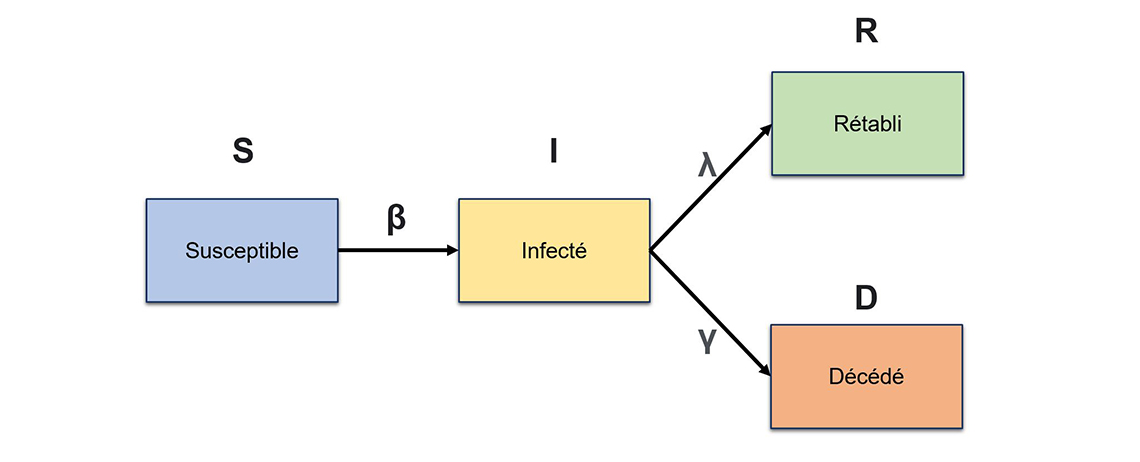


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [1]:
#0 et 1
import numpy as np

def euler_sird(S0, I0, R0, D0, beta, gamma, mu, delta_t, num_steps):
    # Initialisation des listes pour stocker les valeurs de S, I, R et D
    susceptible = [S0]
    infecté = [I0]
    rétabli = [R0]
    décédé = [D0]
    
    # Boucle sur le nombre d'étapes spécifié
    for _ in range(num_steps):
        # Calcul des nouvelles valeurs en utilisant la méthode d'Euler
        nouveau_susceptible = susceptible[-1] - delta_t * beta * susceptible[-1] * infecté[-1]
        nouveau_infecté = infecté[-1] + delta_t * (beta * susceptible[-1] * infecté[-1] - gamma * infecté[-1] - mu * infecté[-1])
        nouveau_rétabli = rétabli[-1] + delta_t * gamma * infecté[-1]
        nouveau_décédé = décédé[-1] + delta_t * mu * infecté[-1]
        
        # Ajout des nouvelles valeurs aux listes
        susceptible.append(nouveau_susceptible)
        infecté.append(nouveau_infecté)
        rétabli.append(nouveau_rétabli)
        décédé.append(nouveau_décédé)
    
    # Conversion des listes en tableaux numpy pour une manipulation plus aisée
    return np.array(susceptible), np.array(infecté), np.array(rétabli), np.array(décédé)


### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [2]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

T = 90 
beta = 0.5
gamma = 0.15
mu = 0.015
delta_t = 0.01
num_steps = int(T/delta_t)
S0 = 0.998
I0 = 0.01
R0 = 0.0
D0 = 0.0
def euler_sird(S0, I0, R0, D0, beta, gamma, mu, delta_t, num_steps):
    S, I, R, D = [S0], [I0], [R0], [D0]
    
    for _ in range(num_steps):
        S_new = S[-1] - delta_t * beta * S[-1] * I[-1]
        I_new = I[-1] + delta_t * (beta * S[-1] * I[-1] - gamma * I[-1] - mu * I[-1])
        R_new = R[-1] + delta_t * gamma * I[-1]
        D_new = D[-1] + delta_t * mu * I[-1]
        
        S.append(S_new)
        I.append(I_new)
        R.append(R_new)
        D.append(D_new)
    
    return np.array(S), np.array(I), np.array(R), np.array(D)

# Apply the Euler method with the given parameters
S_sim, I_sim, R_sim, D_sim = euler_sird(S0, I0, R0, D0, beta, gamma, mu, delta_t, num_steps)

# Create a DataFrame to compare results with the given parameters
simulation_results_df = pd.DataFrame({
    'Jour': range(num_steps + 1),
    'Susceptibles': S_sim,
    'Infectés': I_sim,
    'Rétablis': R_sim,
    'Décès': D_sim
})

# Display the simulation results
print(simulation_results_df.head())


print(simulation_results_df.head())

   Jour  Susceptibles  Infectés  Rétablis     Décès
0     0      0.998000  0.010000  0.000000  0.000000
1     1      0.997950  0.010033  0.000015  0.000001
2     2      0.997900  0.010067  0.000030  0.000003
3     3      0.997850  0.010101  0.000045  0.000005
4     4      0.997799  0.010134  0.000060  0.000006
   Jour  Susceptibles  Infectés  Rétablis     Décès
0     0      0.998000  0.010000  0.000000  0.000000
1     1      0.997950  0.010033  0.000015  0.000001
2     2      0.997900  0.010067  0.000030  0.000003
3     3      0.997850  0.010101  0.000045  0.000005
4     4      0.997799  0.010134  0.000060  0.000006


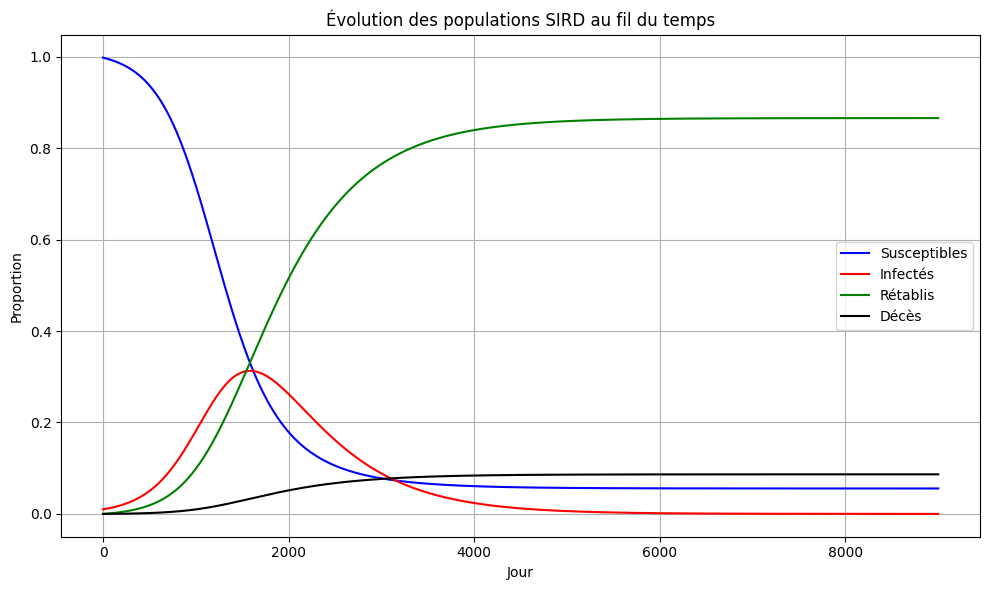

In [3]:
plt.figure(figsize=(10, 6))

# Susceptibles
plt.plot(simulation_results_df['Jour'], simulation_results_df['Susceptibles'], 'b', label='Susceptibles')

# Infectés
plt.plot(simulation_results_df['Jour'], simulation_results_df['Infectés'], 'r', label='Infectés')

# Rétablis
plt.plot(simulation_results_df['Jour'], simulation_results_df['Rétablis'], 'g', label='Rétablis')

# Décès
plt.plot(simulation_results_df['Jour'], simulation_results_df['Décès'], 'k', label='Décès')

# Labels and title
plt.xlabel('Jour')
plt.ylabel('Proportion')
plt.title('Évolution des populations SIRD au fil du temps')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [7]:
df = pd.read_csv('sird_dataset.csv')
df[df<0]=0
df.head()

,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,0.000000,0.000000
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,0.000000
3,3,0.988132,0.008969,0.000000,0.003571
4,4,0.971090,0.007307,0.005403,0.004894


In [13]:
#2
from sklearn.metrics import mean_squared_error
def sird_error(params, S0, I0, R0, D0, delta_t, observed_data):
    beta, gamma, mu = params
    S, I, R, D = euler_sird(S0, I0, R0, D0, beta, gamma, mu, delta_t, len(observed_data) - 1)
    
    error = mean_squared_error(observed_data['Infectés'], I) + \
            mean_squared_error(observed_data['Rétablis'], R) + \
            mean_squared_error(observed_data['Décès'], D)
    
    return error

# Initial parameter guesses
initial_params = [0.3, 0.1, 0.01]

# Example usage of the function
S0 = df['Susceptibles'][0]
I0 = df['Infectés'][1]
R0 = df['Rétablis'][1]
D0 = df['Décès'][0]
delta_t = 0.01  # Time step

# Calculate the error for initial parameters
error = sird_error(initial_params, S0, I0, R0, D0, delta_t, df)
error


0.392068192745451

In [22]:
#3
from itertools import product

# Define the ranges for the parameters
beta_range = np.linspace(0.25, 0.5, 6)
gamma_range = np.linspace(0.09, 0.15, 8)
mu_range = np.linspace(0.005, 0.015, 11)

# Initialize the best parameters and the minimum error
best_params = None
min_error = float('inf')

# Perform grid search
for beta, gamma, mu in product(beta_range, gamma_range, mu_range):
    params = [beta, gamma, mu]
    error = sird_error(params, S0, I0, R0, D0, delta_t, df)
    if error < min_error:
        min_error = error
        best_params = params

# Display the best parameters and the minimum error
best_params, min_error


([0.5, 0.15, 0.005], 0.3920485144649791)

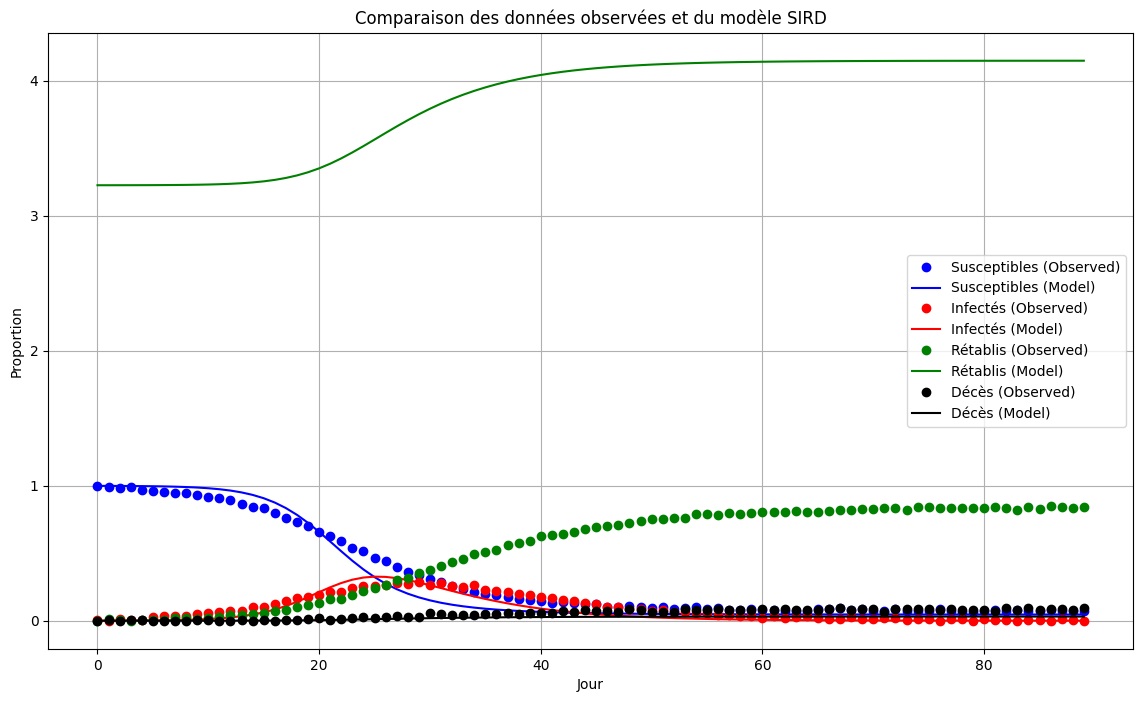

In [24]:
#4
beta_opt, gamma_opt, mu_opt = best_params

# Apply the Euler method with the optimal parameters
S_opt, I_opt, R_opt, D_opt = euler_sird(S0, I0, R0, D0, beta_opt, gamma_opt, mu_opt, delta_t, len(df) * 100 - 1)

# Create a DataFrame for the optimal simulation results
optimal_results_df = pd.DataFrame({
    'Jour': np.arange(0, len(df) * 100) * delta_t,
    'Susceptibles (Opt)': S_opt,
    'Infectés (Opt)': I_opt,
    'Rétablis (Opt)': R_opt,
    'Décès (Opt)': D_opt
})

# Plotting the results including susceptibles
plt.figure(figsize=(14, 8))

# Susceptibles
plt.plot(df['Jour'], df['Susceptibles'], 'bo', label='Susceptibles (Observed)')
plt.plot(optimal_results_df['Jour'][::100], optimal_results_df['Susceptibles (Opt)'][::100], 'b-', label='Susceptibles (Model)')

# Infectés
plt.plot(df['Jour'], df['Infectés'], 'ro', label='Infectés (Observed)')
plt.plot(optimal_results_df['Jour'][::100], optimal_results_df['Infectés (Opt)'][::100], 'r-', label='Infectés (Model)')

# Rétablisdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABW0AAAMWCAYAAACKoqSLAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzde1zT1f8H8NcY97sXVGQI3kVTS807CV7xii7yWmqpWWlBVpbd1Mpvd4M0U8u8pHgJZ1oqagWGqZV5SY3SDBSRvCvghct2fn98fluMDd3G5bPB69ljj21nZ9t7Fxa+OHsfhRBCgIiIiIiIiIiIiIjsgpPcBRARERERERERERHRfxjaEhEREREREREREdkRhrZEREREREREREREdoShLREREREREREREZEdYWhLREREREREREREZEcY2hIRERERERERERHZEYa2RERERERERERERHaEoS0RERERERERERGRHWFoS0RERERERERERGRHGNoSERERkV1atWoVFi5cKHcZNcKCBQvw5Zdfyl0GVZDVq1fjk08+kbsMIiIiKgeGtkREROSwQkNDMXHiRLnLsEpERAQiIiLkLgMAoFAoMGfOHLnLMGvLli144okn0KFDB7lLKVNERATuueceucsotwULFuCNN95A165d5S6l0tnze94WK1asgEKhQGZmptF4165dMXfuXCxatKjM686ZMwcKhaKSKyQiIiJbMbQlIiKyQ6dOncLUqVPRpEkTuLu7w9fXFz169EBCQgJu3bold3lElSozMxOTJk3CmjVr0L17d7nLqdZ+/fVXvP766/jmm2/QvHlzucspU2JiIuLj4+Uuw2E0a9YM33zzDV555RX89ttvVXa/R48eRUxMDEJCQuDu7o6goCD069cPCxYsMJoXGhqKIUOGGI0pFAqjg6+vL3r16oWtW7ea3I8+rNYf3N3d0bBhQwwYMAAff/wx8vLyKvVxEhERVQVnuQsgIiIiY1u3bsVDDz0ENzc3jB8/Hvfccw8KCwuxZ88evPDCCzh+/DiWLl0qd5l24a+//oKTE/8GXd0cPnwYS5YswYgRI+Qupdo7fvw4Nm7caPerbBMTE3Hs2DHExcXJXYrD6NKlCzZu3Ihjx46hY8eOlX5/e/fuRWRkJBo1aoQpU6agQYMGyMrKwv79+5GQkICnn376rrfRr18/jB8/HkIInD59Gp9++imGDh2K7du3Y8CAASbz33jjDTRu3BhFRUX4999/kZqairi4OMyfPx9btmxBu3btKuOhEhERVQmGtkRERHYkIyMDo0ePRkhICH744QcEBgYaLps2bRr+/vtvs6uOqgOdTofCwkK4u7tbfB03N7dKrIjkMnz4cLlLcCi3b9+Gq6urTX/AcLT2ImSd3r17V9l9zZs3D35+fvj111/h7+9vdNmFCxcsuo0WLVrg4YcfNpx/8MEH0bp1ayQkJJgNbQcOHIhOnToZzs+aNQs//PADhgwZgmHDhiE9PR0eHh62PSAiIiKZcWkKERGRHXnvvfeQn5+PZcuWGQW2es2aNUNsbKzhfHFxMd588000bdoUbm5uCA0Nxcsvv4yCggKj6+m/ipqamopOnTrBw8MDbdu2RWpqKgBAo9Ggbdu2cHd3R8eOHXHo0CGj60+cOBHe3t74559/MGDAAHh5eaFhw4Z44403IIQwmvvBBx+ge/fuqFOnDjw8PNCxY0ckJSWZPBaFQoHp06djzZo1aNOmDdzc3JCcnGzVbZTuaVtUVIS5c+eiefPmcHd3R506ddCzZ0/s2rXL6Ho//PADwsPD4eXlBX9/f0RHRyM9Pd1ojr7f499//42JEyfC398ffn5+ePTRR3Hz5k2TWsxZunQpmjZtCg8PD3Tu3BlpaWlm5xUUFGD27Nlo1qwZ3NzcEBwcjJkzZ5q8jrt27ULPnj3h7+8Pb29vtGzZEi+//PJd6ygoKMCzzz6LgIAA+Pj4YNiwYTh79qzZuYcOHcLAgQPh6+sLb29v9OnTB/v37zeao/9q8k8//YQZM2YgICAAXl5eGDFiBC5evGg0V//e27NnDzp37gx3d3c0adIEq1atMrnva9euIS4uDsHBwXBzc0OzZs3w7rvvQqfTGc3T6XSIj49HmzZt4O7ujvr162Pq1Km4evWq0bwDBw5gwIABqFu3Ljw8PNC4cWM89thjd32+AGDRokWG92XDhg0xbdo0XLt2zezc3377Dd27dzfcx+LFi03mLFiwAG3atIGnpydq1aqFTp06ITEx0WhOdnY2HnvsMdSvXx9ubm5o06YNvvjiC6M5qampUCgUWLduHV599VUEBQXB09MTBw8ehEKhwMqVK03ue8eOHVAoFPj222+tui+g8t+bgLRpVseOHeHh4YHatWtj9OjRyMrKMlweERGBrVu34vTp04avw4eGht7xNi19z0+cONHsbVna71Xf1/j3339Hr1694OnpiWbNmhk+r3bv3o0uXbrAw8MDLVu2xHfffWdyG5b8zAHSqujevXvDw8MDKpUKb731lsnPht727dsNn3E+Pj4YNGgQjh07dtfHA9z99SjLqVOn0KZNG5PAFgDq1atn0X2XFhYWhrp16+LUqVMWX6d379547bXXcPr0aaxevdqm+yUiIrILgoiIiOxGUFCQaNKkicXzJ0yYIACImJgY8cknn4jx48cLAGL48OFG80JCQkTLli1FYGCgmDNnjvjoo49EUFCQ8Pb2FqtXrxaNGjUS77zzjnjnnXeEn5+faNasmdBqtUb34+7uLpo3by4eeeQRsXDhQjFkyBABQLz22mtG96VSqcRTTz0lFi5cKObPny86d+4sAIhvv/3WaB4AERYWJgICAsTcuXPFJ598Ig4dOmTVbYSEhIgJEyYYzr/88stCoVCIKVOmiM8++0x8+OGHYsyYMeKdd94xzNm1a5dwdnYWLVq0EO+9956YO3euqFu3rqhVq5bIyMgwzJs9e7YAIO677z6hVqvFokWLxOTJkwUAMXPmzLu+Np9//rkAILp37y4+/vhjERcXJ/z9/UWTJk1Er169DPO0Wq3o37+/8PT0FHFxcWLJkiVi+vTpwtnZWURHRxvmHTt2TLi6uopOnTqJhIQEsXjxYvH888+LBx544K61PPzwwwKAGDt2rFi4cKFQq9WiXbt2AoCYPXu20X14eXmJwMBA8eabb4p33nlHNG7cWLi5uYn9+/cb5i1fvtzw3PTu3VssWLBAPPfcc0KpVIqRI0eavEYtW7YU9evXFy+//LJYuHCh6NChg1AoFOLYsWOGeTdu3BDt2rUTderUES+//LJYvHixGD9+vFAoFCI2NtboNidPniycnZ3FlClTxOLFi8WLL74ovLy8xP333y8KCwuFEEKcP39e1KpVS7Ro0UK8//774rPPPhOvvPKKCAsLu+vzpX/t+/btKxYsWCCmT58ulEql0e0LIUSvXr1Ew4YNRb169cT06dPFxx9/LHr27CkAiGXLlhnmLV261PBzumTJEpGQkCAmTZoknnnmGcOcf//9V6hUKhEcHCzeeOMN8emnn4phw4YJAOKjjz4yzEtJSREAROvWrcW9994r5s+fL95++21x48YN0aRJEzFo0CCTx/Poo4+KWrVqGWq39L6q4r351ltvCYVCIUaNGiUWLVpk+HkMDQ0VV69eFUIIsXPnTnHvvfeKunXrii+//FJ8+eWXYtOmTXe8XUvf8xMmTBAhISEm19e/B+5G/x4IDg4WL7zwgliwYIFo3bq1UCqVYt26daJBgwZizpw5Ij4+XgQFBQk/Pz+Rm5tr9NxZ8jOXk5MjAgICRK1atcScOXPE+++/L5o3b254TCU/u1atWiUUCoXo37+/+Pjjj8W7774rQkNDhZ+fnzh16tQdH6Mlr0dZ+vfvL3x8fMTRo0fv+ryFhISIwYMHG40BENOmTTMau3btmlAqlaJLly5G4/rPoF9//dXs7WdlZRl+5oiIiBwVQ1siIiI7cf36dQHAKAy5k8OHDwsAYvLkyUbjzz//vAAgfvjhB8NYSEiIACD27t1rGNuxY4cAIDw8PMTp06cN40uWLBEAREpKimFMHw4//fTThjGdTicGDx4sXF1dxcWLFw3jN2/eNKqnsLBQ3HPPPaJ3795G4wCEk5OTOH78uMljs/Q2Soe27du3NwkCSrv33ntFvXr1xOXLlw1jR44cEU5OTmL8+PGGMX2g8dhjjxldf8SIEaJOnTp3vI/CwkJRr149ce+994qCggLDuD68Kxnafvnll8LJyUmkpaUZ3cbixYsFAPHTTz8JIYT46KOPBACj59oS+vfJU089ZTQ+duxYkwBr+PDhwtXV1SjYOXfunPDx8TEK4PSBSd++fYVOpzOMP/vss0KpVIpr164ZxvTvvR9//NEwduHCBeHm5iaee+45w9ibb74pvLy8xIkTJ4zqfOmll4RSqRRnzpwRQgiRlpYmAIg1a9YYzUtOTjYa37Rp0x1DnbJcuHBBuLq6iv79+xv94WLhwoUCgPjiiy8MY7169RIAxIcffmgYKygoMLzH9CFpdHS0aNOmzR3vd9KkSSIwMFBcunTJaHz06NHCz8/P8DOhD22bNGli8nMya9Ys4eLiIq5cuWJUj7+/v9H72NL7quz3ZmZmplAqlWLevHlG40ePHhXOzs5G44MHDzYbrppjzXu+IkJbACIxMdEw9ueffxo+30oGr/rP3OXLlxvGLP2Zi4uLEwDEzz//bBi7cOGC8PPzMwpt8/LyhL+/v3j00UeN6szJyRF+fn5i0qRJZT5Ga14Pc3bu3CmUSqVQKpWiW7duYubMmWLHjh1Gf+jQKyu0nTRpkrh48aK4cOGCOHDggIiKihIAxPvvv280926hrRBC+Pn5ifvuu++ONRMREdkztkcgIiKyE7m5uQAAHx8fi+Zv27YNADBjxgyj8eeeew4ATHrftm7dGt26dTOc79KlCwDpq6SNGjUyGf/nn39M7nP69OmG0/r2BoWFhUZf+S3ZP/Dq1au4fv06wsPDcfDgQZPb69WrF1q3bm0ybs1tlOTv74/jx4/j5MmTZi/PycnB4cOHMXHiRNSuXdsw3q5dO/Tr18/wnJb0xBNPGJ0PDw/H5cuXDa+XOQcOHMCFCxfwxBNPwNXV1TA+ceJE+Pn5Gc396quvEBYWhlatWuHSpUuGg74XZUpKiuGxAcDmzZvL/Eq0OfrH9MwzzxiNl97QSavVYufOnRg+fDiaNGliGA8MDMTYsWOxZ88ek8f8+OOPG32FPDw8HFqtFqdPnzaa17p1a4SHhxvOBwQEoGXLlkbvsa+++grh4eGoVauW0fPQt29faLVa/Pjjj4Z5fn5+6Nevn9G8jh07wtvb2+T5+vbbb1FUVGTx8/Xdd9+hsLAQcXFxRj1ip0yZAl9fX5OfK2dnZ0ydOtVw3tXVFVOnTsWFCxfw22+/GWo5e/Ysfv31V7P3KYTAxo0bMXToUAghjB7XgAEDcP36dZP3/oQJE0x6dY4aNQpFRUXQaDSGsZ07d+LatWsYNWqU1fdV2e9NjUYDnU6HkSNHGt1+gwYN0Lx5c8PtW8vS93xF8fb2xujRow3nW7ZsCX9/f4SFhRk+TwHTz1Zrfua2bduGrl27onPnzoZ5AQEBGDdunFEtu3btwrVr1/D444/j9u3bhoO/vz969OhhaIljTnlfj379+mHfvn0YNmwYjhw5gvfeew8DBgxAUFAQtmzZcpdnUbJs2TIEBASgXr166NSpE77//nvMnDnT5P9zlvD29kZeXp7V1yMiIrIXDG2JiIjshK+vLwBY/I/M06dPw8nJCc2aNTMab9CgAfz9/U2Cs5LBLABDeBgcHGx2vHR/UCcnJ6NgAZA2jQGAzMxMw9i3336Lrl27wt3dHbVr10ZAQAA+/fRTXL9+3eQxNG7c2Oxjs+Y2SnrjjTdw7do1tGjRAm3btsULL7yA33//3XC5/jlp2bKlyXXDwsJw6dIl3Lhxw2i89PNWq1YtAKbPT0n6+2nevLnRuIuLi8lzePLkSRw/fhwBAQFGB/1zq9/AZ9SoUejRowcmT56M+vXrY/To0diwYcNdQzL9+6Rp06ZG46Wfg4sXL+LmzZtlPjc6nc6kr6Wlz03pefq5JeedPHkSycnJJs9D3759jZ6HkydP4vr166hXr57J3Pz8fMO8Xr164cEHH8TcuXNRt25dREdHY/ny5Sa9WEsr6z3i6uqKJk2amPxcNWzYEF5eXkZjpX8uXnzxRXh7e6Nz585o3rw5pk2bhp9++skw/+LFi7h27RqWLl1q8pgeffRRo8evZ+5np3379mjVqhXWr19vGFu/fj3q1q1rCFqtua/Kfm+ePHkSQgg0b97c5D7S09Mt3ryqNEvf8xVFpVKZ9L/18/O762erNT9zp0+fNvk8AUwfk/4PVt26dYOHh4fRYdu2bSY9p0tft7yvx/333w+NRoOrV6/il19+waxZs5CXl4eYmBj88ccfd71+dHQ0du3aha1btxr6Ct+8edOmTfby8/Mt/iMoERGRPXKWuwAiIiKS+Pr6omHDhhZvFqNnyWY5AKBUKq0aF6U2GLNEWloahg0bhgceeACLFi1CYGAgXFxcsHz5cpNNlwCY3dXb2tso6YEHHsCpU6ewefNm7Ny5E59//jk++ugjLF68GJMnT7b68QAV+/yYo9Pp0LZtW8yfP9/s5frgx8PDAz/++CNSUlKwdetWJCcnY/369ejduzd27txZZp2VydLnxpJ5Op0O/fr1w8yZM83O1QeFOp0O9erVw5o1a8zOCwgIACD9XCQlJWH//v345ptvsGPHDjz22GP48MMPsX//fnh7e9/5wVWgsLAw/PXXX/j222+RnJyMjRs3YtGiRXj99dcxd+5cQ7j58MMPY8KECWZvo127dkbnzf3sAFKAOm/ePFy6dAk+Pj7YsmULxowZA2dn6dd+a+6rst+bOp0OCoUC27dvNzunKl6jsj4/tVqtxbdRFZ+tltK/vhs3bkTDhg0trkl/3Yp6PVxdXXH//ffj/vvvR4sWLfDoo4/iq6++wuzZs+94PZVKZfhDzaBBg1C3bl1Mnz4dkZGRUKvVFt//2bNncf36dZM/ahIRETkShrZERER2ZMiQIVi6dCn27dtn1MrAnJCQEOh0Opw8eRJhYWGG8fPnz+PatWsICQmp0Np0Oh3++ecfQ3gGACdOnAAAw+7rGzduhLu7O3bs2AE3NzfDvOXLl1t8P+W9jdq1a+PRRx/Fo48+ivz8fDzwwAOYM2cOJk+ebHhO/vrrL5Pr/fnnn6hbt67Jqklb6O/n5MmThhWOAFBUVISMjAy0b9/eMNa0aVMcOXIEffr0uWsA7+TkhD59+qBPnz6YP38+/ve//+GVV15BSkqKIegwV4tOp8OpU6eMVuWVfg4CAgLg6elZ5nPj5ORksnKwIjVt2hT5+fllPo6S87777jv06NGjzOCypK5du6Jr166YN28eEhMTMW7cOKxbt67MEL/ke6TkqujCwkJkZGSY1Hfu3DncuHHD6H1T+ucCALy8vDBq1CiMGjUKhYWFUKvVmDdvHmbNmoWAgAD4+PhAq9Xe9fHfzahRozB37lxs3LgR9evXR25urtFX9625r8p+bzZt2hRCCDRu3Njoc8UcS/84BVj+ngekFd/Xrl0zGS+9oroyWPMzFxISYrbtS+nr6lcXe3p6omvXrlbVY83rYY1OnToBkNrTWGvq1Kn46KOP8Oqrr2LEiBEWvw++/PJLAMCAAQOsvk8iIiJ7wfYIREREdmTmzJnw8vLC5MmTcf78eZPLT506hYSEBADSKiQAiI+PN5qjXxU3ePDgCq9v4cKFhtNCCCxcuBAuLi7o06cPAGkVl0KhMFqllpmZia+//tri+yjPbVy+fNnovLe3N5o1a2b4SnxgYCDuvfderFy50iioOXbsGHbu3Gl4TsurU6dOCAgIwOLFi1FYWGgYX7FihUlANHLkSGRnZ+Ozzz4zuZ1bt24Z2jVcuXLF5PJ7770XAO74lf+BAwcCAD7++GOj8dLvG6VSif79+2Pz5s1G7S7Onz+PxMRE9OzZ09DCozKMHDkS+/btw44dO0wuu3btGoqLiw3ztFot3nzzTZN5xcXFhuf36tWrJisaLXm++vbtC1dXV3z88cdG11+2bBmuX79u8nNVXFyMJUuWGM4XFhZiyZIlCAgIQMeOHQGYvi9dXV3RunVrCCFQVFQEpVKJBx98EBs3bjS70v5OX2kvLSwsDG3btsX69euxfv16BAYG4oEHHjBcbs19VfZ7U61WQ6lUYu7cuSavlRDC6Hnz8vK6a3sUPUvf84AUVF6/ft2ojUpOTg42bdpk0X2VhzU/c4MGDcL+/fvxyy+/GOZdvHjRZMX5gAED4Ovri3nz5hl99pS87bJY83qYk5KSYnYVsb7HsC3tKZydnfHcc88hPT0dmzdvtug6P/zwA9588000btzYpOcvERGRI+FKWyIiIjvStGlTJCYmYtSoUQgLC8P48eNxzz33oLCwEHv37sVXX32FiRMnApD6V06YMAFLly7FtWvX0KtXL/zyyy9YuXIlhg8fjsjIyAqtzd3dHcnJyZgwYQK6dOmC7du3Y+vWrXj55ZcNX0kfPHgw5s+fj6ioKIwdOxYXLlzAJ598gmbNmhmFIndSntto3bo1IiIi0LFjR9SuXRsHDhxAUlKS0QZq77//PgYOHIhu3bph0qRJuHXrFhYsWAA/Pz/MmTPH5uenJBcXF7z11luYOnUqevfujVGjRiEjIwPLly836Wn7yCOPYMOGDXjiiSeQkpKCHj16QKvV4s8//8SGDRuwY8cOdOrUCW+88QZ+/PFHDB48GCEhIbhw4QIWLVoElUqFnj17llnLvffeizFjxmDRokW4fv06unfvju+//x5///23ydy33noLu3btQs+ePfHUU0/B2dkZS5YsQUFBAd57770KeW7K8sILL2DLli0YMmQIJk6ciI4dO+LGjRs4evQokpKSkJmZibp166JXr16YOnUq3n77bRw+fBj9+/eHi4sLTp48ia+++goJCQmIiYnBypUrsWjRIowYMQJNmzZFXl4ePvvsM/j6+t4xnA8ICMCsWbMwd+5cREVFYdiwYfjrr7+waNEi3H///Xj44YeN5jds2BDvvvsuMjMz0aJFC6xfvx6HDx/G0qVL4eLiAgDo378/GjRogB49eqB+/fpIT0/HwoULMXjwYEPPzXfeeQcpKSno0qULpkyZgtatW+PKlSs4ePAgvvvuO7PBaFlGjRqF119/He7u7pg0aZJJP1BL76uy35tNmzbFW2+9hVmzZiEzMxPDhw+Hj48PMjIysGnTJjz++ON4/vnnAQAdO3bE+vXrMWPGDNx///3w9vbG0KFDzd6uNe/50aNH48UXX8SIESPwzDPP4ObNm/j000/RokWLu258WBEs/ZmbOXMmvvzyS0RFRSE2NhZeXl5YunQpQkJCjD4XfX198emnn+KRRx7BfffdhzFjxiAgIACZmZnYunUrHnjgAaM/vpVkzethztNPP42bN29ixIgRaNWqleH/W+vXr0doaKihZ7K1Jk6ciNdffx3vvvsuhg8fbnTZ9u3b8eeff6K4uBjnz5/HDz/8gF27diEkJARbtmyBu7u7TfdJRERkFwQRERHZnRMnTogpU6aI0NBQ4erqKnx8fESPHj3EggULxO3btw3zioqKxNy5c0Xjxo2Fi4uLCA4OFrNmzTKaI4QQISEhYvDgwSb3A0BMmzbNaCwjI0MAEO+//75hbMKECcLLy0ucOnVK9O/fX3h6eor69euL2bNnC61Wa3T9ZcuWiebNmws3NzfRqlUrsXz5cjF79mxR+tcOc/dt7W2EhISICRMmGM6/9dZbonPnzsLf3194eHiIVq1aiXnz5onCwkKj63333XeiR48ewsPDQ/j6+oqhQ4eKP/74w2iO/v4uXrxoNL58+XIBQGRkZJitvaRFixaJxo0bCzc3N9GpUyfx448/il69eolevXoZzSssLBTvvvuuaNOmjXBzcxO1atUSHTt2FHPnzhXXr18XQgjx/fffi+joaNGwYUPh6uoqGjZsKMaMGSNOnDhx1zpu3bolnnnmGVGnTh3h5eUlhg4dKrKysgQAMXv2bKO5Bw8eFAMGDBDe3t7C09NTREZGir1795p9Dn799Vej8ZSUFAFApKSkGMbKeu+Zex7y8vLErFmzRLNmzYSrq6uoW7eu6N69u/jggw9MXsOlS5eKjh07Cg8PD+Hj4yPatm0rZs6cKc6dO2d4HGPGjBGNGjUSbm5uol69emLIkCHiwIEDd32+hBBi4cKFolWrVsLFxUXUr19fPPnkk+Lq1asmj6FNmzbiwIEDolu3bsLd3V2EhISIhQsXGs1bsmSJeOCBB0SdOnWEm5ubaNq0qXjhhRcMr63e+fPnxbRp00RwcLBwcXERDRo0EH369BFLly41eY6/+uqrMms/efKkACAAiD179pidY8l9CVH5700hhNi4caPo2bOn8PLyEl5eXqJVq1Zi2rRp4q+//jLMyc/PF2PHjhX+/v4CgAgJCbnjbVrznt+5c6e45557hKurq2jZsqVYvXq12c8bc/TvgdKs+cy15GdOCCF+//130atXL+Hu7i6CgoLEm2++KZYtW2b28yglJUUMGDBA+Pn5CXd3d9G0aVMxceJEo/d/WY/RktfDnO3bt4vHHntMtGrVSnh7ewtXV1fRrFkz8fTTT4vz58/f9fm50/8T5syZY/TZov8M0h9cXV1FgwYNRL9+/URCQoLIzc29Y61ERESOQCFEJXbCJyIiomph4sSJSEpKQn5+vtylEBERERERVXvsaUtERERERERERERkRxjaEhEREREREREREdkRhrZEREREREREREREdoQ9bYmIiIiIiIiIiIjsCFfaEhEREREREREREdkRhrZEREREREREREREdsRZ7gKqmk6nw7lz5+Dj4wOFQiF3OURERERERERERFRDCCGQl5eHhg0bwsmp7PW0NS60PXfuHIKDg+Uug4iIiIiIiIiIiGqorKwsqFSqMi+vcaGtj48PAOmJ8fX1lbmayldUVISdO3eif//+cHFxkbscInIA/NwgImvwM4OIrMHPDCKyFj83qLrJzc1FcHCwIaMsS40LbfUtEXx9fWtMaOvp6QlfX19+uBGRRfi5QUTW4GcGEVmDnxlEZC1+blB1dbe2rdyIjIiIiIiIiIiIiMiOMLQlIiIiIiIiIiIisiMMbYmIiIiIiIiIiIjsCENbIiIiIiIiIiIiIjvC0JaIiIiIiIiIiIjIjjC0JSIiIiIiIiIiIrIjDG2JiIiIiIiIiIiI7AhDWyIiIiIiIiIiIiI7wtCWiIiIiIiIiIiIyI4wtCUiIiIiIiIiIiKyIwxtiYiIiIiIiIiIiOwIQ1siIiIiIiIiIiIiO8LQloiIiIiIiIiIiMiOMLQlIiIiIiIiIiIisiMMbYmIiIiIiIiIiIjsCENbIiIiIiIiIiIiIjvC0JaIiIiIiIiIiIjIjjC0JSIiIiIiIiIiIrIjDG2JiIiIiIiIiIiI7AhDWyIiIiIiIiIiIiI7wtCWiIiIiIiIiIiIyI4wtCUiIiIiIiIiIiKyIwxtiYiIiIiIiIiIiOwIQ1siIiIiIiIiIiIiOyJraPvjjz9i6NChaNiwIRQKBb7++uu7Xic1NRUdOnSAm5sbmjVrhhUrVlR6nY5KqwV271bgxx+DsHu3Alqt3BURERERERERERHR3cga2t64cQPt27fHJ598YtH8jIwMDB48GJGRkTh8+DDi4uIwefJk7Nixo5IrdTwaDRAaCvTr54z58zuhXz9nhIZK40RERERERERERGS/nOW884EDB2LgwIEWz1+8eDEaN26MDz/8EAAQFhaGPXv24KOPPsKAAQMqq0yHo9EAMTGAEMbj2dnSeFISoFbLUxsRERERERERERHdmayhrbX27duHvn37Go0NGDAAcXFxZV6noKAABQUFhvO5ubkAgKKiIhQVFVVKnXLSaoFnnnH+/8BWYXSZNCbw1FNA06bFcHEBlErjg5OTdOzsbHxQKgGFwswdElG1o/9srI6fkURU8fiZQUTW4GcGEVmLnxtU3Vj6Xnao0Pbff/9F/fr1jcbq16+P3Nxc3Lp1Cx4eHibXefvttzF37lyT8Z07d8LT07PSapXL0aN1kJ3d8w4zFDh/Hrj3Xherb1up1EGpFHByElAqdXB2/u+0Uin+/6CDs7N0mXSsg4uLzjBfP6Yf1891cdHC1VVnOHZ11cLVVQsXF/1p48tcXLRwc9PC3V2aw0CZqOLt2rVL7hKIyIHwM4OIrMHPDCKyFj83qLq4efOmRfMcKrS1xaxZszBjxgzD+dzcXAQHB6N///7w9fWVsbLKkZtrWXrp6SmgVEorc0sehCj7+lqtk11uZqZUCnh7A15e0sHbG/D2FkbnvbyE4bS/P+DnJ1CrlulpM7k/UY1TVFSEXbt2oV+/fnBxsf4PPERUs/Azg4iswc8MIrIWPzeoutF3AbgbhwptGzRogPPnzxuNnT9/Hr6+vmZX2QKAm5sb3NzcTMZdXFyq5Q97cLBl87ZuVSAiwnR840YgNlbqf6vXsCHw1ltA//5AcbHpoajov9OFhdL5oiLptLlD6csKCqTD7dvArVvSsSWnCwul+rRaBa5fB65fL/lIbFt66+Ymhbf6EFd/XKcOUL+++QODXqququvnJBFVDn5mEJE1+JlBRNbi5wZVF5a+jx0qtO3WrRu2bdtmNLZr1y5069ZNporsT3g4oFJJoWvpjcgAqS+tSiXNK02jAR56yPR6OTnApEmVs4GZVgukpUn3ERgo1aVUWnbd4mLgxg3pkJ8vHe52Oi9PCnevXQOuXjU+1umk8Pj8eelgKV9f82FugwZASAgQGiodu7tb//wQEREREREREVHNI2tom5+fj7///ttwPiMjA4cPH0bt2rXRqFEjzJo1C9nZ2Vi1ahUA4IknnsDChQsxc+ZMPPbYY/jhhx+wYcMGbN26Va6HYHeUSiAhAYiJkQLakgGsvu9rfLxpMKrVSitszQW9QkjXjYsDoqMtD1XvRqOR7vPs2f/GVCqpfkvCYWdnwM9POpSXEFKge+2aaaB79Spw+TLw77//Bbr6Q0EBkJsrHU6evPN9BAZKAW7jxsbHoaFAo0aAq2v5HwcRERERERERETk+WUPbAwcOIDIy0nBe33t2woQJWLFiBXJycnDmzBnD5Y0bN8bWrVvx7LPPIiEhASqVCp9//jkGDBhQ5bXbM7VaWhVrLhCNjzcfiKalGc8tTQggK0uaZ66tgrU0GilYLh0SZ2dL45WxqvdOFAppxayvrxSgWkIIKaw9f958oJuTA5w+DWRkSKt8c3Kkw7595u8/KEgKcps3B9q2lQ7t2gEBARX7WImIiIiIiIiIyL7JGtpGRERAmFva+f9WrFhh9jqHDh2qxKqqB7VaWhWbklKM7dsPY+DAexEZ6VzmKtmcHMtu19J5dyLHqt7KoFD8t9K3RYuy5wkBXLkihbeZmdJBf1p/fOuWFJqfPSsF4yXVry+FtyWD3Nat2W6BiIiIiIiIiKi6cqietmQdpRLo1Uvgxo1s9OrV/o4BaGCgZbdZ1jxretNW9apeuSkU0kZmdeoAnTqZXi4EcPGiFOBmZAB//gn8/jtw9Chw6pS0anfXLumg5+QkrcjVh7nt2wPduwN161bd4yIiIiIiIiIiosrB0JYAlH8DM2t601blql5HoFAA9epJhy5djC+7cQM4fvy/EFd/fPky8Ndf0uGrr/6b36YN0KuXFHY/8IC0SpeIiIiIiIiIiBwLQ1sCYPsGZrb0pi3vqt6axMsL6NxZOugJIfXQ1Qe4R48CBw4Af/whBbzHjwOLFklzW7WSAtxevaQDn1MiIiIiIiIiIvvH0JYMrN3AzNbetOVZ1UvS8xMYKB1K7sF38aLUUiI1Fdi9Wwp1//xTOixeLM1p0eK/ALdXL+l5JiIiIiIiIiIi+8LQlozoNzCzpD+trb1pbV3VS3cWECC9fvpw/coV4xD38GHgxAnp8Nln0pzWrYHRo4FRo+68mRoREREREREREVUdJ7kLIPujVEoh65gx0nFZ4Wl5etPqV/UGBRmPq1TmWyqQ9WrXlgL4jz4CDh6UQtxvvgGef17aEM3JSWqp8PrrQMuWQMeOwPvvA6dPy105EREREREREVHNxpW2ZLPy9qa1ZlUvlZ+/PzBkiHQAgGvXgM2bgXXrgF27pGD34EFg5kyge3dpBe5DDwENGshZNRERERERERFRzcOVtmQzfW9afUuD0hQKIDj4zr1pLV3VW5JWK33lf+1a6Virtb52kkLcCROA7duljc0WL5ZeA4UC2LsXeOYZaSV0797A0qXA5ctyV0xEREREREREVDMwtCWb6XvTAqbBbWX1ptVogNBQIDISGDtWOg4NlcbJdnXrAlOnAikpUp/ihASgWzdAp5PGpk6VVtwOGgR8+SVw+7bcFRMRERERERERVV8MbalcqrI3rUYjbV5WevOz7GxpnMFtxWjYUFplu3cvkJEBvPsucN99QHGxtCp3/HigcWPggw+AvDy5qyUiIiIiIiIiqn4Y2lK5qdVAZqa0IjMxUTrOyKjYwFarBWJjASFML9OPxcWxVUJFCw2VetwePAj8+ScwZ47U8uLff4EXXgBCQqSNzC5dkrtSIiIiIiIiIqLqg6EtVQhbetNaIy3NdIVtSUIAWVnSPKocLVsCs2cDf/8NfPGFdP7qVeDNN6Xw9tln7/waERERERERERGRZRjakkPIyanYeWQ7V1fg0UeB48eBr74COnQAbt6U+hc3aQJMngycPCl3lUREREREREREjouhLTmEwMDyz9NqgdRUYO1a6ZitFMpHqZR6CR84AOzYAfTqBRQVAcuWAa1aAaNGAYcPy10lEREREREREZHjYWhLDiE8XNrcTKEwf7lCIfVaDQ83f7lGI/VnjYwExo6VjkNDuXlZRVAogP79pSD8p5+AIUMAnQ7YsEHawGzQILatICIiIiIiIiKyBkNbcghKJZCQIJ0uHdzqz8fHm++lq9FIK0JL91vNzpbGGdxWnO7dgW++AY4ckfobOzkB27cDDzwA9OsHnDold4VERERERERERPaPoS05DLUaSEoCgoKMx1UqaVytNr2OVgvExkoblZWmH4uLY6uEitauHZCYCJw4AUydKvXB/e47oG1b4KOP+HwTEREREREREd0JQ1tyKGo1kJkJpKRIoWBKCpCRYT6wBaSv5ZdeYVuSEEBWFr++X1maNgUWLwb++ENqSXHrFjBjBtCjB3DsmNzVERERERERERHZJ4a25HCUSiAiQvr6fUSE+ZYIejk5lt1mWfO4eVnFaNoU+P57YOlSwNcX+PlnoEMHYO5coLBQ7uqIiIiIiIiIiOwLQ1uq1gIDbZ/HzcsqlkIBTJkirbodOhQoKgLmzAE6dgR+/VXu6oiIiIiIiIiI7AdDW6rWwsOlnrelNy/TUyiA4GBpXkncvKzyBAUBmzcD69YBAQFSm4SuXYHnnwdu3pS7OiIiIiIiIiIi+TG0pWpNqQQSEqTTpYNb/fn4eOMWCxWxeZktbRVqUisGhQIYNUpadTtuHKDTAR9+KG1glpoqd3VERERERERERPJiaEvVnloNJCVJKzxLUqmk8dKbmJV38zJb2irU1FYMdesCq1cD334rvR6nTkmPfepU4Pp1uasjIiIiIiIiIpIHQ1uqEdRqIDMTSEkBEhOl44wM08AWKN/mZba0VWArBmDwYOD4ceDJJ6XzS5cCrVsD33wjb11ERERERERERHJgaEs1hlIJREQAY8ZIxyVbIpRk6+ZltrRVqIhWDNWFry+waJHUHqF5c+DcOWDYMOCll6T2CURERERERERENQVDW6JSbN28zJa2CuVtxVAd9eoFHDkCPPecdP7dd4FHHgEKCuSti4iIiIiIiIioqjC0JSrFls3LANvaKpSnFUN15uEBfPABsGIF4OwstbSIigKuXZO7MiIiIiIiIiKiysfQlsgMazcvA2xrq2BrK4aaYsIEYNs2wMdHapvQowdw5ozcVRERERERERERVS6GtkRlsGbzMsC2tgq2tmKoSfr1k9pDNGwI/PEH0LUrcPiw3FUREREREREREVUehrZEd2Dp5mX6uda2VbC1FUNN0749sH8/cM89UquI8HBgxw65qyIiIiIiIiIiqhwMbYkqkC1tFWy5Tk0UHCytuI2MBPLzgcGDgeXL5a6KiIiIiIiIiKjiOctdAFF1o1YD0dFSwJiTI/WjDQ+/82pZW65TE/n7A8nJwKRJwOrVwGOPAadPA7Nnl91igoiIiIiIiIjI0TC0JaoE+rYKlX2dmsjVFVi1CmjUCPjf/4C5c6XNyZYsAVxc5K6OiIiIiIiIiKj82B6ByIFptUBqKrB2rXSs1cpdUdVQKIB586Sg1slJapMwZAiQmyt3ZURERERERERE5cfQlshBaTRAaKjU43XsWOk4NFQarykefxzYsgXw9AR27gQeeAA4d07uqoiIiIiIiIhqJiGE0UEndIaDVqc1OhTrio0OQgi5y7crbI9A5IA0GiAmBij9eZadLY3XpA3MBg8Gdu+Wjo8cAbp2BbZvB9q0kbsyIiIiIiKqavqQSCv+PxgS2v/Cov8f019eMkgqa6zkeMmx0oeS17XkUDrM0gkdBESZc0peph83N6YfLz1HCGF0+k6X6f8zOl/iOmbnmzkuPd/WY51Oh6tXr+Lti29Lr3GJy/SvuTVjpS8v6zZLjutPm7sda+dZcpk150uOmZtXEXPvdv2Kcm7GOQT6BFbobToyhrZEDkarBWJjTQNbQBpTKIC4OGljs5qykVmnTsD+/cDAgcBffwF9+gA//wyEhMhdGRERERFR1RFCoFhXjCJdEQq1hSjSFpmcLtYVW336TocibRlzRLFhJZ1W/LeirvRYydV2JYPWkvNKjpU81l+/ZEhb0SES2ZGbchdAVLUY2hI5mLQ04OzZsi8XAsjKkubVpI3NGjcG9u4FeveWVtwOHgz89BPg5yd3ZURERERUnWh1WhRoC3C7+LbhUFAsnS/QFqCguOCux4XaQqPThoNOOjYZL+NQpCsyCmaLdcVyPz0OwUnhBCeFE5QKpXTspDQ6b25M6aSEAgoonZRG8yw5KBQKs9dRKBRlXwcK03n477S5y/Vj5s6bu8zS06Vv505jlXGs1Wpx8LeD6NixI1ycXUzmALB6rPTlACyaa83pkrepP323y0pfbu58eefcbV5Zc229vjWX+bnzH/AlMbQlcjA5ORU7rzqpXRv49lugc2fg+HFg5Ehg61bAmZ90RERERNWSEAKF2kLcLLppONwoumF0/mbRTdwuvo1bRbdwq/iW6bGZsZKBbOlgtkhXJPfDtopSoYSr0hUuShe4OLnA2cnZ5LSzkzNcnFyMTpe+zNnJ+Y6HknOUTsr/TiuUdx0reb70aUvH9MHq3U7rg0ZyHEVFRXA95YpBLQfBxcVF7nKIqgyjDCIHE2hhexdL51U3KhXwzTfSpmQ7dwJPPw0sWiS1jSAiIiIieeiEDjcKb+DKjSvIvp2NgzkHUSAKkF+Yj/zCfNwovPHf6SLzpw2hbKFxKKsVWtkel5PCCR7OHnB3doebsxvclG5lHrsqXf8bK3W5q9LVqoOLk4tREGvutKvSFc5OznBScP9xIiJHxNCWyMGEh0vBZHa2+b62CoV0eXh41ddmLzp2BBITgREjgMWLgebNgRkz5K6KiIiIyPFodVrkFuTiesF1XL993XB87fY1XC+4jtyCXOQV5EnHhXnIK8wzjJU8nV+Yb9xr9M+Kr1WpUMLL1QteLl7wdPGEp4snPFw8pGNnD3i4eEjHJU+Xcezu7H7Hg5uzG9yd3eHsxH9SExFR5eD/YYgcjFIJJCQAMTFSQFsyuNWvJo2Pv/MmZFqt1PM2J0dakRseXv02LYuOBj74AHjuOeD554GmTaUxIiIioppECIGbRTdx9fZVXL11FVduXTGcvnr7/8///+nrBf8fxpYIZ/MK8yq0HieFE9wV7qjlVQvert7wdvWGl6vXf6ddyjhdIoz1cv0vlPV08TSMuyj5tWkiIqo+GNoSOSC1GkhKAmJjjTclU6mkwFatLvu6Go356yUk3Pl6jujZZ4GTJ6XVtmPHAj/+KK3CJSIiInJEWp0WV25dwaWbl3Dp5iVcvnX5v9M3L+PSrf9OlwxmC7WF5b5vd2d3+Ln5wd/dH37ufvBz84Ofux98XX3h6+YLHzcf6djVBz5uPvBx9TGMlzztLJyxfft2DBrE3pRERER3wtCWyEGp1dLKUWtWzGo00grd0m0VsrOl8aSk6hXcKhTAggXAP/9I/W2HDgV+/hkIDpa7MiIiIiKpz+vlm5dx4cYFnL9xXjrOP284feHGBUMoe+nmJVy7fc24xYAVnJ2cUcu9Fmp51EJtj9r/nXavjVoetVDLvZZJIOvv7m847ap0rZDHXFTkWJt4ERERyYWhLZEDUyqBiAjL5mq10gpbc31whZACzrg4KQiuTq0SnJ2BDRuAHj2A48eBIUOAPXsAHx+5KyMiIqLqSAiB3IJcnMs7h5z8HOk4Lwc5+Tkm4ezFmxehEzqr78Pf3R91PesaDnU86hidr+1R2ziY9agNLxcvKLgzKxERkcNgaEtUQ6SlGbdEKE0IICtLmmdpEOwo/PyArVuBLl2A338HRo8GNm+WAl0iIiIiS90ovIGs3CxDEHsu75xROKs/fbPoplW3W9ujNup71Uc9r3qo710f9Tz//9irHgI8A1DHs45RIMvNr4iIiKo//t+eqIbIyanYeY4mJATYskUKpLdtA2bMAD7+WO6qiIiIyF4UaguRnZuNrNwsnLl+BlnXs5CV+/+H69LY1dtXLb49Pzc/NPRpiECfQDT0aYgGXg1Q37u+cTj7/6EsN9AiIiKi0hjaEtUQgYHlm6fVWtc/1x517gx8+aXUv3fBAqB5c+Dpp+WuioiIiKrCraJbyLyWiYxrGfjn6j/IuJqB09dPSwFtbhbO55+3qF+sj6sPgnyD0NCnoRTKegeanA70CYSni2cVPCoiIiKqrhjaEtUQ4eGASiVtOmaur61CIV0eHm56mUYj9cMt2V5BpQISEhxv47IHHwTeeQd46SWph2+TJsDgwXJXRUREROWl1WmRnZeNjKv/H8peyzAKaHPy7/51IjelG4L9ghHsG2w4buTXyOi8n7tfFTwaIiIiqukY2hLVEEqlFLLGxEgBbcngVr8nRXy86epZjUa6TumgNztbGk9KcrzgduZM4ORJYNkyqb/tnj1A+/ZyV0VERER3oxM6ZOdm48TlE/8drkjHp6+dRpGu6I7X93H1QeNajdGkVhM09m+MUP/Q/4JZv2AEeAZwsy4iIiKyCwxtiWoQtVoKWc2tmo2PNw1ftVpprrmVuUJIYW9cHBAd7VitEhQK4NNPgYwM4IcfgCFDgJ9/Bho2lLsyIiIiAoDLNy+bDWZPXj6JW8W3yryei5MLQvxD0Ni/MRr7/384W+u/07U9ajOUJSIiIofA0JaohlGrpZDVkv60aWnG4W5pQgBZWdK8iIhKK7lSuLhIAXb37sCffwJDh0qPw5Pt54iIiKqEEALnb5zH8QvHcezCMRy/eBzHLx7Hn5f+xJVbV8q8nrOTM5rWaooWdVoYDs1rN0fT2k0R5BMEpZMD/SWZiIiIqAwMbYlqIKXSspA15+6t36yaZ29q1QK2bgW6dgUOHgReeQX46CO5qyIiIqp+Lt64KIWypQLaO4Wzwb7BRsGs/hDqHwpnJ/4zhoiIiKo3/rZDRGUKDKzYefaoSRNg1Spg4ECp5+/IkUC3bnJXRURE5JgKtYU4fuE4Dv17CIf/PYxjF47h2IVjuHjzotn5CijQtHZT3FPvHrQJaIM2AW3QOqA1mtdpDk8Xfv2FiIiIai6GtkRUpvBwqd9tdrb5vrYKhXR5eHjV11aRoqKACROAlSuBxx4DDh0C3N3lroqIiMi+5Rfm48i/R3Do30M4lHMIh/49hGMXjpW5GVhj/8ZoU68N7gm4B23qSQFtq7qt4OHiUcWVExEREdk/hrZEVCalUlp9GhMjBbQlg1v9Hh7x8Y61CVlZ5s8HduyQ+tu++SYwb57cFREREdmPSzcvGYJZfUh74vIJCJj+Vdff3R/3NbgP9zW4D+3qt0Obem0QVjcMXq5eMlRORERE5JgY2hLRHanV0oZdsbHGm5KpVFJgq1bLVlqFql0bWLRIejzvvgs8+CDQoYPcVREREVW9Qm0hDv97GPvP7jccMq5lmJ0b6B2IDoEdpJA2UApqQ/1DodD/dZeIiIiIbMLQlojuSq0GoqOBtDRp07HAQKklgiUrbLVa264nhxEjpJ62GzZIbRJ+/RVwcZG7KiIiosojhMDZ3LPYd3afIaA9mHMQBdoCk7lNazXFfYH3oUODDoaAtr53fRmqJiIiIqr+GNoSkUWUSiAiwrrraDTmV+gmJNjvCt0FC4DvvweOHJFW3L76qtwVERERVZybRTfx27nfpIA2Wwppz+WdM5lXx6MOuqq6oktQF3RVdcX9QffD392/6gsmIiIiqqEY2hJRpdBopF64pTcwy86WxpOS7DO4rVcP+PhjYNw44I03pNW3bdrIXRUREZFt8gvzsTdrL3Zn7kbq6VT8kv0LinXFRnOUCiXaN2iPrkFd0S24G7qquqJpraZscUBEREQkI4a2RFThtFpphW3pwBaQxhQKIC5Oarlgj60SxowB1q4Fvv1WapOwd6991klERFRafmE+fjrzE1IzU7H79G78eu5Xk5A20DtQCmeDuqKrqis6NuwITxdPmSomIiIiInMY2hJRhUtLM26JUJoQQFaWNM/algtVQaEAFi8GWrcGfvlF2nDtuefkroqIiMhUXkEefsoqEdJm/wqt0BrNCfELQURoBCJCI9ArpBc3CiMiIiJyAAxtiajC5eRU7Dw5BAUBH34ITJki9bUdNgxo3lzuqoiIqKYr1hVj/9n9SP47Gd/98x0OnDtgEtKG+odKIW1IBHqFSiEtERERETkWhrZEVOECAyt2nlwmTQLWrZM2Jps8GUhJAZyc5K6KiIhqmuzcbCT/nYzkU8nYdWoXrhdcN7q8Sa0m6BXSy7CSNsQ/RKZKiYiIiKiiMLQlogoXHg6oVNKmY+b62ioU0uXh4VVfmzUUCuCzz4B77gF+/BFYsgR48km5qyIiouquUFuIn878hOS/k7H97+04euGo0eW1PWpjQNMBGNB0ACIbR6KRXyOZKiUiIiKiysLQlogqnFIJJCQAMTFS8FkyuNW30IuPd4zNvRo3Bt55B3jmGWDmTGDQICCEC5iIiKiCnb52Gtv/3o7kv5Pxfcb3yC/MN1ymgAKdgzpjYLOBiGoWhU4NO0Hp5AD/EyUiIiIimzG0JaJKoVYDSUlAbKzxpmQqlRTYqtWylWa1adOA9euBn34CHn8cSE7+L3wmIiKyhRACh/49BE26Bpv+3IQ/Lv5hdHk9r3qIahaFqKZR6N+0P+p41pGpUiIiIiKSA0NbIqo0ajUQHQ2kpUmbjgUGSi0RHGGFbUlOTsCyZUD79sDOncDKlcDEiXJXRUREjkYndNh/dj82/rERmj81yLyWabhMqVCiW3A3RDWNwsDmA3Fvg3vhpGAjdSIiIqKaiqEtEVUqpRKIiJC7ivJr2RKYOxd46SXg2WeBAQPsfyM1IiKSX7GuGLszdxtW1Obk5xgu83D2wMDmA6Fupcag5oNQy6OWjJUSERERkT1haEtEZKHnngO++gr47TdpQ7JNm9gmgYiITN0uvo3v/vkOmnQNNv+1GVduXTFc5uvmi6EthkIdpkZUsyh4unjKWCkRERER2SuGtkREFnJ2Br74AujYEdi8GdiwARg1Su6qiIjIHhRqC7H95HasO74OW09sRV5hnuGyup51MbzlcKjD1OjTpA9cla4yVkpEREREjoChLRGRFdq1A155RWqV8PTTQO/eQECA3FUREZEchBD49dyvWHVkFdYdW4fLty4bLgvyCYI6TA11mBo9G/WEsxN/7SYiIiIiy/G3RyIiK738MrBxI3DsmNQyYdUquSsiIqKqdPraaaz+fTVW/b4KJy6fMIw38G6AcW3H4aHWD+H+oPu5kRgRERER2YyhLRGRlVxdgWXLgC5dgNWrgZkzgXvukbsqIiKqTLkFuUj6IwmrjqzC7tO7DeMezh5Qh6nxSLtH0KdJH66oJSIiIqIKwd8qiYhs0LkzEBMDJCUBs2dLK2+JiKh6KdYVY+epnfjy9y/x9Z9f43bxbQCAAgpENo7E+HbjoQ5Tw8fNR+ZKiYiIiKi6YWhLRGSjOXOksFajAX77TdqgjIiIHN+Jyyew5MASrDm6BudvnDeMh9UNw/j24zGu7TgE+wXLWCERERERVXcMbYmIbNSmDTB2LLBmDfD668DWrXJXREREtirWFePbE99i0a+LsOufXYbxup51MfaesRjffjw6BHaAQqGQsUoiIiIiqikY2hKR3dFqgbQ0ICcHCAwEwsMBpVLuqsybPRtYtw7Ytg3Ytw/o1k3uioiIyBr/5v+Lzw9+jiW/LcHZ3LMApPYHg1sMxuMdHkdUsyi4KF1krpKIiIiIahqGtkRkVzQaIDYWOHv2vzGVCkhIANRq+eoqS/PmwMSJ0sZkr70GfPed3BUREdHdCCGw58weLDqwCBv/2IgiXREAaVXtpPsmYWrHqWhcq7HMVRIRERFRTcbQlojshkYjbe4lhPF4dvZ/m37ZY3D72mvAqlXA998DKSlAZKTcFRERkTl5BXlY/ftqLDqwCMcuHDOMd1N1w1P3P4WY1jFwd3aXsUIiIiIiIglDWyKyC1qttMK2dGALSGMKBRAXB0RH21+rhJAQYMoUYNEiKcBNS5PqJSIi+3D8wnEs+nURVv2+CvmF+QAATxdPjGs7Dk92ehL3Bd4nc4VERERERMYY2hKRXUhLM26JUJoQQFaWNC8iosrKstgrrwBffAH89BOwYwcQFSV3RURENZsQAqmZqXjnp3ew89ROw3iLOi3wVKenMOHeCfB395evQCIiIiKiO2BoS0R2ISenYudVtYYNgaeeAubPl1bbDhjA1bZERHLQCR22/LUF7+x5Bz9n/wwAUCqUiG4Vjac6PYXejXtDwQ9oIiIiIrJzDG2JyC4EBlbsPDm8+CKwZAlw4ACwZYvUyoGIiKpGkbYIiUcT8e5P7yL9UjoAwN3ZHY/d+xie7/48NxYjIiIiIofC0JaI7EJ4OKBSSZuOmetrq1BIl4eHV31tlqpXT+rL+7//Satthw4FnJzkroqIqHq7UXgDyw4twwd7P0BWbhYAwM/ND9Pun4ZnujyD+t71Za6QiIiIiMh6DG2JyC4olUBCAhATIwW0JYNb/bdY4+PtbxOy0p5/HvjkE+DoUeCrr4BRo+SuiIioerpy6wo++eUTJPycgMu3LgMA6nvVx4xuMzC141T4ufvJXCERERERke24BoyI7IZaDSQlAUFBxuMqlTSuVstTlzVq1QJmzJBOz54NFBfLWw8RUXWTnZuN53c+j5D4ELye+jou37qMJrWaYPHgxciMy8TMHjMZ2BIRERH9P61Oi9TMVKw9uhapmanQ6rRyl0QW4kpbIrIrarXUCzYtTdp0LDBQaolg7ytsS4qLk1YN//UXsGYNMGGC3BURETm+s7ln8ebuN7H88HIU6YoAAO3rt8dLPV9CTOsYODvx11oiIiKikjTpGsQmx+Js7lnDmMpXhYSoBKjDHGBVVA3H326JyO4olUBEhNxV2M7XV9qU7MUXgblzgbFjARcXuasiInJMV25dwdtpb2PBLwtQoC0AAIQ3CsesnrMQ1SwKCn0PHSIiIiJIK0vTzqQhJy8HgT6BCG8UDqWTA60CqiCadA1iNsRAwHjTmOzcbMRsiEHSyKQyg9uqfA75epWNoS0RUSWYNg2YPx/IyACWLwcef1zuioiIHMuNwhtI+DkB7/30Hq4XXAcghbX/6/M/9GzUU+bqiIiI7s6WMIoBVvlwZalEq9MiNjnWJLAFAAEBBRSIS45DdMtok/dXVT6HfL3ujKEtEVUbWq39tFXw8gJefhmIjQXefBMYPx5wd5enFiIiR1KkLcLnBz/HGz++gX/z/wUAtKvfDm/3eRsDmw3kyloiInIItoRRDLDKpzwrS6taZYfzaWfSjN5HpQkIZOVmIe1MGiJCIwzjVfkcOtLrJRduREZE1YJGA4SGApGRUjuCyEjpvEYjX02PPy5tonb2LLB0qXx1EBE5Ap3QYd2xdQj7JAxPbXsK/+b/i8b+jbFGvQaHph7CoOaDGNgSEZFD0IdRpUMzfRilSTf9R4ot16H/3G1lKQDEJcfZxSZcmnQNQhNCEbkyEmM1YxG5MhKhCaEV+hrn5OVYPa8qn0NHer3kxNCWiByeRgPExEjhaEnZ2dK4XMGtuzvw6qvS6f/9D7hxQ546iIjsmRACyX8no+PSjhizcQxOXT2Fel71sGDgAvw5/U+MbTsWTgr+ykpERI7BljBKrgBLq9MiNTMVa4+uRWpmql0GZFqdFrtP78aPV3/E7tO7y6zRmpWlcqqqcD7QJ9DqeVX5HDrK6yU3/gZMRA5Nq5VaEAjT328MY3Fx0ryyrp+aCqxdKx2XNc9Wjz4KNG4MnD8PfPJJxd42EZGj2392PyJXRmLgmoE4/O9h+Lj64M3IN3HqmVOY3nk6XJWucpdIRETVTGUHlbaEUXIEWOVZ7VlVYa++xn5r+mH+6fnot6ZfmTXasrK0qlVlOB/eKBwqXxUUMP8tJQUUCPYNRnijcMNYRTyHlr43HOH1sgcMbYnIoaWlma6wLUkIICtLmldaVbRUcHUFZs+WTr/3HpCbW3G3TUTkqE5ePokR60eg27Ju2H16N1yVrpjRdQb+if0Hrz7wKrxdveUukYiIqiF7/Vp6VQdY5VntWRXPoS012rKytKpVZTivdFIiISoBAEyCW/35+Kh4oz665X0OrXlvOMLrZQ8Y2hKRQ8ux8PeW0vOqsqXCuHFAy5bA5ctAQkLF3S4RkaO5WXQTr/3wGu759B58/efXcFI44dF7H8XJp0/iwwEfoq5nXblLJCKiasqev5ZeEQGWpSscy7PaszzPoTWrc22p0ZaVpeWp0RZVHc6rw9RIGpmEIN8go3GVr8rsJl/leQ6tfW9UxOtVEzC0JSKHFmjhH95KzitvSwVrOTsDc+dKpz/4ALhypWJul4jIUQghsPnPzWj9SWu8lfYWCrWF6N+0P44+eRRfRH+BRn6N5C6RiIgcUFUEldayJYwqb4BlzQpHW1d7ljfstWZ1ri012rKytDw12kKO1aXqMDUyYzORMiEFiepEpExIQUZshklgC9j+HNry3ijv61VTMLQlIocWHg6oVEBZG4orFEBwsDRPrzwtFWz10ENA27ZSe4QPP6y42yUisnenrpzC0LVDMXz9cJy+fhrBvsHYOHIjksclo3VAa7nLIyKiClbV/U4rM6i0hS1hVHkCLGtXONq62tPW59CW1bm21mjtytLy1GiL8obztv5sKZ2UiAiNwJi2YxARGnHHINSW59DW94atr1dN4ix3AURE5aFUSi0HYmKkgLbk6ll9kBsfL83Ts7WlQnk4OQFvvAGMGCHVGxcHBARU3O0TEdmbW0W38O5P7+KdPe+gQFsAFycXPNftObz6wKvwcvWSuzwiIqoEmnQNYpNjjQIcla8KCVEJFRrA6EO20iv79CFb6cBHrq+lm3su4qPizT4XtlznbiscFVAgLjkO0S2jDUGdras9bXkObamvPDUC0vMY3TIaaWfSkJOXg0CfQIQ3Ci8zqLS1Rlvow/mYDTFQQGF0n5aE81XxswVY/xyW5+fL2vuqaRjaEpHDU6uBpCSp5UHJFbQqlRTYqkv9P8yWlgoVIToa6NABOHgQ+Owz4OWXK/b2iYjsxdYTW/FM8jP45+o/AIC+TfpiwcAFaFW3lcyVERFRZbE2SC1Jq9NWasgm19fSrQ2jrL2ONSscI0IjAPy32jM7N9vsc6iAAipflclqT1ueQ1vqK0+NevqVpZawtUZb2RLOl+dny1bWPIfl/fmy5r5qGoa2RFQtqNVSKJqWJq2QDQyUWiIozfx+o2+pkJ1tvq+tQiFdHl7BPc8VCilYnjABWLwYmDlT6ndLRFRdZF7LRFxyHDb/tRkA0NCnIT4a8BEeav0QFGX1sSEiIodXntWK1q4grMqgsrxsCaOsuY4tKxxtXe1py3No6wrM8qxItVZVr8IGrAvnq3IlsK3k+vmqCdjTloiqDaUSiIgAxoyRjs0Ftvp5CVLLKJNeuGW1VKgoI0cCdetKPXO//bbib5+ISA5FuiL8b8//EPZJGDb/tRnOTs54ofsL+HPanxjZZiQDWyKias7e+51W102PbF3haEsvUVuew/K2OaiKfqdyrMIGLO8zW5X9mG1VXX++7AFDWyKqkfQtFYKMfweASiWNl26pUFHc3YFJk6TTCxdWzn0QEVWl7zK+wzN/PoM5P87B7eLbiAiNwJEnjuC9fu/Bx81H7vKIiKgKVEa/U8B0x3mgaoNKe1eeja3UYWpkxmYiZUIKEtWJSJmQgozYjDs+D9Y+h+XdeEtf465xuzAjZAZ2jdt11xqtVd4aK5scK4FtUR1/vuwBv5hLRDWWNS0VKtITTwDvvw98/z3w559AK7Z4JCIHlFeQh+d3Po+lB5cCAAK9A/Fh/w8x+p7RXFlLRFTDOEq/0/JsemRN392qUt42Ara0b7DmOayINgdKJyV6hfTCjeM30CukV4U/5+WtsbLfF3KtBLYFNxWreAxtiahG07dUqEqhocCQIcCWLcCiRcDHH1ft/RMRldfuzN2YuHkiMq9lAgAG1x2MlRNWoo53HXkLIyIiWThSv1Nbgkpr++5WJVs2tiova55DOeqzlq01VsX7wtH6xXJTsYrF0JaISAbTpkmh7cqVwLx5gA+/QUxEDuBW0S288sMriN8fDwGBEL8QfD7kc9w4fgO+br5yl0dERBXImhWEtgSpFdHvtCqCQH3f3dKBmb7vrj189dveVzjae32A9TVW1fuiKjdlI/vD0JaISAZ9+wLNmwMnTwKrVwNPPil3RUREd/Zr9q8Y//V4/HnpTwDA5PsmY/6A+XB3cse249tkro6IiO7E2q9w27KC0NogtbwrCKsiCLxb310FFIhLjkN0y2jZQzN7X+Fo7/UBltdY1e8LR1itTJWDoS0RkQycnKTVtnFxwCefSH1u2QKSiOxRobYQb+5+E2/veRtaoUWgdyA+H/Y5BjUfBAAoKiqSuUIioprDlv6Z1gaw5VlBKEe/08oMAm3tu0vVmxzvC0dYrUwVj6EtEZFMJkwAXn4ZOH4c+PFHoFcvuSsiIjJ29PxRjP96PA7/exgAMOaeMVg4aCFqe9SWtzAiohrIltWv1gawFbGCsDr1O7W17y5Vb3K9LxxhtTJVLCe5CyAiqqn8/YGHH5ZOf/KJrKUQERnR6rR4Z8876Li0Iw7/exh1POpgQ8wGJD6YyMCWiKo1rU6L1MxUrD26FqmZqdDqtHKXBOC/8LX06j59+KpJ15hc524BLADEJccZPUZrVhBWFHWYGpmxmUiZkIJEdSJSJqQgIzZD9sAWKF/fXaq++L6gqsKVtkREMpo2DVi6FNi0CcjOBoKC5K6IiGq6k5dPYvzX47H/7H4AwNAWQ7F06FI08G4gc2VERJWrKnaCt4Wtq19t+Qo3VxAaK2/fXaqe+L6gqsKVtkREMmrXDggPB4qLpfCWiEguOqHDwl8Wov3i9th/dj983XyxPHo5No/ezMCWiByOtStmbVnJWlU12rr61ZYAlisIjen77gL/9dnVs7TvLlU/fF9QVWFoS0Qks2nTpOOlS4HCQnlrIaKa6eqtq4heF42ntz+NW8W30KdxHxx98igm3jsRCu6SSEQVRKvTYvfp3fjx6o/YfXq3xa0HbAlgQxNCEbkyEmM1YxG5MhKhCaFlBq+2tBEoL2tqtHX1qy0BrH4FYekgSk8BBYJ9g2vUCkJ9390gX+OvxKl8VXfclI2qN74vqCqwPQIRkcxGjAAaNAD+/VdqkzBqlNwVEVFNcjDnIGI2xCDjWgbclG74oP8HeOr+p+Ck4N/2iajilG49MP/0fItaD1jbssDajbeA8u8Er9VprdrR3doabV39astXuPUrCGM2xEABhdH1avIKQnWYGtEto616nan64/uCKht/GycikpmrK/D449JpbkhGRFVFCIGlvy1F92XdkXEtA01qNcG+SfswvfN0BrZEVKFsbT1g7fVsXTFbnj6uVbGq19bVr7Z+hZsrCM3T990d03YMIkIjGMwRAL4vqHLxN3IiIjswdSrg7AykpQG//y53NURU3d0suomJmydi6rdTUaAtwLCWw3BgygHcF3if3KURUTVja5Bqy/Vs7f1q60pWW8JoW2osT/9MWwNYdZgambGZSJmQgkR1IlImpCAjNqPGBrZERHJgaEtEZAcaNpTaJABcbUtElevE5RPo+nlXrDqyCk4KJ7zT5x1sGrUJtTxqyV0aEZWTtb1fq4KtQaot17N1xawtK1mrelVveVa/2hrAcgUhEZG8ZA9tP/nkE4SGhsLd3R1dunTBL7/8csf58fHxaNmyJTw8PBAcHIxnn30Wt2/frqJqiYgkWi2QmgqsXSsdayvg30T6DclWrwauXSv/7RERlbbxj43otLQTjl44ivpe9fH9+O/xYs8X2Q6BqBqw9mv6VcXWkNKW69m6YtaWlaxVvaoXKN/qVwawRESOR9bf0NevX48ZM2Zg9uzZOHjwINq3b48BAwbgwoULZucnJibipZdewuzZs5Geno5ly5Zh/fr1ePnll6u4ciKqyTQaIDQUiIwExo6VjkNDpfHyeOABoE0b4OZNYOXKiqiUiEhSpC3CjB0zEPNVDPIK8xDeKByHph4yu6EOETkeW3vGVgVbQ0pbrmdr71fA+pWsVbmqtySGr0RENYesoe38+fMxZcoUPProo2jdujUWL14MT09PfPHFF2bn7927Fz169MDYsWMRGhqK/v37Y8yYMXddnUtEVFE0GiAmBjhbamFFdrY0Xp7gVqEApk+XTi9aBOh0tt8WEZFedm42IldG4qP9HwEAXuj+An6Y8IPFgQgR2Tdbv6ZfEfdrSSsGW0NKW65Xnt6vgHUrWatyVS8REdVMznLdcWFhIX777TfMmjXLMObk5IS+ffti3759Zq/TvXt3rF69Gr/88gs6d+6Mf/75B9u2bcMjjzxS5v0UFBSgoKDAcD43NxcAUFRUhKKiogp6NPZL/xhrwmMlqmxaLfDMM84QAkCpX7KFABQKgdhYYNCgYiht/D171CjgxRedceKEAsnJxejXz/QfYJWNnxtE1UdKZgoe+foRXLh5Ab5uvlg2ZBmiW0ZDaAWKtBXzM87PDCJ57T6926Kv6af8k4JeIb0q5D43/bkJM3bNQHZetmEsyCcI8/vNx4hWI0zmf9j3Q4zWjIYCCqNwWR9SftD3A+i0Oui0unJfb2izoVinXmdan28QPuz7IYY2G3rXz6seQT0Mp83VBQBdA7siyCcI5/LOmQ3MFVAgyDcIXQO7mtxfRdRIVJPwdw2qbix9LyuEEFWfCAA4d+4cgoKCsHfvXnTr1s0wPnPmTOzevRs///yz2et9/PHHeP755yGEQHFxMZ544gl8+umnZd7PnDlzMHfuXJPxxMREeHp6lv+BEFGNcfRoHbz2Ws+7znvzzT1o2/ayzffz2WdtsXVrE3TunIOXX+Y3CYjIejqhw8YLG7E2Zy100CHUPRQvNn4RgW5cXUtU3fx49UfMPz3/rvNmhMzAA7UeMBnXCi3+yP8DV4uvopZzLbT2bg2louy/Pu+7tg/vZr5b5uUvhr6Ibv7dTMb3XduHz7M/x+Wi/35HqutSF5OCJpmdX97rWfu4bGHrc1GVNRIRkf25efMmxo4di+vXr8PX17fMeQ4V2qampmL06NF466230KVLF/z999+IjY3FlClT8Nprr5m9H3MrbYODg3Hp0qU7PjHVRVFREXbt2oV+/frBxcVF7nKIHNq6dQqMH3/3LyisWlWM0aNt/2j980+gXTsXODkJ/PVXMUJCbL4pm/Bzg8ix5Rfm45HNj2Drya0AgAntJuDjAR/Dw8WjUu6PnxlE8tp9ejf6rel313m7xu0yWWlr7YpZrU6LZp80M5pfkn516cmnTpr9er9Wp0VqRip27d+Ffl37IaKxZT1ZtTot9mTtQU5+DgK9A9EzuKfdtA8w9xyqfFX4sO+HZp9DIrIef9eg6iY3Nxd169a9a2grW3uEunXrQqlU4vz580bj58+fR4MGDcxe57XXXsMjjzyCyZMnAwDatm2LGzdu4PHHH8crr7wCJyfTFr1ubm5wc3MzGXdxcalRP+w17fESVYbgYEvnOaM8P25t2wJ9+wLffafAsmUuePtt22+rPPi5QeR4zuWdw5DEITj07yG4Kd3wyaBPMKnDpCq5b35mEMkjskkkVL4qZOdml/k1fZWvCpFNIo2CTk26BqM1o02ucy7vHEZrRpvdfOunzJ/KDGwBqRXD2dyz2J+z3+xGhy5wQZ+mfVDwVwH6NO1j8WeGC1zQt1lfi+ZWtZFtR+LBNg8i7UwacvJyEOgTiPBG4XYTKhNVJ/xdg6oLS9/Hsm1E5urqio4dO+L77783jOl0Onz//fdGK29Lunnzpkkwq/z/xpEyLRgmohokPBxQqaQNw8xRKKRgN9z8Zr9WmTZNOv7sM+D27fLfHhFVf0fPH0WXz7vg0L+HEOAZgN0Td1dZYEtUU1i6+VZ5r2MNWza2snXzspy8HItqsnRedaF0UiIiNAJj2o5BRKhlq4eJiIjuRrbQFgBmzJiBzz77DCtXrkR6ejqefPJJ3LhxA48++igAYPz48UYblQ0dOhSffvop1q1bh4yMDOzatQuvvfYahg4daghviYgqi1IJJEj/JjIJbvXn4+Nh8yZkJQ0ZIgXAly8DGzaU//aIqHrbeWonenzRA2dzz6JlnZbYP3k/uqi6yF0WUbWiSdcgNCEUkSsjMVYzFpErIxGaEApNuqZCr2MLdZgaSSOTEOQbZDSu8lWZXTGbdibNos3L0s6kGY0H+ljWF9vSeURERFQ22dojAMCoUaNw8eJFvP766/j3339x7733Ijk5GfXr1wcAnDlzxmhl7auvvgqFQoFXX30V2dnZCAgIwNChQzFv3jy5HgIR1TBqNZCUBMTGAmdL/FtHpZICW7W6zKtaxdkZeOIJ4JVXgE8+AcaPr5jbJaLq5/ODn+OJb5+AVmjRK6QXNKM0qO1RW+6yiKoVTboGMRtiTFamZudmI2ZDjNlg1JbrlKTVaa36yr06TI3oltEWXcfWFbPhjcItasUQ3qgCvnZERERUw8ka2gLA9OnTMX36dLOXpaamGp13dnbG7NmzMXv27CqojIjIPLUaiI4G0tKAnBwgMFBqiVDRC/4nTwbmzgV++QU4cADo1Klib5+IHJtO6PDqD6/i7T1S4+uH2z2Mz4d+Djdn017+RGS7u7USUECBuOQ4RLeMNgSktlynJE26BrHJsUarYVW+KiREJdwx6NV/Tf9ubF0xq2/FELMhBgoojB5fWa0YiIiIyDaytkcgInJUSiUQEQGMGSMdV0aHlnr1gJEjpdOffFLxt09Ejut28W2M3TjWENi+/sDrWDV8FQNbokpgSysBW9sPAP+t0C19ff0K3YporaBfMVu6B66eAgoE+wabXTFrbSsGIiIisg1DWyIiO6bfkGztWuDSJXlrISL7cPnmZfRd1Rfrj6+Hs5MzVkSvwNzIuVCUtUsiEZWLLa0EbG0/YOsGYdayZfOyktRhamTGZiJlQgoS1YlImZCCjNgMBrZEREQViKEtEZEd69IF6NABKCgAvvhC7mqISG5/X/kb3ZZ1w09ZP8HPzQ/J45Ix4d4JcpdFVK3Z0krA1vYD5Vmha63yrpjVt2IY03YMIkIj2BKBiIiogsne05aIiMqmUEirbSdNkkLbF16Qxoio5tmbtRfD1g7D5VuXEeIXgm3jtqF1QGu5yyKq9mzZfMvWDbtsXaFrK2s2LyMiIqKqxZW2RER27qGHAA8P4K+/gIMH5a6GiOSw4fgG9F7ZG5dvXUanhp2wf/J+BrZEVcSWVgK2th+wdYVueXDFLBERkX1iaEtEZOd8fIBhw6TTa9bIWwsRVS0hBN7d8y5GJY1CgbYA0S2jkTohFQ28G8hdGlGNYksrAVuuU54NwoiIiKh6YXsEIiIHMHYssH49sG4d8P77gJKLYIiqPSEEnt/5PObvnw8AiO0Siw/7f8hVcEQysaWVgLXX0a/QjdkQAwUURq0VLNkgjIiIiKoPhrZERA4gKgqoXRvIyQFSUoC+feWuiIgqk07o8PS2p7HowCIAwEcDPkJc1zh5iyIiQyuByryOfoVubHKs0aZkKl8V4qPi77pBGBEREVUPDG2JiByAq6vU23bJEiAxkaEtUXWmEzpM/WYqPj/0ORRQYOnQpZjcYbLcZRFRFeIGYURERMTQlojIQYwbJ4W2GzcCixYB7u5yV0REFU2r0+KxLY9h1ZFVcFI4YUX0CjzS/hG5yyIiGdiyqpeIiIiqD25ERkTkIHr0ABo1AnJzgW+/lbsaIqpoRdoiPLzpYaw6sgpKhRKJ6kQGtkRERERENRRDWyIiB+HkBIwZI51es0beWoioYhVqCzF642isO7YOLk4u2PDQBoy6Z5TcZRERERERkUwY2hIROZBx46TjbduAq1flrYWIKsbt4tt4cMOD0KRr4Kp0hWaUhhsNEVUyrU6L1MxUrD26FqmZqdDqtHKXRERERGSEPW2JiKqIVgukpQE5OUBgIBAeDiit3E+kbVvpcPQokJQETJlSObUSUdW4VXQLw9cPx85TO+Hu7I6vR32NAc0GyF0WUbWmSdcgNjkWZ3PPGsZUviokRCXwDyZERERkN7jSloioCmg0QGgoEBkJjB0rHYeGSuPW0q+2TUysyAqJqKrdKLyBwYmDsfPUTni6eGLr2K0MbIkqmSZdg5gNMUaBLQBk52YjZkMMNOk2/I+ZiIiIqBIwtCUiqmQaDRATA5w1/vchsrOlcWuDW31f2927TW+TiBxDXkEeBq4ZiJTMFHi7eiN5XDJ6N+4td1lEDsnSVgdanRaxybEQECaX6cfikuPYKoGIiIjsAkNbIqJKpNUCsbGAMP33oWEsLk6aZ6lGjYAHHpCuv3ZthZRJRFXo2u1r6L+6P9LOpMHPzQ+7HtmF8JBwucsickiadA1CE0IRuTISYzVjEbkyEqEJoWZXzKadSTNZYVuSgEBWbhbSzqRVZslEREREFmFoS0RUidLS7rwaVgggK0uaZ42xY6XjNWtsr42Iqt6VW1fQd1Vf7D+7H7Xca+H78d+jq6qr3GUROSRrWx3k5OVYdLuWziMiIiKqTAxtiYgqUY6F/+6zdJ7eQw8BLi7AkSPA8ePW10VEVe/ijYuIXBmJ33J+Q13PukiZkIKODTvKXRaR3bC0zYF+rrWtDgJ9Ai2qw9J5RERERJWJoS0RUSUKtPDffZbO06tdGxg4UDrN1bZE9u/qravos6oPfj//O+p71UfqhFS0b9Be7rKIKo01ASxgXZsDwLZWB+GNwqHyVUEBhdnrKKBAsG8wwhuxXQkRERHJj6EtEVElCg8HVCpAYf7fh1AogOBgaZ61xo2TjhMTAZ3O9hqJqHLdLLqJIWuH4OiFo2jg3QC7J+5Gm3pt5C6LqNJYG8Ba2+YAsK3VgdJJiYSoBAAwCW715+Oj4qF0Ulp020RERESViaEtEVElUiqBBOnfhybBrf58fLw0z1pDhwLe3sDp08C+feUqk4gqSZG2CA999RD2Zu2Fv7s/dj68Ey3rtpS7LKJKY20Aa0ubA8D2VgfqMDWSRiYhyDfIaFzlq0LSyCSow9QW3S4RERFRZWNoS0RUydRqICkJCDL+9yFUKmlcbeO/Dz08/rsuWyQQ2R+d0OGxLY9h28lt8HD2wLdjvkXb+m3lLouo0tgSwNrS5gAoX6sDdZgambGZSJmQgkR1IlImpCAjNoOBLREREdkVhrZERFVArQYyM4GUFKmdQUoKkJFhe2Crp2+RsGEDUFRU7jKJqIIIIfDcjuew+vfVUCqU+Oqhr9CjUQ+5yyKqVLYEsLa0OQDK3+pA6aRERGgExrQdg4jQCLZEICIiIrvD0JaIqIoolUBEBDBmjHRsS0uE0nr3BurXBy5fBnbsKP/tEVHFeHvP24j/OR4AsGL4CgxuMVjegoiqgC0BrK1tDgC2OiAiIqLqzVnuAoiIyHbOzsDo0VLf3DVrgCFD5K6IiJb+thSv/PAKAOCjAR/h4XYPy1wRUdWwJYDVtznIzs0221ZBAQVUviqzbQ4AKbiNbhmNtDNpyMnLQaBPIMIbhXPlLBERETk8rrQlInJw+hYJmzcDeXny1kJU0238YyOe3PokAODlni8jrmucvAURVSFb+syWt82B/jbY6oCIiIiqG4a2REQOrlMnoHlz4NYtKbglInn8kPEDxmrGQid0eLzD43ir91tyl0RUblqdFqmZqVh7dC1SM1ONNhErzdYAlm0OiIiIiEyxPQIRkYNTKICxY4G5c6UWCQ/zm9hEVe7AuQOIXheNQm0hHgx7EIsGL4JCYX61IZGj0KRrEJsca7S5mMpXhYSohDKDVH0Aa+568VHxd7we2xwQERER/YehLRFRNTBunBTa7toFXLgA1Ksnd0VENcdfl/7CwDUDkV+Yj96Ne2ONeg2DJnJ4mnQNYjbEmPSZzc7NRsyGmDuugLU1gNW3OSAiIiIitkcgIqoWmjcH7r8f0GqB9evlroao5jibexb9V/fHpZuX0DGwI74e9TXcnN3kLouoXLQ6LWKTY81uDKYfi0uOu2urBPaZJSIiIrIdQ1siIjun1QKpqcDatdKxtox/I+s3JFuzpqoqI6rZLt+8jAGrB+DM9TNoUacFto/bDh83H7nLIiq3tDNpRq0NShMQyMrNQtqZtCqsioiIiKhmYWhLRGTHNBogNBSIjJT61kZGSuc1GtO5o0YBTk7Azz8Df/9d1ZUS1Sw3Cm9gyNoh+OPiHwjyCcLOh3ciwCtA7rKIKkROXk6FziMiIiIi6zG0JSKyUxoNEBMDnC212Ck7WxovHdw2aAD06SOdXru2amokqokKtYV4cMOD2H92P2q518KOh3cgxD9E7rKIKkygT2CFziMiIiIi6zG0JSKyQ1otEBsLCNN2goaxuDjTVgklWySYuy4RlY8QAtO3TceOUzvg6eKJrWO3ok29NnKXRVShwhuFQ+WrggIKs5croECwbzDCG4VXcWVERERENQdDWyIiO5SWZrrCtiQhgKwsaV5JI0YA7u7AX38BBw9Wbo1ENdGiXxfhs4OfQQEF1sesR7fgbnKXRFThlE5KJEQlAIBJcKs/Hx8Vz83FiIiIiCoRQ1siIjuUY2GbwNLzfH2BYcOk09yQjKhiff/P94hNjgUAvNv3XQxpMUTmiogqjzpMjaSRSQjyDTIaV/mqkDQyCeowtUyVEREREdUMznIXQEREpgItbBNobt64ccCGDcC6dcD77wNKLoQiKrdTV07hoa8eglZo8Ui7R/B89+flLomo0qnD1IhuGY20M2nIyctBoE8gwhuFc4UtERERURVgaEtEZIfCwwGVStp0zFxvWoVCujzcTDvBqCigVi1pFW5KCtC3b+XXS1Sd5RbkYti6Ybh6+yo6B3XG0qFLoVCY7/VJZM+0Oq3VAazSSYmI0IiqKZCIiIiIDNgegYjIDimVQILUThClsyH9+fh486toXV2Bhx6STicmVlqJRDWCVqfFOM04/HHxDzT0aYhNozbB3dld7rKIrKZJ1yA0IRSRKyMxVjMWkSsjEZoQCk26Ru7SiIiIiMgMhrZERHZKrQaSkoAg43aCUKmkcfUd2gmOGycdb9wI3LpVeTUSVXev/vAqvj3xLdyd3fH1qK/R0Keh3CURWU2TrkHMhhiczTXe4TI7NxsxG2IY3BIRERHZIYa2RER2TK0GMjOlNgeJidJxRsadA1sA6NkTCA4GcnOBnTurpFSiaifxaCLe+ekdAMCyYctwf9D9MldEZD2tTovY5FgImPba0Y/FJcdBq9NWdWlEREREdAcMbYmI7JxSCUREAGPGSMeWbCzm5ASMGCGd/vrrSiyOqJr6NftXTNoyCQDwUo+XMLbtWJkrIrJN2pk0kxW2JQkIZOVmIe1MWhVWRURERER3w9CWiKia0oe233wDFBfLWwuRIzmXdw7D1w/H7eLbGNpiKOb1mSd3SUQ2y8nLqdB5RERERFQ1GNoSEVVTPXsCdeoAly8De/bIXQ2RY7hVdAsj1o/AubxzaBPQBqvVq+Gk4K9L5LgCfQIrdB4RERERVQ3+K4SIqJpydgaGDpVOb9okby1EjkAIgce/fRy/ZP+C2h61sXn0Zvi6+cpdFpEJrU6L1MxUrD26FqmZqXfsRxveKBwqXxUUUJi9XAEFgn2DEd4ovLLKJSIiIiIbMLQlIqrGSva1FaZ70BBRCR/s/QCrf18NpUKJrx76Ck1rN5W7JCITmnQNQhNCEbkyEmM1YxG5MhKhCaHQpGvMzlc6KZEQlQAAJsGt/nx8VDyUThY0TCciIiKiKsPQloioGuvXD/D0BM6cAQ4dkrsaIvu19cRWvPjdiwCAhKgE9G7cW+aKiExp0jWI2RBjsrFYdm42YjbElBncqsPUSBqZhCDfIKNxla8KSSOToA5TV1rNRERERGQbZ7kLICKiyuPhAURFARqN1CKhQwe5KyKyP+kX0zFm4xgICEztOBVP3f+U3CURmdDqtIhNjoWA6dcmBAQUUCAuOQ7RLaPNrppVh6kR3TIaaWfSkJOXg0CfQIQ3CucKWyIiIiI7xdCWiKga0mqBtDQgJwdo2VIa+/pr4M03ZS2LyO5cuXUFw9YNQ15hHh4IeQAfD/wYCoX53p9Ecko7k2aywrYkAYGs3CyknUlDRGiE2TlKJ2WZlxERERGRfWFoS0RUzWg0QGwscLbUv+2PHQP+/hto1kyeuojsjU7oMGbjGPx95W+E+oci6aEkuCpd5S6LyKycvJwKnUdERERE9o09bYmIqhGNBoiJMQ1s9d54o2rrIbJn7+55FztP7YSniyc2j96MAK8AuUuiGkir0yI1MxVrj65FamYqtDqt2XmBPoEW3Z6l84iIiIjIvnGlLRFRNaHVSitshWm7Q4P164HlywElWxhSDffTmZ/wWsprAICFAxeiXf12MldENZEmXYPY5FijtgcqXxUSohJMNgcLbxQOla8K2bnZZvvaKqCAyleF8EbhlV43EREREVU+rrQlIqom0tLKXmGrV1gIbN5cNfUQ2asrt65gzMYx0AotxrUdh4n3TpS7JKqBNOkaxGyIMelTm52bjZgNMdCka4zGlU5KJEQlAJAC2pL05+Oj4rmxGBEREVE1wdCWiKiayLGwjeG2bZVbB5E9E0Lgsc2PISs3C81rN8engz/lxmNU5bQ6LWKTY82umNWPxSXHmbRKUIepkTQyCUG+QUbjKl8VkkYmmazOJSIiIiLHxfYIRETVRKCFbQyPHq3cOojs2YJfFmDzX5vhqnTF+pj18HHzkbskqoHSzqSZrLAtSUAgKzcLaWfSEBEaYXSZOkyN6JbRSDuThpy8HAT6BCK8UThX2BIRERFVMwxtiYiqifBwQKUCsrPv3Nf20CEgNxfw9a262ojswcGcg3hh1wsAgA/6fYD7Au+TuSKqTrQ6rcVBak6eZV+NKGue0klpEuYSERERUfXC9ghERNWEUgkkSO0OUfrb3gqFdGjYECgqYosEqnnyCvIwKmkUCrWFGN5qOKZ3ni53SVSNaNI1CE0IReTKSIzVjEXkykiEJoSa9KXVC/Sx7KsRls4jIiIiouqHoS0RUTWiVgNJSUCQcbtDqFTS+Pjx0vlNm6q+NiK5CCHwxNYn8PeVv9HIrxGWDVvGPrZUYazdUAwAwhuFQ+WrMtlQTE8BBYJ9gxHeKLxSaiYiIiIi+8fQloiomlGrgcxMICUFSEyUjjMypPHhw6U527YBBQVyVklUdZYfXo7Eo4lQKpRY++Ba1PaoLXdJVE3YuqGY0kmJhCjpqxGlg1v9+fioePapJSIiIqrBGNoSEVVDSiUQEQGMGSMdK///3/333y+1SMjPB77/Xs4KiarG8QvHMX2b1Arhrd5voXtwd5krourEmg3FSlOHqZE0MglBvsZfjVD5qpA0MgnqMHWF10tEREREjoMbkRER1SBOTtJq20WLgK+/BgYNkrsiospzs+gmRiWNwq3iW+jftD9m9pgpd0lUzZR3QzF1mBrRLaMt3sCMiIiIiGoOrrQlIqph9C0SNm8GtNo7TiVyaHHJcTh+8TgaeDfAquGr4KTgrz1UsSpiQzGlkxIRoREY03YMIkIjGNgSEREREQCGtkRENU5EBODnB1y4AOzbJ3c1RJVj/bH1+OzgZ1BAgdUjVqO+d325SyIHotVpkZqZirVH1yI1M9WkJ60eNxQjIiIiosrC0JaIqIZxcQGGDJFOf/21rKUQVYpTV05hyjdTAAAvh7+MPk36yFwRORJNugahCaGIXBmJsZqxiFwZidCEUGjSNSZzuaEYEREREVUWhrZERDXQiBHS8aZNgDDd9JzIYRUUF2BU0ijkFeahZ6OemBMxR+6SyIFo0jWI2RBjsrlYdm42YjbEmA1uuaEYEREREVUGbkRGRFQDRUUB7u7AP/8Ax44BbdvKXRFRxXjpu5fwW85vqO1RG4nqRDg78VcdsoxWp0VsciwETP+SJSCggAJxyXGIbhltsnKWG4oRERERUUXjSlsiohrIywvo1086vWmTvLUQVZRv/voG8T/HAwCWRy9HsF+wvAWRQ0k7k2aywrYkAYGs3CyknUkzezk3FCMiIiKiisTQloiohirZIoHI0WXnZmPi5okAgNgusRjWcpi8BZHDycnLqdB5RERERETlwdCWiKiGGjoUcHICDh8GMjPlrobIdkIITPlmCq7cuoIOgR3wbt935S6JHFCgT2CFziMiIiIiKg+GtkRENVTdukB4uHT6669lLYWoXFYcXoHtf2+Hq9IVX474Em7ObnKXRA4ovFE4VL4qKKAwe7kCCgT7BiO8UXgVV0ZERERENRFDWyKiGkzfIoGhLTmqs7lnEbcjDgDwRsQbaB3QWt6CyGEpnZRIiEoAAJPgVn8+PiqevWqJiIiIqEowtCUiqsGio6XjtDTg4kV5ayGylr4tQm5BLjoHdcZz3Z+TuyRycOowNZJGJiHIN8hoXOWrQtLIJKjD1DJVRkREREQ1jbPcBRARkXxCQ4H77gMOHQK++QZ47DG5KyKy3PLDy5H8dzLclG5YEb0Czk78tYbKTx2mRnTLaKSdSUNOXg4CfQIR3iicK2yJiIiIqErxXzdERDXciBFSaPv11wxtyXFkXc/CszueBQC8EfkGwgLCZK6IqhOlkxIRoRFyl0FERERENRjbIxAR1XDDh0vHO3cC+fmylkJkESEEHv/2ceQW5KJLUBc8141tEYiIiIiIqHphaEtEVMPdcw/QtClQUADs2CF3NUR3V7ItwvLo5fzaOhERERERVTsMbYmIajiF4r/Vtps2yVoK0V2xLQIREREREdUEDG2JiAgjRkjH334LFBXJWwtRWYQQmPLNFLZFIItpdVqkZqZi7dG1SM1MhVanlbskIiIiIiKLcCMyIiJC165A/frA+fPAggVOuHAhCF5eCkRGAkp+85zsxBeHvsCOUzvgpnTDiuEr2BaB7kiTrkFscizO5p41jKl8VUiISoA6TC1jZUREREREd8eVtkREBKUSaNtWOv3SS0rMn98J/fo5IzQU0GhkLY0IgNQWYcbOGQCANyPfRKu6rWSuiOyZJl2DmA0xRoEtAGTnZiNmQww06fxgIyIiIiL7xtCWiIig0QDffWc6np0NxMQwuCV5lWyL0FXVFTO6zZC7JLJjWp0WscmxEBAml+nH4pLj2CqBiIiIiOwaQ1siohpOqwViY81fJv4/84iLk+YRyWHZoWWGtgjLo5ezLQLdUdqZNJMVtiUJCGTlZiHtTFoVVkVEREREZB2GtkRENVxaGnC27HwDQgBZWdI8oqp25voZzNghrax9q/dbbItAd5WTl1Oh84iIiIiI5MDQloiohsuxMLewdB5RRRFC4PFvHkdeYR66qbrh2a7Pyl0SOYBAn8AKnUdEREREJAeGtkRENVyghbmFpfOIKoq+LYK7szvbIpDFwhuFQ+WrggIKs5croECwbzDCG4VXcWVERERERJZjaEtEVMOFhwMqFaAwn29AoQCCg6V5RFXFqC1C5FtoWbelzBWRo1A6KZEQlQAAJsGt/nx8VDz/CEBEREREdo2hLRFRDadUAglSvmES3OrPx8dL84iqghACk7dMNrRFiOsaJ3dJ5GDUYWokjUxCkG+Q0bjKV4WkkUlQh6llqoyIiIiIyDLOchdARETyU6uBpCQgNtZ4U7KGDYGPP5YuJ6oqyw4tw65/drEtApWLOkyN6JbRSDuThpy8HAT6BCK8UTjfT0RERETkEBjaEhERACmYjY4GfvihGDExWuTmumHhQmD4cLkro5rkfP55PL/zeQBsi0DGtDqt1QGs0kmJiNCIqimQiIiIiKgCsT0CEREZKJVARIRAz57ZAIDkZJkLohpn5nczcb3gOjoEdmBbBDLQpGsQmhCKyJWRGKsZi8iVkQhNCIUmXSN3aURERERElYKhLRERmejY8TwAYOtWQAiZi6EaI+10GlYdWQUFFFg0aBG/xk4ApMA2ZkMMzuaeNRrPzs1GzIYYBrdEREREVC0xtCUiIhP33HMJHh4CZ88Cv/8udzVUExRpi/DUtqcAAJM7TEYXVReZKyJ7oNVpEZscCwHTvx7px+KS46DVaau6NCIiIiKiSsXQloiITLi56dC7txSIbN0qczFUI3z888c4duEY6njUwdt93pa7HKpEWp0WqZmpWHt0LVIzU+8YuKadSTNZYVuSgEBWbhbSzqRVRqlERERERLJhaEtERGYNGsTQlqpGdm425uyeAwB4t++7qONZR96CqNJY25s2Jy/Hotu1dB4RERERkaNgaEtERGZFRekAAPv2AZcuyVwMVWszds5AfmE+uqm64dH7HpW7HKoktvSmDfQJtOi2LZ1HREREROQoGNoSEZFZwcFAu3bSRmTJyXJXQ9XVrlO7sOH4BjgpnLBo8CI4KfirSXVka2/a8EbhUPmqoIDC7O0qoECwbzDCG4VXfNFERERERDLiv4yIiKhMQ4ZIx2yRQJWhoLgA07ZNAwBMv3867m1wr7wFUaWxtTet0kmJhKgEADAJbvXn46PioXRSVnDFRERERETyYmhLRERlGjxYOk5OBoqL5a2Fqp8P9n6Ak1dOooF3A7wR+Ybc5VAlKk9vWnWYGkkjkxDkG2Q0rvJVIWlkEtRh6gqpkYiIiIjInjjLXQAREdmvLl2AOnWAy5eBvXuBBx6QuyKqLjKuZuCttLcAAB/2/xB+7n4yV0SVqby9adVhakS3jEbamTTk5OUg0CcQ4Y3CucKWiIjIRjqdDoWFhXKXYZGioiI4Ozvj9u3b0Gq1d78CkcxcXFygVJb/91SGtkREVCalEhg4EFi9WmqRYC601WqBtDQgJwcIDATCw6XrEd1JbHIsbhffRmRoJMbcM0bucqiS6XvTZudmm+1rq4ACKl/VHXvTKp2UiAiNqMQqiYiIaobCwkJkZGRAp9PJXYpFhBBo0KABsrKyoFCY73NPZG/8/f3RoEGDcr1nGdoSEdEdDR78X2j77rvGl2k0QGwscLZEq0qVCkhIANT8xjKV4Zu/vsE3J76Bs5MzFg5ayF++HZhWp8Xu07vx49Uf4XXaC5FNIs2uftX3po3ZEAMFFEbBLXvTEhERVR0hBHJycqBUKhEcHAwnJ/vvmqnT6ZCfnw9vb2+HqJdqNiEEbt68iQsXLgAAAgMt+8aZOQxtiYjojgYMkFbOHj8OZGYCoaHSuEYDxMQAotSiuexsaTwpicEtmbpZdBPPJD8DAJjRdQZaB7SWuSKylSZdg9jkWMMGY/NPz4fKV4WEqASzfWb1vWlLXgeQetPGR8WzNy0REVEVKC4uxs2bN9GwYUN4enrKXY5F9K0c3N3dGdqSQ/Dw8AAAXLhwAfXq1bO5VQLf7UREdEe1agE9ekint26VjrVaaYVt6cAW+G8sLk6aR1TS22lvI/NaJoJ9g/Far9fkLodspEnXIGZDjFH4CgDZudmI2RADTbrG7PXUYWpkxmYiZUIKEtWJSJmQgozYDAa2REREVUTfE9bV1VXmSoiqN/0fRYqKimy+DYa2RER0V4MHS8f60DYtzbglQmlCAFlZ0jwivROXT+C9ve8BkL4K7+3qLXNFZAutTovY5FizvWn1Y3HJcdDqzP/VRt+bdkzbMYgIjWBLBCIiIhmwPRVR5aqInzGGtkREdFf60PaHH4AbN6RNxyxh6Tyq/oQQmL5tOgq1hYhqFoURrUbIXRLZKO1MmskK25IEBLJys5B2hn+1ISIiIrqbiRMnYvjw4YbzERERiIuLu+N1QkNDER8fX6l1ff/99wgLCzOszrZG6cfk6Eo/ntGjR+PDDz+s9PtlaEtERHfVujUQEgIUFEjBraW91MvRc52qmaQ/krDrn11wU7phwcAFXN3hwHLyLPtrjKXziIiIiO7m0qVLeOqpp9CoUSO4ubmhQYMGGDBgAH766Se5S7NYZmYmFAoFDh8+bDSekJCAFStWyFLTncycOROvvvqqUT/WW7duYfbs2WjRogXc3NxQt25dPPTQQzh+/LiMlVa9V199FfPmzcP169cr9X4Y2hIR0V0pFMCQIdLprVuB8HBApZLGy5ofHCzNI8oryEPcjjgAwEs9X0Kz2s3kLYjKJdDHsr/GWDqPiIiIHI9WC6SmAmvXSseVvZfF+PHjcfjwYaxcuRInTpzAli1bEBERgcuXL1fuHVcBPz8/+Pv7y12GkT179uDUqVN48MEHDWMFBQXo27cvvvjiC7z11ls4ceIEtm3bhuLiYnTp0gX79++XseLy9Y611j333IOmTZti9erVlXo/DG2JiMgiJfvaOjkBCQnS+dLBrf58fDxg4yaZVM3M3T0X5/LOoUmtJnixx4tyl0PlFN4oHCpfFRQw/1cbBRQI9g1GeCP+1YaIiKg60miA0FAgMhIYO1Y6Dg2VxivDtWvXsG/fPrz99tuIjIxESEgIOnfujFmzZmHYsGEAzK9ivXbtGhQKBVJTUwEAV69exbhx4xAQEAAPDw80b94cy5cvN8w/e/YsxowZg9q1a8PLywudOnXCzz//bLh88+bN6NChA9zd3dGkSRPMnTsXxcXFhssVCgU+/fRTDBw4EB4eHmjSpAmSkpIMlzdu3BgAcN9990GhUCAiIgKA+VYCxcXFmD59Ovz8/FC3bl289tprEOZ2gS7xWCdPnoyAgAD4+vqid+/eOHLkiOHyI0eOIDIyEj4+PvD19UXHjh1x4MCBMm9v3bp16NevH9zd3Q1j8fHx2LdvH7799luMHDnS8Dps3LgRYWFhmDRpkkmNc+fONdT0xBNPoLCw0HBZUlIS2rZtCw8PD9SpUwd9+/bFjRs3DJd//vnnCAsLg7u7O1q1aoVFixYZLtO/3uvXr0evXr3g7u6OTz/9FB4eHti+fbtRDZs2bYKPjw9u3rwJAMjKysLIkSPh7++P2rVrIzo6GpmZmYb5Wq0WM2bMgL+/P+rUqYOZM2eafe6HDh2KdevWlfkcVgSGtkREZJGICMDDQ9qA7PffAbUaSEoCgoKM56lU0riam8ETgGMXjiF+fzwAYMHABfBw8ZC3ICo3pZMSCVHSX21KB7f68/FR8dxgjIiIqBrSaICYGNNNibOzpfHKCG69vb3h7e2NzZs3o6CgwObbee211/DHH39g+/btSE9Px6effoq6desCAPLz89GrVy9kZ2djy5YtOHLkCGbOnAmdTgcASEtLw/jx4xEbG4s//vgDS5YswYoVKzBv3jyT+3jwwQdx5MgRjBs3DqNHj0Z6ejoA4JdffgEAfPfdd8jJyYHmDk/WypUr4ezsjF9++QUJCQmYP38+Pv/88zLnP/TQQ7hw4QK2b9+O3377DR06dECfPn1w5coVAMC4ceOgUqnw66+/4rfffsNLL70EFxeXMm8vLS0NnTp1MhpLTExEv3790L59e6NxJycnPPvss/jjjz+MguLvv/8e6enpSE1Nxdq1a6HRaDB37lwAQE5ODsaMGYPHHnvMMEetVhvC0TVr1uD111/HvHnzkJ6ejv/973947bXXsHLlSqP7fumllxAbG4v09HQ89NBDGDJkCBITE43mrFmzBsOHD4enpyeKioowYMAA+Pj4IC0tDT/99BO8vb0RFRVlCJQ//PBDrFixAl988QX27NmDK1euYNOmTSbPUefOnfHLL7+U6z15V6KGuX79ugAgrl+/LncpVaKwsFB8/fXXorCwUO5SiMhB3OlzY+hQIQAh5s37b6y4WIiUFCESE6Xj4uIqK5XsnE6nE+FfhAvMgRixboTc5VAF2/jHRqGarxKYA8MheH6w2PjHRrlLIyI7xn+fEMnr1q1b4o8//hC3bt2y+rrFxUKoVNK/B8wdFAohgoMr/t8DWq1WrFy5UtSqVUu4u7uL7t27i1mzZokjR44Y5mRkZAgA4tChQ4axq1evCgAiJSVFCCHE0KFDxaOPPmr2PpYsWSJ8fHzE5cuXzV7ep08f8b///c9o7MsvvxSBgYGG8wDEE088YTSnS5cu4sknnyyzRiGEmDBhgoiOjjac79WrlwgLCxM6nc4w9uKLL4qwsDDD+ZCQEPHRRx8JIYRIS0sTvr6+4vbt20a327RpU7FkyRIhhBA+Pj5ixYoVZh+bOX5+fmLVqlVGY+7u7iI2Ntbs/IMHDwoAYv369YbHVLt2bXHjxg3DnE8//VR4e3sLrVYrfvvtNwFAZGZmmr29pk2bisTERKOxN998U3Tr1k0I8d9zGR8fbzRn06ZNwtvb23C/169fF+7u7mL79u1CCOk1a9mypdFzW1BQIDw8PMSOHTuEEEIEBgaK9957z3B5UVGRUKlURq+REEIcOXLkjo/hTj9rlmaTXGlLREQWK9kiQU+plFbhjhkjHbMlAumtP74eaWfS4OniifioeLnLoQqmDlMjMzYTu8btwoyQGdg1bhcyYjOgDuMyeyIiouooLc10hW1JQgBZWdK8ijZs2DCcPXsWW7ZsQVRUFFJTU9GhQwerNvB68sknsW7dOtx7772YOXMm9u7da7js8OHDuO+++1C7dm2z1z1y5AjeeOMNw6pfb29vTJkyBTk5OYav3QNAt27djK7XrVs3w0pba3Tt2tVo495u3brh5MmT0JppHnzkyBHk5+ejTp06RvVlZGTg1KlTAIAZM2Zg8uTJ6Nu3L9555x3DeFlu3bpl1BpBT9yhRUNp7du3h6enp9FjyM/PR1ZWFtq3b48+ffqgbdu2eOihh/DZZ5/h6tWrAIAbN27g1KlTmDRpktHjeeutt0zqLr0aeNCgQXBxccGWLVsAABs3boSvry/69u1reK7+/vtv+Pj4GG63du3auH37Nk6dOoXr168jJycHXbp0Mdyms7Ozyf0AgIeH9A3Ckq9/RXOutFsmIqJqZ9Ag6XjfPuDSJeD/v01EZOJ28W289N1LAICXeryERn6NZK6IKoPSSYleIb1w4/gN9ArpxZYIRERE1VhOTsXOs5a7uzv69euHfv364bXXXsPkyZMxe/ZsTJw4EU5O0prEkqFi6Y2pBg4ciNOnT2Pbtm3YtWsX+vTpg2nTpuGDDz4wBHBlyc/Px9y5c6E20wPOXLhZlfLz8xEYGGjo3VuSfoOzOXPmYOzYsdi6dSu2b9+O2bNnY926dRgxYoTZ26xbt64hRNVr0aJFmQG0frxFixYW1axUKrFr1y7s3bsXO3fuxIIFC/DKK6/g559/NgS9n332mVF4qr9eSV5eXkbnXV1dERMTg8TERIwePRqJiYkYNWoUnJ2l+DM/Px8dO3bEmjVrTGoKCAiwqHY9fesJa69nDa60JSIiiwUHA+3aSX9FT06WuxqyZwt/WYjT10+joU9DPNf9ObnLISIiIqJyCgys2Hnl1bp1a8PGVfrgLKdEYlxyUzK9gIAATJgwAatXr0Z8fDyWLl0KAGjXrh0OH/4/9u48PMZzfeD4dzJZRSKIJSTEFo1dLKVONIgmUmuEhtQe2qOOoKWUIlXLaW2hrTotwq/WRuyhFCGxU2KLPQsaVWuErDPz+2NO5hhJSEgyWe7PdeWamed93ve53zfJZHLPM/dzRpeIe5GLiwuXL1+mbt26Wb4yE8YAR48e1dvv6NGjODs7A9qEIpDtbNkXPb8AWuZx6tWrlyVpmRnbnTt3MDY2zhKb7XOzbJycnBg7diy7d+/G29tbbxG2FzVv3pyLFy/qtfn6+vL777/r1a0FUKvVLFiwgAYNGujVu42KiiI5OVnvHMqWLYuDgwOgXbitXbt2BAYGcvr0aUxNTdm0aRNVqlShWrVq3LhxI8v5ZC7m9jJ+fn7s2rWLCxcusG/fPvz8/PSu1dWrV6lcuXKWY5crV45y5cphZ2end/0zMjI4depUlnHOnz+Pvb293jXOb5K0FUIIkSddu2pvny+RIMTz7j27x9cHvwZgZseZlDEp84o9hBBCCCFEUefqql10WKHIfrtCoZ3k4eqav+Pev3+f7t2788svv3D27FliYmL49ddf+eabb+jRoweg/ah6mzZtmDNnDtHR0Rw4cIApU6boHWfq1Kls2bKFa9euceHCBbZv365LqPbr14+qVavSs2dPDh06xI0bN9i4cSNHjhzR7btq1SoCAwO5cOEC0dHRrFu3LssYv/76K8uXL+fKlStMmzaN48ePM2rUKAAqV66MhYUFu3bt4q+//uLx48c5nnN8fDzjxo3j8uXLrF27lsWLFxMQEJBtX3d3d9q2bUvPnj3ZvXs3sbGxHD58mMmTJ3Py5EmSk5MZNWoU4eHhxMXFcejQIU6cOKE79+x4eHgQGRmp1zZ27Fhat25Nt27d+PXXX4mPj+fEiRP07t2b6Oholi1bplfSIS0tjWHDhnHx4kXCwsKYNm0ao0aNwsjIiGPHjjFr1ixOnjxJfHw8oaGh/P3337qYAgMDmT17NosWLeLKlSucO3eOFStWMH/+/BxjztS+fXuqVq2Kn58ftWrV0put6+fnh62tLT169CAiIoKYmBjCw8MZPXo0t/5b+yMgIIA5c+awefNmLl26xMiRI3n06FGWcSIiInjvvfdeGc+bkKStEEKIPMmsa7trF2RkGDYWUTTNODCDx6mPaVqlKQOaDDB0OEIIIYQQIh8olRAUpL3/YuI28/HChfm/xkXZsmVp0aIFQUFBtG/fnkaNGvHll18yfPhwvvvuO12/5cuXk5GRQYsWLRgzZgxff/213nFMTU2ZNGkSTZo0oX379iiVStatW6fbtnv3bipXroyXlxeNGzdmzpw5upmtHh4ebN++nd27d9OqVSvatGnDggULqFmzpt4YgYGBrFu3jiZNmrBq1SrWrl1LgwYNAG1t1EWLFrF06VKqVaumSzhnZ+DAgSQnJ9O6dWs++eQTAgICGDFiRLZ9FQoFYWFhtG/fniFDhuDk5ISvry9xcXFUqVIFpVLJ/fv3GThwIE5OTvTt25cuXboQGBiY4/h+fn5cuHCBy5cv69rMzc3Zt28fAwcO5IsvvqBu3bp4enqiVCo5evQobdq00TtGp06dqFevHu3bt+eDDz6ge/fuTJ8+HQBra2sOHjyIl5cXTk5OTJkyhXnz5tGlSxcA/P39+fnnn1mxYgWNGzfm3XffJTg4OFczbRUKBf369SMqKkpvli1AmTJlOHjwIDVq1MDb2xtnZ2eGDRtGSkoK1tbWAHz66acMGDCAQYMG0bZtW6ysrLKUkUhJSWHz5s0MHz78lfG8CYUmL1WES4DExETKlSvH48ePdd+Qkiw9PZ2wsDBdMWYhhHiVVz1vqFRQpQrcvw8HDkD79gYIUhRZV+9fpcEPDchQZ7BnwB7ca7sbOiRRwOS1hhAiL+Q5QwjDSklJISYmhlq1ar12LdbQUAgI0F+UzMFBm7DNpuTrG1Or1SQmJmJtba1XiqCoUSgUbNq0iZ49exo6lHwxfvx4EhMTWbp0qaFDKXKWLFnCpk2b2L17d459Xva7ltvcpMF/2r///nscHR0xNzfn7bff5vjx4y/t/+jRIz755BPs7OwwMzPDycmJsLCwQopWCCGEUgn/fQNUSiSILCbunUiGOgOvel6SsBVCCCGEKIG8vSE2FvbvhzVrtLcxMQWTsBWGM3nyZGrWrIlarTZ0KEWOiYkJixcvLvBxjAt8hJdYv34948aN48cff+Ttt99m4cKFeHh4cPnyZSpXrpylf1paGp07d6Zy5cqEhIRQvXp14uLidKvhCSGEKBzvvw+//KJN2v7734aORhQVkfGRhEaHYqQw4hv3bwwdjhBCCCGEKCBKJbi5GToKUZBsbGz44osvDB1GkeTv718o4xg0aTt//nyGDx/OkCFDAPjxxx/ZsWMHy5cvZ+LEiVn6L1++nAcPHnD48GHdR2kcHR0LM2QhhBCAh4f2hdqFC9p32eWpWKg1aj7d/SkA/s39aVi5oYEjEkIIIYQQovCUsuqjohAYLGmblpbGqVOnmDRpkq7NyMgId3d33ep8L9q6dStt27blk08+YcuWLVSqVIn+/fvz+eef64pDvyg1NZXU1FTd48TEREBbSyk9PT0fz6hoyjzH0nCuQoj8kZvnjbJl4Z13lEREGLF1q4p//lM+MlParb+wnuO3j2NpYsmUf0yRvzuliLzWEELkhTxnCGFY6enpaDQa1Gp1sfnYe2YyNDNuIYoDtVqNRqMhPT09S84yt38DDZa0vXfvHiqViipVqui1V6lShUuXLmW7z40bN9i3bx9+fn6EhYVx7do1Ro4cSXp6OtOmTct2n9mzZ2e7It7u3bspU6bMm59IMbFnzx5DhyCEKGZe9bxRq1ZdIiIasnLlPWrWPJrn46tUcPFiRR4+NKd8+RQaNLif7yvNisKRpk5jXPQ4ALpX7M4fB/8wcETCEOS1hhAiL+Q5QwjDMDY2pmrVqiQlJZGWlmbocPLkyZMnhg5BiFxLS0sjOTmZgwcPkpGRobft2bNnuTqGQcsj5JVaraZy5cr85z//QalU0qJFC27fvs23336bY9J20qRJjBs3Tvc4MTERBwcH3nvvvZeu0FZSpKens2fPHjp37iyrswohciW3zxs1a8KqVXDhQmXefdcLS8vcj7Fpk4Jx45Tcvq3QtVWvrmH+fBW9esnHioqb+Ufn83f631QrW40lA5ZQxqT0vCkq5LWGECJv5DlDCMNKSUnh5s2blC1bNsuK9kWVRqPhyZMnWFlZoVAoXr2DEEVASkoKFhYWtG/fPsvvWmYVgFcxWNLW1tYWpVLJX3/9pdf+119/UbVq1Wz3sbOzw8TERG9asbOzM3fu3CEtLQ1TU9Ms+5iZmWFmZpal3cTEpFS9SCht5yuEeHOvet5o2lSbuI2LUxARYUK3brk7bmgo+PrCiyWf/vxTga+vMSEhsvJscXL/2X1mH5oNwMxOMylXppyBIxKGIq81hBB5Ic8ZQhiGSqVCoVBgZGSEkZGRocPJlcySCJlxC1EcGBkZoVAosv17l9u/fwb7aTc1NaVFixbs3btX16ZWq9m7dy9t27bNdp927dpx7do1vRomV65cwc7OLtuErRBCiIKjUEDXrtr7O3bkbh+VCgICsiZs4X9tY8Zo+4niYcbBGTxOfUzTKk0Z0GSAocMRb0ClVhEeG87ac2sJjw1HpZZfRCGEEEIIIQzFoG9RjBs3jp9++omVK1cSHR3NP//5T54+fcqQIUMAGDhwoN5CZf/85z958OABAQEBXLlyhR07djBr1iw++eQTQ52CEEKUau+/r73dsSP7ROyLIiLg1q2ct2s0cPOmtp8o+q7ev8r3J74HYO57c1EaSVHi4io0OhTHIEc6rOxA/9D+dFjZAccgR0KjQw0dmhBCCCGEEKWSQZO2H3zwAXPnzmXq1Kk0a9aMM2fOsGvXLt3iZPHx8SQkJOj6Ozg48Ntvv3HixAmaNGnC6NGjCQgIYOLEiYY6BSGEKNXc3MDCQpuIPXv21f2fe0rPl37CsCbunUiGOoMudbvgXtvd0OGI1xQaHYrPBh9uJeq/o3I78TY+G3wkcSuEEEIIUYAGDx5Mz549dY/d3NwYM2bMS/dxdHRk4cKFBRrX3r17cXZ2RlXIH4NUKBRs3rw51/1fvH6+vr7Mmzcv/wMzAIMXAxk1ahRxcXGkpqZy7Ngx3n77bd228PBwgoOD9fq3bduWo0ePkpKSwvXr1/niiy/0atwKIYQoPBYW4P7fXF1uSiTY2eXuuLntJwwnMj6S0OhQjBRGfNv5W0OHI16TSq0iYFcAGrJOlc9sG7NrjJRKEEIIIYRB3bt3j5EjR1KjRg3MzMyoWrUqHh4eHDp0yNCh5VpsbCwKhYIzZ87otQcFBWXJfRUFEyZMYMqUKbqcW3BwMAqFAmdn5yx9f/31VxQKBY6OjoUcZVZTpkxh5syZPH782NChvDGDJ22FEEIUb8+XSHgVV1ewt9fWw82OQgEODtp+oujSaDR8uvtTAPyb+9OwckMDRyReV0R8RJYZts/ToOFm4k0i4qVmiRBCCCEMZ+DAgZw5c4aVK1dy5coVtm7dipubG/fv3zd0aG+sXLly2NjYGDoMPZGRkVy/fp3evXvrtVtaWnL37l2OHDmi175s2TJq1KhRmCHmqFGjRtSpU4dffvnF0KG8MUnaCiGEeCNeXtrbI0fg3r2X91UqIShIe//FxG3m44ULtf1E0bXhwgaO3z6OpYklgR0CDR2OeAMJT3JXiyS3/YQQQggh8tujR484cuQIs2fPpkOHDtSsWZPWrVszadIkunfvDmQ/i/XRo0coFArCw8MBePjwIX5+flSqVAkLCwvq1avHihUrdP1v3bpFv379qFChApaWlrRs2ZJjx47ptm/ZsgUXFxfMzc2pXbs2gYGBZGRk6LYrFAqWLFlCly5dsLCwoHbt2oSEhOi216pVC4DmzZujUChwc3MDsn68HyAjI4NRo0ZRrlw5bG1t+fLLL9G8ZBGRR48e4e/vT6VKlbC2tqZjx45ERUXptkdFRdGhQwesrKywtramRYsWnDx5MsfjrVu3js6dO2Nubq7XbmxsTP/+/Vm+fLnedQsPD6d///5ZjrNkyRLq1KmDqakp9evX5//+7//0tl+9epX27dtjbm5OgwYN2LNnT5Zj3Lx5k759+2JjY0OFChXo0aMHsbGxOcYO0K1bN9atW/fSPsWBJG2FEEK8EQcHaNJEu4jYb7+9ur+3N4SEQPXq+u329tp2b++CiVPkj5SMFCbu1daS/7zd51QtW9XAEYk3YWeVu1okue0nhBBCCJHfypYtS9myZdmyZQupqamvfZwvv/ySixcvsnPnTqKjo1myZAm2trYAJCUl8e6773L79m22bt1KVFQUEyZMQK1WAxAREcHAgQMJCAjg4sWLLF26lODgYGbOnJlljN69exMVFYWfnx++vr5ER0cDcPz4cQB+//13EhISCA3Ned2AlStXYmxszPHjxwkKCmL+/Pn8/PPPOfbv06cPd+/eZefOnZw6dQoXFxc6derEgwcPAPDz88Pe3p4TJ05w6tQpJk6ciImJSY7Hi4iIoGXLltluGzp0KBs2bODZs2eAtmyCp6enbn2qTJs2bSIgIIBPP/2U8+fP89FHHzFkyBD2798PgFqtxtvbG1NTU44dO8aPP/7I559/rneM9PR0PDw8sLKyIiIigkOHDlG2bFk8PT1JS0vLMf7WrVtz/PjxN/p5KQqMDR2AEEKI4u/997ULkYWFgZ/fq/t7e0OPHhARoV10zM5OWxJBZtgWfd8d/47YR7FUs6rGuLbjDB2OeEOuNVyxt7bnduLtbOvaKlBgb22Paw2pWSKEEEKURBoN/Df3VujKlMm5bNrzjI2N+f777xkzZgxLly7FxcWFd999F19fX5o0aZLr8eLj42nevLkuGfl8/dU1a9bw999/c+LECSpUqABA3bp1ddsDAwOZOHEigwYNAqB27drMmDGDCRMmMG3aNF2/Pn364O/vD8CMGTPYs2cPixcv5ocffqBSpUoAVKxYkapVXz7xwcHBgQULFqBQKKhfvz7nzp1jwYIFDB8+PEvfyMhIjh8/zt27dzEzMwNg7ty5bN68mZCQEEaMGEF8fDzjx4/nrbfeAqBevXovHT8uLo5q1aplu6158+a6WcQDBgwgODiY+fPnc+PGDb1+c+fOZfDgwYwcORKAcePGcfToUebOnUuHDh34/fffuXTpEr/99pturFmzZtGlSxfdMdavX49arebnn39G8d8flhUrVmBjY0N4eDjvvfdetjFWq1aNtLQ07ty5Q82aNV96rkWZzLQVQgjxxjJLJOzaBbldXFSpBDc36NdPeysJ26Lv/rP7fH3wawC+7vA1lqaWBo5IvCmlkZIgT23NEgX6/zVlPl7ouRClkfyCCiGEECXRs2dQtqxhvvKSLO7evTu3bt1i69ateHp6Eh4ejouLS54W8PrnP//JunXraNasGRMmTODw4cO6bWfOnKF58+a6hO2LoqKi+Oqrr3SzfsuWLcvw4cNJSEjQzTgFaNu2rd5+bdu21c20zYs2bdrokpSZx7l69SqqbP7ZioqKIikpiYoVK+rFFxMTw/Xr1wFtwtTf3x93d3fmzJmja89JcnJyltIIzxs6dCgrVqzgwIEDPH36FK/MfwifEx0dTbt27fTa2rVrp7se0dHRODg46CWHX7x+UVFRXLt2DSsrK915VahQgZSUlJeeg4WFBYDe96Y4kqStEEKIN9amDdjYwIMH8N9P/YgSaMbBGTxOfUzTKk0Z2HSgocMROVCpVYTHhrP23FrCY8NRqV/+Toq3szchfUOobq1fs8Te2p6QviF4O0vNEiGEEEIYnrm5OZ07d+bLL7/k8OHDDB48WDfL1chIm956vu5renq63v5dunQhLi6OsWPH8ueff9KpUyc+++wz4H9JvpwkJSURGBjImTNndF/nzp3j6tWrL01uFoakpCTs7Oz0Yjtz5gyXL19m/PjxAEyfPp0LFy7w/vvvs2/fPho0aMCmTZtyPKatrS0PHz7Mcbufnx9Hjx5l+vTpDBgwAGPjgvkgf1JSEi1atMhybleuXMm2hm6mzLIQmbObiyspjyCEEOKNGRuDhwesXw87dsALb5CKEuDq/at8f+J7AOa+N1dmXhZRodGhBOwK4FbiLV2bvbU9QZ5BL02+ejt706N+DyLiI0h4koCdlR2uNVzl+yyEEEKUcGXKQFKS4cZ+Ew0aNGDz5s3A/5JzCQkJNG/eHEBvUbJMlSpVYtCgQQwaNAhXV1fGjx/P3LlzadKkCT///DMPHjzIdrati4sLly9f1iuZkJ2jR48ycOBAvceZ8ZiamgJkO1v2Rc8vgJZ5nHr16qHM5uOJLi4u3LlzB2NjY72SDy9ycnLCycmJsWPH0q9fP1asWEGvXr2y7du8eXMuXryY47EqVKhA9+7d2bBhAz/++GO2fZydnTl06JCupATAoUOHaNCggW77zZs3SUhIwM7OTneeL57b+vXrqVy5MtbW1jnG86Lz589jb2+vq1lcXMlMWyGEEPki8xMxYWGGjUMUjC/2fUGGOoMudbvgXtvd0OGIbIRGh+KzwUcvYQtwO/E2Pht8CI3OebEL0JZKcHN0o1/jfrg5uknCVgghhCgFFAqwtDTMV27q2QLcv3+f7t2788svv3D27FliYmL49ddf+eabb+jRowegnSnbpk0b5syZQ3R0NAcOHGDKlCl6x5k6dSpbtmzh2rVrXLhwge3bt+Ps7AxAv379qFq1Kj179uTQoUPcuHGDjRs3cuTIEd2+q1atIjAwkAsXLhAdHc26deuyjPHrr7+yfPlyrly5wrRp0zh+/DijRo0CoHLlylhYWLBr1y7++usvHj9+nOM5x8fHM27cOC5fvszatWtZvHgxAQEB2fZ1d3enbdu29OzZk927dxMbG8vhw4eZPHkyJ0+eJDk5mVGjRhEeHk5cXByHDh3ixIkTunPPjoeHB5GRkS/9vgQHB3Pv3j1dndwXjR8/nuDgYJYsWcLVq1eZP38+oaGhutnN7u7uODk5MWjQIKKiooiIiGDy5Ml6x/Dz88PW1pYePXoQERFBTEwM4eHhjB49mlu3bmU3LKBdSC2nerfFiSRthRBC5AtPT+0Lr9On4c8/DR2NyE9n7pwh5GIIChT82/3fhg5HZEOlVhGwKyDbxcQy28bsGvPKUglCCCGEEEVN2bJladGiBUFBQbRv355GjRrx5ZdfMnz4cL777jtdv+XLl5ORkUGLFi0YM2YMX3/9td5xTE1NmTRpEk2aNKF9+/YolUrWrVun27Z7924qV66Ml5cXjRs3Zs6cObqZrR4eHmzfvp3du3fTqlUr2rRpw4IFC7IschUYGMi6deto0qQJq1atYu3atbqZpcbGxixatIilS5dSrVo1XcI5OwMHDiQ5OZnWrVvzySefEBAQwIgRI7Ltq1AoCAsLo3379gwZMgQnJyd8fX2Ji4ujSpUqKJVK7t+/z8CBA3FycqJv37506dKFwMDAHMf38/PjwoULXL58Occ+FhYWVKxYMcftPXv2JCgoiLlz59KwYUOWLl3KihUrcHNzA7QlLTZt2qQ7T39/f2bOnKl3jDJlynDw4EFq1KiBt7c3zs7ODBs2jJSUlBxn3qakpLB58+ZsF20rbhSa5wt+lAKJiYmUK1eOx48f52lqdXGVnp5OWFgYXl5emJiYGDocIUQx8CbPG2+/ra1pu2wZDB1aQAGKQtd9bXe2XdlGv0b9WNN7jaHDEdkIjw2nw8oOr+y3f9B+3Bzd8nVsea0hhMgLec4QwrBSUlKIiYmhVq1aBq/FmltqtZrExESsra11tWuLIoVCwaZNm+jZs6ehQ8kX48ePJzExkaVLlxo6lDxZsmQJmzZtYvfu3QaN42W/a7nNTRbdn3YhhBDFjpRIKHmO3z7OtivbMFIYMe3daYYOR+Qg4UlCvvYTQgghhBCl2+TJk6lZsyZqtdrQoeSJiYkJixcvNnQY+UKStkIIIfJNZtJ2925ISzNsLCJ/fLn/SwAGNBlAfdv6Bo5G5MTOyi5f+wkhhBBCiNLNxsaGL774okjPbs6Ov78/9euXjP9bjA0dgBBCiJKjRQuoVAn+/hsOHYIOr/60tijCIuMj2X19N8ZGxkx9d6qhwymVVGoVEfERJDxJwM7KDtcartkuEOZawxV7a3tuJ97Otq6tAgX21va41nAtjLCFEEIIIUqdUlZ9VBSC4pUuF0IIUaQZGUGXLtr7UiKheNNoNEzZp10Nd2izodQuX9vAEZU+odGhOAY50mFlB/qH9qfDyg44BjkSGh2apa/SSEmQZxCgTdA+L/PxQs+F2SZ8hRBCCCGEEEWPJG2FEELkq/ff195K0rZ42xezjwNxBzBVmjKl/RRDh1PqhEaH4rPBh1uJt/TabyfexmeDT7aJW29nb0L6hlDdurpeu721PSF9Q/B29i7QmIUQQgghhBD5R8ojCCGEyFedO4NSCRcvQmwsODoaOiKRVxqNRlfL9qMWH+FQzsHAEZUuKrWKgF0B2ZY50KBBgYIxu8bQo36PLDNnvZ296VG/R65KKgghhBBCCCGKLplpK4QQIl+VLw/vvKO9L7Nti6ed13Zy5NYRzI3NmfSPSYYOp9SJiI/IMsP2eRo03Ey8SUR8RLbblUZK3Bzd6Ne4H26ObpKwFUIIIYQQohiSpK0QQoh85+WlvZWkbfGj0WiYul+76NioVqOws7IzcESlT8KThHztJ4QQQgghhCh+JGkrhBAi32Umbfftg+Rkw8Yi8mbL5S2cSjiFpYklE9pNMHQ4pVJuE+WSUBdCCCGEKHrCw8NZsmSJocMQJYAkbYUQQuS7xo3B3l6bsD1wwNDRiNxSa9S6WrYBbwdQybKSgSMqnVxruGJvbY8CRbbbFShwsHbAtYZrIUcmhBBCCFF83Llzh86dO2NpaYmNjU2hjHnjxg0+/PBDWrVq9cbHGjBgALNmzXqtfRUKBZs3b37jGIqK58/n3r17VK5cmVu3ci4nVlJI0lYIIUS+UyikREJx9OuFXzl/9zzlzMrx2TufGTqcUktppCTIMwggS+I28/FCz4VSq1YIIYQQpcbIkSPp1atXnvZZsGABCQkJnDlzhitXruRLHI6OjixcuDDbbampqfj6+vLTTz/RsmXLNxonKiqKsLAwRo8erdd+4cIF+vbtS6VKlTAzM8PJyYmpU6fy7NmzNxqvOLG1tWXgwIFMmzbN0KEUOEnaCiGEKBCZSdsdO0CjMWws4tUy1BlMC9e+8BnXdhzlLcobOKLSzdvZm5C+IVS3rq7Xbm9tT0jfELydvQ0UmRBCCCEEoFJBeDisXau9VakMHVEW169fp0WLFtSrV4/KlSsX+HhmZmYcP36cLl26vPGxFi9eTJ8+fShbtqyu7ejRo7z99tukpaWxY8cOrly5wsyZMwkODqZz586kpaW98bivq7DHHjJkCKtXr+bBgweFOm5hk6StEEKIAtGpE5iYwI0bkE9vbIsCtObcGi7fv0wFiwqMaTPG0OEItInb2IBY9g/azxrvNewftJ+YgBhJ2AohhBDCsEJDwdEROnSA/v21t46O2vZC4ubmxujRo5kwYQIVKlSgatWqTJ8+Xbfd0dGRjRs3smrVKhQKBYMHDwbg0aNH+Pv7U6lSJaytrenYsSNRUVF6x962bRutWrXC3NwcW1tb3QxfNzc34uLiGDt2LAqFAoXif5+IioyMxNXVFQsLCxwcHBg9ejRPnz7Vbf/hhx+oV68e5ubmVKlSBR8fnxzPTaVSERISQrdu3XRtGo2GYcOG4ezsTGhoKK1bt6ZmzZr06dOHbdu2ceTIERYsWKB3nISEBLp06YKFhQW1a9cmJCREty0tLY1Ro0ZhZ2eHubk5NWvWZPbs2brtr7pO06dPp1mzZvz888/UqlULc3Nz/vOf/1CtWjXUarVeHD169GDo0KG6x1u2bMHFxQVzc3Nq165NYGAgGRkZuu1Xr16lffv2mJub06BBA/bs2ZPlGjVs2JBq1aqxadOmHK9jSSBJWyGEEAWibFl4913tfSmRULSlq9IJPBAIwIR3JmBtZm3giEQmpZESN0c3+jXuh5ujm5REEEIIIYRhhYaCjw+8WE/09m1teyEmbleuXImlpSXHjh3jm2++4auvvtIl+E6cOIGnpyd9+/YlISGBoCBt6ak+ffpw9+5ddu7cyalTp3BxcaFTp066GZs7duygV69eeHl5cfr0afbu3Uvr1q3/e+qh2Nvb89VXX5GQkEBCQgKgndHr6elJ7969OXv2LOvXrycyMpJRo0YBcPLkSUaPHs1XX33F5cuX2bVrF+3bt8/xvM6ePcvjx4/1SiycOXOGixcvMm7cOIyM9FN5TZs2xd3dnbVr1+q1f/nll/Tu3ZuoqCj8/Pzw9fUlOjoagEWLFrF161Y2bNjA5cuXWb16NY6Ojrp9X3WdAK5du8bGjRsJDQ3lzJkz9OnTh/v377N//35dnwcPHrBr1y78/PwAiIiIYODAgQQEBHDx4kWWLl1KcHAwM2fOBECtVuPt7Y2pqSnHjh3jxx9/5PPPP8/2OrVu3ZqIiIgcr2NJYGzoAIQQQpRc778Pv/+uTdqOHWvoaEROgs8Ec+PhDSpbVmZU61GGDkcIIYQQQhRFKhUEBGRf+0yj0S5sMWYM9OgByoJ/o7lJkya6uqb16tXju+++Y+/evXTu3FlX89XCwoKqVasC2tmwx48f5+7du5iZmQEwd+5cNm/eTEhICCNGjGDmzJn4+voSGBioG6dp06YAVKhQAaVSiZWVle6YALNnz8bPz48xY8boYlm0aBHvvvsuS5YsIT4+HktLS7p27YqVlRU1a9akefPmOZ5XXFwcSqVSr6RDZk1eZ2fnbPdxdnYmMjJSr61Pnz74+/sDMGPGDPbs2cPixYv54YcfiI+Pp169evzjH/9AoVBQs2ZN3X65uU6gna27atUqKlX63+LFXbp0Yc2aNXTq1AmAkJAQbG1t6dChAwCBgYFMnDiRQYMGAVC7dm1mzJjBhAkTmDZtGr///juXLl3it99+o1q1agDMmjUr25IT1apV4/Tp0zlex5JAZtoKIYQoMJl1bQ8cgCdPDBuLyF5qRiozDs4AYNI/JmFpamngiIQQQgghRJEUEZF1hu3zNBq4eVPbrxA0adJE77GdnR13797NsX9UVBRJSUlUrFiRsmXL6r5iYmK4fv06oJ3RmplwzK2oqCiCg4P1junh4YFarSYmJobOnTtTs2ZNateuzYABA1i9evVLFw5LTk7GzMxMr/xCJk0eFgtp27ZtlseZM20HDx7MmTNnqF+/PqNHj2b37t165/Oq6wRQs2ZNvYQtgJ+fHxs3biQ1NRWA1atX4+vrq5sdHBUVxVdffaV33OHDh5OQkMCzZ8+Ijo7GwcFBl7DN7jwyWVhYlPgF2F5rpq1KpSI4OJi9e/dy9+7dLPUq9u3bly/BCSGEKN7q1YM6deD6ddi7F3r2NHRE4kU///EzNxNvUs2qGh+3/NjQ4QghhBBCiKLqv+UA8q3fGzIxMdF7rFAosuSnnpeUlISdnR3h4eFZttnY2ADaRGBeJSUl8dFHHzF69Ogs22rUqIGpqSl//PEH4eHh7N69m6lTpzJ9+nROnDihG/d5tra2PHv2jLS0NExNTQFwcnICIDo6OttZutHR0bo+ueHi4kJMTAw7d+7k999/p2/fvri7uxMSEpKr6wRgaZl1ske3bt3QaDTs2LGDVq1aERERoVdrNykpicDAQLy9s67RYG5unuv4QVt64cWkcUnzWknbgIAAgoODef/992nUqFG22X8hhBBCodDOtl28WFsi4U2TtiqV9o37hASwswNX10L55FWJlZyezMwIbf2oya6TMTfO2wslIYQQQghRitjZ5W+/Qubi4sKdO3cwNjbWq9/6vCZNmrB3716GDBmS7XZTU1NUKlWW4168eJG6devmOLaxsTHu7u64u7szbdo0bGxs2LdvX7bJy2bNmgFw8eJF3f1mzZrx1ltvsWDBAr2Zq6Cdvfr777/rLSQGcPToUQYOHKj3+PmEr7W1NR988AEffPABPj4+eHp68uDBg1xdp5yYm5vj7e3N6tWruXbtGvXr18fFxUW33cXFhcuXL+d4rZydnbl58yYJCQnY/ffn6OjRo9n2PX/+PG5ubnmKr7h5raTtunXr2LBhA16Zn3sVQgghcvB80jaz1NXrCA3VltB6/hNZ9vYQFATZvNYRubDk5BISkhKoWa4mw5oPM3Q4QgghhBCiKHN11b4Av307+7q2CoV2u6tr4ceWC+7u7rRt25aePXvyzTff4OTkxJ9//qlbfKxly5ZMmzaNTp06UadOHXx9fcnIyCAsLEy3GJajoyMHDx7E19cXMzMzbG1t+fzzz2nTpg2jRo3C398fS0tLLl68yJ49e/juu+/Yvn07N27coH379pQvX56wsDDUajX169fPNs5KlSrh4uJCZGSkLmmrUChYtmwZnTt3pnfv3kyaNImqVaty7NgxPv30U9q2baurqZvp119/pWXLlvzjH/9g9erVHD9+nGXLlgEwf/587OzsaN68OUZGRvz6669UrVoVGxubXF2nl/Hz86Nr165cuHCBDz/8UG/b1KlT6dq1KzVq1MDHxwcjIyOioqI4f/48X3/9Ne7u7jg5OTFo0CC+/fZbEhMTmTx5cpYxnj17xqlTp5g1a1ZuvvXF1mvVtDU1NX3pOwhCCCFEJjc3sLDQvrY7d+71jlGEFqktMZLSkpgTOQeAL9t/iZmxmYEjEkIIIYQQRZpSqZ0xAVlnYmQ+XriwyH4UTqFQEBYWRvv27RkyZAhOTk74+voSFxdHlSpVAHBzc+PXX39l69atNGvWjI4dO3L8+HHdMb766itiY2OpU6eO7qP5TZo04cCBA1y5cgVXV1eaN2/O1KlTdXVZbWxsCA0NpWPHjjg7O/Pjjz+ydu1aGjZsmGOs/v7+rF69Wq/tnXfe4ejRoyiVSrp06ULdunWZNGkSgwYNYs+ePbpFwzIFBgaybt06mjRpwqpVq1i7di0NGjQAwMrKim+++YaWLVvSqlUrYmNjCQsLw8jIKFfX6WU6duxIhQoVuHz5Mv3799fb5uHhwfbt29m9ezetWrWiTZs2LFiwQLcQmpGREZs2bSI5OZnWrVvj7+/PzJkzs4yxZcsWatSogWsRfYMgvyg0eali/F/z5s3jxo0bfPfdd8WuNEJiYiLlypXj8ePHWFtbGzqcApeenk5YWBheXl5Z6r0IIUR2CuJ5o1s32L4dZs2CSZPytq9KBY6OOa95kPmGfkxMkX19WCTNjpjNF/u+oE75OkR/Eo2JUv5GiNcjrzWEEHkhzxlCGFZKSgoxMTHUqlUrzzVEdbL7CJyDgzZhWwAfgVOr1SQmJmJtba1XFqAkS05Opn79+qxfvz7HhbhKszZt2jB69OgsSeGi5GW/a7nNTb5WeYTIyEj279/Pzp07adiwYZY/tqEy5UkIIcRzvLy0SduwsLwnbfOySG0JL2mUbx6nPObbw98CMN1tuiRshRBCCCFE7nl7Q48esthEAbKwsGDVqlXcu3fP0KEUOffu3cPb25t+/foZOpQC91pJWxsbG3r16pXfsQghhCihunTR3h4+DA8fQvnyud+3iC1SWyIsPLqQhykPcbZ1pl+jkv9iRwghhBBC5DOlUmZMFLCSvsjW67K1tWXChAmGDqNQvFbSdsWKFfkdhxBCiBLM0REaNICLF2H3bvjgg9zvW8wXqS1yHiQ/YP7R+QAEugWiNJIZEUIIIYQQQghR1LxRMZC///6byMhIIiMj+fvvv/MrJiGEECXQ++9rb8PC8rZf5iK1OZVQVyi0JbRKeA36fLP42GISUxNpXLkxvRv0NnQ4QgghhBBCCCGy8VpJ26dPnzJ06FDs7Oxo37497du3p1q1agwbNoxnz57ld4xCCCFKAC8v7e3OnaBW536/Yr5IbZHyJPUJQce0F3Oy62SMFKVjIQchhBBCCCGEKG5e67+1cePGceDAAbZt28ajR4949OgRW7Zs4cCBA3z66af5HaMQQogSoF07sLKCv/+Gkyfztq+3N4SEQPXq+u329tr2AliktkRaemopD1Me4lTRCZ8GPoYORwghhBBCCCFEDl6rpu3GjRsJCQnRK4rs5eWFhYUFffv2ZcmSJfkVnxBCiBLCxATeew82btSWSGjdOm/7yyK1byYlI4V5R+YBMLHdRKllW8hUahUR8REkPEnAzsoO1xqu8j0QQgghhBBC5Oi1krbPnj2jSpUqWdorV64s5RGEEELkyMvrf0nb6dPzvr8sUvv6lp9ezp2kOzhYO+DXxM/Q4ZQqodGhBOwK4FbiLV2bvbU9QZ5BeDvLNHEhhBBCCCFEVq9VHqFt27ZMmzaNlJQUXVtycjKBgYG0bds234ITQghRsnTpor09cQL++suwsZQm6ap0vjn0DQAT2k3AVGlq4IhKj9DoUHw2+OglbAFuJ97GZ4MPodGhBopMCCGEEEIUhPDwcPkEusgXr5W0DQoK4tChQ9jb29OpUyc6deqEg4MDhw8fJihztRghhBDiBXZ24OKivb9rl2FjKU3WnFtD3OM4KltWZljzYYYOp9RQqVUE7ApAgybLtsy2MbvGoFKrCjs0IYQQQogS786dO3Tu3BlLS0tsbGwKZcwbN27w4Ycf0qpVqzc+1oABA5g1a1Y+RJV7wcHBeb5WCoWCzZs3A3Dv3j0qV67MrVu3Xr6TyJXXSto2atSIq1evMnv2bJo1a0azZs2YM2cOV69epWHDhvkdoxBCiBLEy0t7GxZm2DhKC5VaxezI2QCMazMOCxMLA0dUekTER2SZYfs8DRpuJt4kIj6iEKMSQgghhCh+Ro4cSa9evfK0z4IFC0hISODMmTNcuXIlX+JwdHRk4cKF2W5LTU3F19eXn376iZYtW77ROFFRUYSFhTF69Ghdm5ubGwqFgjlz5mTp//7776NQKJj+OjXo8pGtrS0DBw5k2rRpBo2jpHitmrYAZcqUYfjw4fkZixBCiFLAywu+/hp++w0yMsD4tf8SidzYdGkTl+9fxsbchn+2+qehwylVEp4k5Gs/IYQQQgiRe9evX6dFixbUq1evUMYzMzPj+PHj+XKsxYsX06dPH8qWLavX7uDgQHBwMBMnTtS13b59m71792JnZ5cvY7+pIUOG0KJFC7799lsqVKhg6HCKtVzPtN26dSvp6em6+y/7EkIIIXLSujVUrAiPH8ORI4aOpmTTaDTMitB+pGp069FYm1kbOKLSxc4qdy+cc9tPCCGEEEJoubm5MXr0aCZMmECFChWoWrWq3ixTR0dHNm7cyKpVq1AoFAwePBiAR48e4e/vT6VKlbC2tqZjx45ERUXpHXvbtm20atUKc3NzbG1tdTN83dzciIuLY+zYsSgUChQKhW6fyMhIXF1dsbCwwMHBgdGjR/P06VPd9h9++IF69ephbm5OlSpV8PHxyfHcVCoVISEhdOvWLcu2rl27cu/ePQ4dOqRrW7lyJe+99x6VK1fW6/vw4UMGDhxI+fLlKVOmDF26dOHq1at6fYKDg6lRowZlypShV69e3L9/P8uYW7ZswcXFBXNzc2rXrk1gYCAZGRk5xt+wYUOqVavGpk2bcuwjcifXSduePXvy8OFD3f2cvvI6XV0IIUTpolSCp6f2/o4dhTOmSgXh4bB2rfZWVUpKiO68tpPTd05jaWLJ6LdHv3oHka9ca7hib22PAkW22xUocLB2wLWGayFHJoQQQgjxXxoNPH1qmC9N1rr/ebFy5UosLS05duwY33zzDV999RV79uwB4MSJE3h6etK3b18SEhJ06y/16dOHu3fvsnPnTk6dOoWLiwudOnXiwYMHAOzYsYNevXrh5eXF6dOn2bt3L61btwYgNDQUe3t7vvrqKxISEkhI0H5a6vr163h6etK7d2/Onj3L+vXriYyMZNSoUQCcPHmS0aNH89VXX3H58mV27dpF+/btczyvs2fP8vjx42xLLJiamuLn58eKFSt0bcHBwQwdOjRL38GDB3Py5Em2bt3KkSNH0Gg0eHl56SZkHjt2jGHDhjFq1CjOnDlDhw4d+Prrr/WOERERwcCBAwkICODixYssXbqU4OBgZs6c+dLvTevWrYmIkBJgbyrXH0pVq9XZ3hdCCCHyyssLVq/W1rXNpiRTvgoNhYAAeL4Wvr09BAWBt3fBjm1IGo2GmRHaF1Mft/yYimUqGjii0kdppCTIMwifDT4oUOgtSJaZyF3ouRClkdJQIQohhBCitHv2DF74CH6hSUoCS8vX3r1Jkya62qn16tXju+++Y+/evXTu3JlKlSphZmaGhYUFVatWBbSzYY8fP87du3cxMzMDYO7cuWzevJmQkBBGjBjBzJkz8fX1JTAwUDdO06ZNAahQoQJKpRIrKyvdMQFmz56Nn58fY8aM0cWyaNEi3n33XZYsWUJ8fDyWlpZ07doVKysratasSfPmzXM8r7i4OJRKZZaZs5mGDh2Kq6srQUFBnDp1isePH9O1a1e9mcZXr15l69atHDp0iHfeeQeA1atX4+DgwObNm+nTpw9BQUF4enoyYcIEAJycnDh8+DC7nlsxOjAwkIkTJzJo0CAAateuzYwZM5gwYcJL69ZWq1aN06dP57hd5M5rLUS2atUqUlNTs7SnpaWxatWqNw5KCCFEyebhAQoFnDsHN28W3DihoeDjo5+wBbh9W9seGlpwYxvawbiDHL55GFOlKZ+2/dTQ4ZQoKrWK8Nhw1p5bS3hsOCp1zlO3vZ29CekbQnXr6nrt9tb2hPQNwdu5BL9zIIQQQghRgJo0aaL32M7Ojrt37+bYPyoqiqSkJCpWrEjZsmV1XzExMVy/fh2AM2fO0KlTpzzFERUVRXBwsN4xPTw8UKvVxMTE0LlzZ2rWrEnt2rUZMGAAq1ev5tmzZzkeLzk5GTMzM73yC89r2rQp9erVIyQkhOXLlzNgwACMX1goJDo6GmNjY95++21dW8WKFalfvz7R0dG6Ps9vB2jbtm2Wc/vqq6/0zm348OEkJCS89BwsLCxeul3kzmst/zJkyBA8PT2zZP2fPHnCkCFDGDhwYL4EJ4QQomSqWBHatNHWtN25E0aMyP8xVCrtDNvsPnWl0WiTxmPGQI8e2pINJU3mLNuhzYZKzdR8FBodSsCuAG4l/u+dAHtre4I8g3JMwHo7e9Ojfg8i4iNIeJKAnZUdrjVcZYatEEIIIQyvTBntjFdDjf0GTExM9B4rFIqXfjI8KSkJOzs7wsPDs2yzsbEBtMnGvEpKSuKjjz5i9Ois5chq1KiBqakpf/zxB+Hh4ezevZupU6cyffp0Tpw4oRv3eba2tjx79oy0tDRMTU2zHXPo0KF8//33XLx4Md8WP8tOUlISgYGBeGfzEUVzc/Mc93vw4AGVKlUqsLhKi9dK2mo0mmwz/rdu3aJcuXJvHJQQQoiSz8tLm7Tdvr1gkrYREVln2D5Po9HO8o2IADe3/B/fkE7cPsGeG3tQKpRMaDfB0OGUGKHRofhs8NErcwBwO/E2Pht8XjpzVmmkxM3RrRCiFEIIIYTIA4XijUoUFCcuLi7cuXMHY2NjHB0ds+3TpEkT9u7dy5AhQ7LdbmpqiuqFBTJcXFy4ePEidevWzXFsY2Nj3N3dcXd3Z9q0adjY2LBv375sk6HNmjUD4OLFi7r7L+rfvz+fffYZTZs2pUGDBlm2Ozs7k5GRwbFjx3TlEe7fv8/ly5d1/Z2dnTl27JjefkePHs1ybpcvX37puWXn/PnzuJW0f7IMIE9J2+bNm+tWyOvUqZPe9GuVSkVMTAyemavLCCGEEC/RrRt8+SX8/jskJ8NrvKn9Uv9dFyDf+hUnsyJnAeDXxI9a5WsZOJqSQaVWEbArIEvCFkCDBgUKxuwaQ4/6PWQGrRBCCCFEEeTu7k7btm3p2bMn33zzDU5OTvz555+6xcdatmzJtGnT6NSpE3Xq1MHX15eMjAzCwsL4/PPPAXB0dOTgwYP4+vpiZmaGra0tn3/+OW3atGHUqFH4+/tjaWnJxYsX2bNnD9999x3bt2/nxo0btG/fnvLlyxMWFoZaraZ+/frZxlmpUiVcXFyIjIzMMWlbvnx5EhISssw2zlSvXj169OjB8OHDWbp0KVZWVkycOJHq1avTo0cPAEaPHk27du2YO3cuPXr04LffftOrZwswdepUunbtSo0aNfDx8cHIyIioqCjOnz+fZdGyTM+ePePUqVPMmjUrN98W8RJ5qmnbs2dPevTogUajwcPDgx49eui+fH19Wbp0Kb/88ktBxSqEEKIEadIEHBy0Cdu9e/P/+Ha5rAiQ237Fxfm759l8aTMKFExsN9HQ4ZQYEfEReiURXqRBw83Em0TEyyq5QgghhBBFkUKhICwsjPbt2zNkyBCcnJzw9fUlLi6OKlWqAODm5savv/7K1q1badasGR07dtQrP/DVV18RGxtLnTp1dB//b9KkCQcOHODKlSu4urrSvHlzpk6dSrVq1QBt6YXQ0FA6duyIs7MzP/74I2vXrqVhw4Y5xurv78/q1atfej42NjZYvmSW9IoVK2jRogVdu3albdu2aDQawsLCdIneNm3a8NNPPxEUFETTpk3ZvXs3U6ZM0TuGh4cH27dvZ/fu3bRq1Yo2bdqwYMECatasmeO4W7ZsoUaNGri6ur40fvFqCo0mu2p/OVOpVPzyyy+899572BXD/3QTExMpV64cjx8/xtra2tDhFLj09HTCwsLw8vLK8R0YIYR4XmE+b4wcCUuWaMsjLF2av8dWqcDRUbvoWHZ/6RQKsLeHmJiSVdP2w9APWX1uNb2dexPSN8TQ4ZQYa8+tpX9o/1f2W+O9hn6N+xVCREWHvNYQQuSFPGcIYVgpKSnExMRQq1atl9YkLUrUajWJiYlYW1tjZJSnuYfFVnJyMvXr12f9+vVZFgcr6tq0acPo0aPp3//Vr51Lspf9ruU2N5nnn3alUslHH31ESkpK3iMWQgghntOtm/Z2+/bsE6tvQqmEoCDt/RfLsGc+XriwZCVsrz+4ztrzawH4wvULA0dTsuR2MTdZ9E0IIYQQQrwpCwsLVq1axb179wwdSp7cu3cPb29v+vUrXZMYCsprvUXRqFEjbty4kd+xCCGEKGU6dNCue/Dnn/DHH/l/fG9vCAmB6tX12+3tte3Z1P0v1v596N+oNWo863riYudi6HBKFNcarthb26Mg60KsAAoUOFg74FpDPgYmhBBCCCHenJubG90yZ7kUE7a2tkyYMAHFi7NmxGt5raTt119/zWeffcb27dtJSEggMTFR70sIIYTIDXNz6NxZe3/btoIZw9sbYmNh/35Ys0Z7GxNT8hK2txNvE3wmGIDJrpMNG0wJpDRSEuSpnbr9YuI28/FCz4WyCJkQQgghhBAiX7xW0tbLy4uoqCi6d++Ovb095cuXp3z58tjY2FC+fPn8jlEIIUQJlvnmcUElbUFbAsHNDfr1096WpJIImeYenku6Op32Ndvzjxr/MHQ4JZK3szchfUOobq0/ddve2p6QviF4O5ewdwKEEEIIIYQQBmP8Ojvt378/v+MQQghRSr3/vrbG7B9/aBcNe7GUgXi1v5/+zdJT2pXcvviH1LItSN7O3vSo34OI+AgSniRgZ2WHaw1XmWErhBBCCCGEyFevlbR999138zsOIYQQpVSVKtC6NRw7pl2Q7KOPDB1R8bPw6EKSM5JpYdeC9+q8Z+hwSjylkRI3RzdDhyGEEEIIIYQowV4raQvw6NEjli1bRnR0NAANGzZk6NChlCtXLt+CE0IIUTp066ZN2m7bJknbvHqc8pjvTnwHaGvZStH/3FOpVTJjVgghhBBCCFEkvVZN25MnT1KnTh0WLFjAgwcPePDgAfPnz6dOnTr8URDLfwshhCjRMuva7t0Lz54ZNpbi5vsT35OYmkiDSg3o8VYPQ4dTbIRGh+IY5EiHlR3oH9qfDis74BjkSGh0qKFDE0IIIYQQQojXS9qOHTuW7t27ExsbS2hoKKGhocTExNC1a1fGjBmTzyEKIYQo6Ro3hho1ICVFm7gVufM07SkLji4AYNI/JmGkeK0/66VOaHQoPht8uJV4S6/9duJtfDb4SOJWCCGEEKIECAoK4siRI4YOQ4jX9tozbT///HOMjf9XXcHY2JgJEyZw8uTJfAtOCCFE6aBQ/G+27bZtho2lOPn5j5+59+wetWxq4dvI19DhFAsqtYqAXQFo0GTZltk2ZtcYVGpVYYcmhBBCCCHyybx58wgNDcXFxeWNjxUbG4tCoeDMmTM59gkPD0ehUPDo0SMAgoODsbGxeaNx9+7di7OzMypV3l+XDh48mJ49e77R+EXJi+fj6+vLvHnzDBdQIXmtpK21tTXx8fFZ2m/evImVldUbByWEEKL0yUzabt8OarVhYykO0lXpzD86H4DP232OsdFrl6kvVSLiI7LMsH2eBg03E28SER9RiFEJIYQQQhQvKrWK8Nhw1p5bS3hseIG/4T1y5EiUSiUKhQITExNq1arFhAkTSElJydL30KFD/N///R9btmzBzMxM1/5iYrUgffDBB1y5cuWNjjFhwgSmTJmCUvm/NReSk5OZNm0aTk5OmJmZYWtrS58+fbhw4cKbhlysTJkyhZkzZ/L48WNDh1KgXitp+8EHHzBs2DDWr1/PzZs3uXnzJuvWrcPf359+/frld4xCCCFKATc3KFsWEhJAyqO/WsjFEOIfx1PZsjKDmg0ydDjFRsKThHztJ4QQQghR2hhqbQAPDw8SEhK4ceMGCxYsYOnSpUybNi1Lv3bt2nHmzJk3nun6JiwsLKhcufJr7x8ZGcn169fp3bu3ri01NRV3d3eWL1/O119/zZUrVwgLCyMjI4O3336bo0eP5kfory09Pb3QxmrUqBF16tThl19+KbQxDeG1krZz587F29ubgQMH4ujoiKOjI4MHD8bHx4d///vf+R2jEEKIUsDMDN57T3tfSiS8nEajYe6RuQCMajUKc2NzA0dUfNhZ2eVrPyGEEEKI0sSQawOYmZlRtWpVHBwc6NmzJ+7u7uzZs0e3Xa1WM3v2bGrVqoWFhQVNmzYlJCQE0JY46NChAwDly5dHoVAwePBgAHbt2sU//vEPbGxsqFixIl27duX69etZxr906RLvvPMO5ubmNGrUiAMHDuQY64vlEaKioujQoQNWVlZYW1vTokWLl5YXXbduHZ07d8bc/H+v8xcuXMiRI0fYvn07ffv2pWbNmrRu3ZqNGzfi7OzMsGHD0Gj0S4AFBgZSqVIlrK2t+fjjj0lLS9NtCwkJoXHjxlhYWFCxYkXc3d15+vSpbvvPP/+Ms7Mz5ubmvPXWW/zwww+6bZklI9avX8+7776Lubk5S5YswcLCgp07d+rFsGnTJqysrHj23xWnb968Sd++fbGxsaFChQr06NGD2NhYXX+VSsW4ceN0348JEyZkOS+Abt26sW7duhyvYUnwWklbU1NTgoKCePjwIWfOnOHMmTM8ePCABQsW6E09F0IIIfJC6trmzv7Y/fyR8AcWxhb8s9U/DR1OseJawxV7a3sUKLLdrkCBg7UDrjVcCzkyIYQQQoiirSitDXD+/HkOHz6Mqamprm327NmsWrWKH3/8kQsXLjB27Fg+/PBDDhw4gIODAxs3bgTg8uXLJCQkEBQUBMDTp08ZN24cJ0+eZO/evRgZGdGrVy/UL9RsGz9+PJ9++imnT5+mbdu2dOvWjfv37+cqXj8/P+zt7Tlx4gSnTp1i4sSJmJiY5Ng/IiKCli1b6rWtWbOGzp0707RpU712IyMjxo4dy8WLF4mKitK17927l+joaMLDw1m7di2hoaEEBgYCkJCQQL9+/Rg6dKiuj7e3ty45unr1aqZOncrMmTOJjo5m1qxZfPnll6xcuVJv7IkTJxIQEEB0dDR9+vSha9eurFmzRq/P6tWr6dmzJ2XKlCE9PR0PDw+srKyIiIjg0KFDlC1bFk9PT11Ced68eQQHB7N8+XIiIyN58OABmzZtynKNWrduzfHjx0lNTX3V5S+23qgAXpkyZXTvHJQpUyY/4hFCCFGKeXlpFyU7fRpu3QJ7e0NHVDTNPaydZTu0+VBsy9gaOJriRWmkJMgzCJ8NPihQ6P3TkZnIXei5EKWRMqdDCCGEEEKUSnlZG8DN0S3fx9+xYwdly5YlIyOD1NRUjIyM+O677wBt6YBZs2bx+++/07ZtWwBq165NZGQkS5cu5d1336VChQoAVK5cWW8W7PMlCACWL19OpUqVuHjxIo0aNdK1jxo1Std3yZIl7Nq1i2XLljFhwoRXxh4fH8/48eN56623AKhXr95L+8fFxVGtWjW9titXruhmC7/I2dlZ16dZs2aAdsLl8uXLKVOmDA0bNuSrr75i/PjxzJgxg4SEBDIyMvD29qZmzZoANG7cWHe8adOmMW/ePLy9vQGoVasWFy9eZOnSpQwa9L/SbGPGjNH1AW1yesCAATx79owyZcqQmJjIjh07dEnX9evXo1ar+fnnn1EotK+9V6xYgY2NDeHh4bz33nssXLiQSZMm6Y77448/8ttvv2U552rVqpGWlsadO3d051DSvNZM24yMDL788kvKlSunK49Qrlw5pkyZUqg1LIQQQpQslStDmzba+9u3GzaWour83fPsvLYTBQrGthlr6HCKJW9nb0L6hlDdurpeu721PSF9Q/B29s5hTyGEEEKI0svQawO4ublx5swZjh07xqBBgxgyZIguiXrt2jWePXtG586dKVu2rO5r1apV2ZY6eN7Vq1fp168ftWvXxtraGkdHR0CbaH1eZjIYwNjYmJYtWxIdHZ2r2MeNG4e/vz/u7u7MmTPnlTElJyfrlUbIlF2ZgJw0bdpUb4Jl27ZtSUpK4ubNmzRt2pROnTrRuHFj+vTpw08//cTDhw8B7czj69evM2zYML1r+fXXX2eJ+8XZwF5eXpiYmLB161YANm7ciLW1Ne7u7oC2TMS1a9ewsrLSHbdChQqkpKRw/fp1Hj9+TEJCAm+//bbumJnX+kUWFhYAurILJdFrzbT917/+RWhoKN98843uh/bIkSNMnz6d+/fvs2TJknwNUgghROnRrRscOaItkfDxx4aOpuiZf2Q+oE081qlQx8DRFF/ezt70qN+DiPgIEp4kYGdlh2sNV5lhK4QQQgiRA0OvDWBpaUndunUB7WzYpk2bsmzZMoYNG0ZSUhKgnY1bvbr+G/OvKuPZrVs3atasyU8//US1atVQq9U0atRIr/7rm5o+fTr9+/dnx44d7Ny5k2nTprFu3Tp69eqVbX9bW1tdEjWTk5NTjknizHYnJ6dcxaNUKtmzZw+HDx9m9+7dLF68mMmTJ3Ps2DFdovenn37SS55m7vc8S0tLvcempqb4+PiwZs0afH19WbNmDR988AHGxtr0Y1JSEi1atGD16tVZYqpUqVKuYs/04MGD19qvOHmtmbZr1qwhODiYjz76iCZNmtCkSRM++ugjli1blqV2hRBCCJEXmXVt9+6F5+rgC7SzFn45q10h9bN3PjNwNMWf0kiJm6Mb/Rr3w83RTRK2QgghhBAvUZTWBjAyMuKLL75gypQpJCcn06BBA8zMzIiPj6du3bp6Xw4ODgC6+rcq1f9q7t6/f5/Lly8zZcoUOnXqhLOzc5ZkaaajR4/q7mdkZHDq1CldWYLccHJyYuzYsezevRtvb29WrFiRY9/mzZtz8eJFvTZfX19+//13vbq1oF2AbcGCBTRo0ECv3m1UVBTJycl68ZctW1Z3PRQKBe3atSMwMJDTp09jamrKpk2bqFKlCtWqVePGjRtZrmWtWrVeeZ5+fn7s2rWLCxcusG/fPvz8/HTbXFxcuHr1KpUrV85y7HLlylGuXDns7Ow4duyYbp/Ma/2i8+fPY29vj61tyS0X91pJWzMzM9108efVqlVLrwi0EEIIkVcNG4KjI6Smwu+/GzqaomXRsUWkq9Np59CONvZtDB2OEEIIIYQoRTLXBgCyJG4NsTZAnz59UCqVfP/991hZWfHZZ58xduxYVq5cyfXr1/njjz9YvHixbvGsmjVrolAo2L59O3///TdJSUmUL1+eihUr8p///Idr166xb98+xo0bl+1433//PZs2beLSpUt88sknPHz4kKFDh74yzuTkZEaNGkV4eDhxcXEcOnSIEydOvDTh6+HhQWRkpF7b2LFjad26Nd26dePXX38lPj6eEydO0Lt3b6Kjo1m2bJmuTixAWloaw4YN4+LFi4SFhTFt2jRGjRqFkZERx44dY9asWZw8eZL4+HhCQ0P5+++/dTEFBgYye/ZsFi1axJUrVzh37hwrVqxg/vz5rzzf9u3bU7VqVfz8/KhVq5bebF0/Pz9sbW3p0aMHERERxMTEEB4ezujRo7l1S1svOSAggDlz5rB582YuXbrEyJEjefToUZZxIiIieO+9914ZT3H2WknbUaNGMWPGDL0V2lJTU5k5cyajRo3Kt+CEEEKUPgrF/2bbbttm2FiKkiepT/jx1I8AjH9nvIGjEUIIIYQQpVFRWhvA2NiYUaNG8c033/D06VNmzJjBl19+yezZs3F2dsbT05MdO3boZodWr16dwMBAJk6cSJUqVXQJzHXr1nHq1CkaNWrE2LFj+fbbb7Mdb86cOcyZM4emTZsSGRnJ1q1bczXLU6lUcv/+fQYOHIiTkxN9+/alS5cuBAYG5riPn58fFy5c4PLly7o2c3Nz9u3bx8CBA/niiy+oW7cunp6eKJVKjh49Sps2+pM6OnXqRL169Wjfvj0ffPAB3bt3Z/r06QBYW1tz8OBBvLy8cHJyYsqUKcybN48uXboA4O/vz88//8yKFSto3Lgx7777LsHBwbmaaatQKOjXrx9RUVF6s2wBypQpw8GDB6lRowbe3t44OzszbNgwUlJSsLa2BuDTTz9lwIABDBo0iLZt22JlZZWljERKSgqbN29m+PDhr4ynOFNo8lLF+L969erF3r17MTMz0029joqKIi0tjU6dOun1DQ0NzZ9I80liYiLlypXj8ePHuh+Ikiw9PZ2wsDBdMWghhHiVovC8sWcPvPceVKkCf/4JRq/1FmPJEnQ0iDG/jaFehXpcGnUJI4VcFFE0FIXnDCFE8SHPGUIYVkpKCjExMdSqVSvbha5yS6VWFdraAGq1msTERKytrTEqRf8YjB8/nsTERJYuXWroUIqcJUuWsGnTJnbv3m3oUHL0st+13OYmX2shMhsbG90KfZkya2IIIYQQb+rdd8HKCv76C06ehNatDR2RYWWoM1hwdAEAn7b9VBK2QgghhBDCoDLXBhAFZ/Lkyfzwww+o1epSlazODRMTExYvXmzoMArcayVtX1YsWQghhHhTpqbg4QEhIdoSCYZI2qpUEBEBCQlgZweurqA00DpVGy9uJO5xHJXKVGJg04GGCUIIIYQQQghRaGxsbPjiiy8MHUaR5O/vb+gQCsUbper//vtvIiMjiYyM5O+//86vmIQQQgiD1rUNDdUuhtahA/Tvr711dNS2FzaNRsO3h7V1tUa1HoWFiUXhByGEEEIIIYQQolC9VtL26dOnDB06FDs7O9q3b0/79u2pVq0aw4YN49mzZ/kdoxBCiFLIy0tbyzYqCuLjC2/c0FDw8YH/Ll6qc/u2tr2wE7cH4g5wKuEU5sbmjGw1snAHF0IIIYQQQghhEK+VtB03bhwHDhxg27ZtPHr0iEePHrFlyxYOHDjAp59+mt8xCiGEKIVsbaFtW+397dsLZ0yVCgICILslOjPbxozR9isscw/PBWBIsyHYlnn16rRCCCGEEEIIIYq/10rabty4kWXLltGlSxesra2xtrbGy8uLn376iZCQkPyOUQghRClV2CUSIiKyzrB9nkYDN29q+xWGi39fZMfVHShQMLbN2MIZVAghhBBCCCGEwb1W0vbZs2dUqVIlS3vlypWlPIIQQoh8k5m03bcPkpIKfryEhPzt96bmH5kPQM+3elKvYr3CGVQIIYQQQgghhMG9VtK2bdu2TJs2jZSUFF1bcnIygYGBtM38LKsQQgjxhpydoXZtSEuDPXsKfjw7u/zt9yYSniTwf2f/D4Dx74wv+AGFEEIIIYQQQhQZr5W0XbhwIYcOHcLe3p5OnTrRqVMnHBwcOHz4MEFBQfkdoxBCiFJKoSjcEgmurmBvrx03p3gcHLT9Ctp3x78jTZXGOw7v0NZB3hB9FZVaRXhsOGvPrSU8NhyVuhALDwshhBBCiCInKCiII0eOGDoMIV7bayVtGzduzNWrV5k9ezbNmjWjWbNmzJkzh6tXr9KwYcP8jlEIIUQp1rWr9nbHDlCrC3YspRIy33t8MXGb+XjhQm2/gpSUlsSSk0sA+KztZwU7WAkQGh2KY5AjHVZ2oH9ofzqs7IBjkCOh0aGGDk0IIYQQQhjAvHnzCA0NxcXF5Y2PFRsbi0Kh4MyZMzn2CQ8PR6FQ8OjRIwCCg4OxsbF5o3H37t2Ls7MzqsJcBRlQKBRs3rw51/0HDx5Mz549dY99fX2ZN29e/gdWCuU5aZuenk6dOnWIi4tj+PDhzJs3j3nz5uHv74+FhUVBxCiEEKIUa98erK3h7l04frzgx/P2hpAQqF5dv93eXtvu7V3wMaw4vYKHKQ+pW6Eu3et3L/gBi7HQ6FB8NvhwK1F/Bbnbibfx2eAjiVshhBBCiBJg5MiRKJVKFAoFJiYm1KpViwkTJuiV7cx06NAh/u///o8tW7ZgZmama38xsVqQPvjgA65cufJGx5gwYQJTpkxB+d8ZI8HBwSgUCpydnbP0/fXXX1EoFDg6Or7RmPlhypQpzJw5k8ePHxs6lGIvz0lbExOTbH8phBBCiIJgagoeHtr7hVEiAbSJ2dhY2L8f1qzR3sbEFE7CNkOdwYKjCwAY12YcSqMCntZbjKnUKgJ2BaBBk2VbZtuYXWOkVIIQQgghRAng4eFBQkICN27cYMGCBSxdupRp06Zl6deuXTvOnDnzxjNd34SFhQWVK1d+7f0jIyO5fv06vXv31mu3tLTk7t27Wco+LFu2jBo1arz2ePmpUaNG1KlTh19++cXQoRR7r1Ue4ZNPPuHf//43GRkZ+R2PEEIIkUVmXdvt2wtvTKUS3NygXz/tbUGXRMgUGh1KzKMYbMvYMqjZoMIZtJiKiI/IMsP2eRo03Ey8SUR8RCFGJYQQQgghCoKZmRlVq1bFwcGBnj174u7uzp7nVitWq9XMnj2bWrVqYWFhQdOmTQkJCQG0JQ46dOgAQPny5VEoFAwePBiAXbt28Y9//AMbGxsqVqxI165duX79epbxL126xDvvvIO5uTmNGjXiwIEDOcb6YnmEqKgoOnTogJWVFdbW1rRo0YKTJ0/muP+6devo3Lkz5ubmeu3Gxsb079+f5cuX69pu3bpFeHg4/fv3z3KcJUuWUKdOHUxNTalfvz7/93//p7f96tWrtG/fHnNzcxo0aKB3PTPdvHmTvn37YmNjQ4UKFejRowexsbE5xg7QrVs31q1b99I+4tWMX2enEydOsHfvXnbv3k3jxo2xtLTU2x4aKh9FFEIIkX+8vMDICM6ehbg4qFnT0BEVDI1Gw9zDcwH4pNUnlDEpY+CIiraEJwn52k8IIYQQorTRaDQ8S39mkLHLmJRBkdMKwK9w/vx5Dh8+TM3n/jGYPXs2v/zyCz/++CP16tXj4MGDfPjhh1SqVIl//OMfbNy4kd69e3P58mWsra11JT6fPn3KuHHjaNKkCUlJSUydOpVevXpx5swZjIz+N9dx/PjxLFy4kAYNGjB//ny6detGTEwMFStWfGW8fn5+NG/enCVLlqBUKjlz5gwmJiY59o+IiMg2CQswdOhQ3NzcCAoKokyZMgQHB+Pp6UmVKlX0+m3atImAgAAWLlyIu7s727dvZ8iQIdjb29OhQwfUajXe3t5UqVKFY8eO8fjxY8aMGaN3jPT0dDw8PGjbti0REREYGxvz9ddf4+npydmzZzE1Nc02xtatWzNz5kxSU1P1SlSIvHmtpK2NjU2WKdpCCCFEQalYEd55ByIjtbNtP/nE0BEVjIj4CE78eQJzY3NGthpp6HCKPDsru3ztJ4QQQghR2jxLf0bZ2WUNMnbSpCQsTS1f3fG/duzYQdmyZcnIyCA1NRUjIyO+++47AFJTU5k1axa///47bdu2BaB27dpERkaydOlS3n33XSpUqABA5cqV9WbBvpjfWr58OZUqVeLixYs0atRI1z5q1Chd3yVLlrBr1y6WLVvGhAkTXhl7fHw848eP56233gKgXr16L+0fFxdHtWrVst3WvHlzateuTUhICAMGDCA4OJj58+dz48YNvX5z585l8ODBjByp/b9i3LhxHD16lLlz59KhQwd+//13Ll26xG+//aYba9asWXTp0kV3jPXr16NWq/n55591CfYVK1ZgY2NDeHg47733XrYxVqtWjbS0NO7cuaOXWBd5k6ekrVqt5ttvv+XKlSukpaXRsWNHpk+fLguQCSGEKHDdummTttu2ldykbeYs20FNB1HZ8vVrYJUWrjVcsbe253bi7Wzr2ipQYG9tj2sNVwNEJ4QQQggh8pObmxs//vgjT58+ZcGCBRgbG+uSqNeuXePZs2d07txZb5+0tDSaN2/+0uNevXqVqVOncuzYMe7du4darQa0idbnk7aZyWDQlilo2bIl0dHRuYp93Lhx+Pv783//93+4u7vTp08f6tSpk2P/5OTkLKURnjd06FBWrFhBjRo1ePr0KV5eXroEdqbo6GhGjBih19auXTuCgoJ02x0cHPSSw8+fI2jLOly7dg0rKyu99pSUlGxLSGTKzBM+e2aYWdwlRZ6StjNnzmT69Om4u7tjYWHBokWL+Pvvv/VqaQghhBAFoVs3+Pxz7aJgT57AC68bir1L9y6x7co2FCgY13acocMpFpRGSoI8g/DZ4IMChV7iVoF2JsBCz4WymJsQQgghRA7KmJQhaVKSwcbOC0tLS+rWrQtoZ8M2bdqUZcuWMWzYMJKStOewY8cOqlevrrffqz6e361bN2rWrMlPP/1EtWrVUKvVNGrUiLS0tDzF9zLTp0+nf//+7Nixg507dzJt2jTWrVtHr169su1va2vLw4cPczyen58fEyZMYPr06QwYMABj49f6IP0rJSUl0aJFC1avXp1lW6VKlXLc78GDB6/sI14tTwuRrVq1ih9++IHffvuNzZs3s23bNlavXq17F0IIIYQoKG+9BXXqQFoaZFMfv0hQqSA8HNau1d6qVLnfd/6R+QD0eKsHThWdCiS+ksjb2ZuQviFUt9Z/cW5vbU9I3xC8nb0NFJkQQgghRNGnUCiwNLU0yNfr1rMFMDIy4osvvmDKlCkkJyfToEEDzMzMiI+Pp27dunpfDg4OALr6q6rnXqTfv3+fy5cvM2XKFDp16oSzs3OOydKjR4/q7mdkZHDq1CmcnZ1zHbOTkxNjx45l9+7deHt7s2LFihz7Nm/enIsXL+a4vUKFCnTv3p0DBw4wdOjQbPs4Oztz6NAhvbZDhw7RoEED3fabN2+SkPC/9R+eP0cAFxcXrl69SuXKlbNc13LlyuUY3/nz57G3t8fW1jbHPuLV8pS0jY+Px8vLS/fY3d0dhULBn3/+me+BCSGEEM9TKLSzbUFbIqGoCQ0FR0fo0AH699feOjpq21/l7tO7rIpaBcBnbT8r0DhLIm9nb2IDYtk/aD9rvNewf9B+YgJiJGErhBBCCFGC9enTB6VSyffff4+VlRWfffYZY8eOZeXKlVy/fp0//viDxYsXs3LlSgBq1qyJQqFg+/bt/P333yQlJVG+fHkqVqzIf/7zH65du8a+ffsYNy77T719//33bNq0iUuXLvHJJ5/w8OHDHBOmz0tOTmbUqFGEh4cTFxfHoUOHOHHixEsTvh4eHkRGRr70uMHBwdy7d09XJ/dF48ePJzg4mCVLlnD16lXmz59PaGgon32m/X/D3d0dJycnBg0aRFRUFBEREUyePFnvGH5+ftja2tKjRw8iIiKIiYkhPDyc0aNHc+vWrRxji4iIyLHerci9PCVtMzIystTUMDExIT09PV+DEkIIIbKTmbTdsSNvs1gLWmgo+PjAi69bbt/Wtr8qcfvjyR9JVaXSunpr3nF4p+ACLQZUahXhseGsPbeW8NhwVOrcfaOVRkrcHN3o17gfbo5uUhJBCCGEEKKEMzY2ZtSoUXzzzTc8ffqUGTNm8OWXXzJ79mycnZ3x9PRkx44d1KpVC4Dq1asTGBjIxIkTqVKlCqNGjcLIyIh169Zx6tQpGjVqxNixY/n222+zHW/OnDnMmTOHpk2bEhkZydatW3M1k1SpVHL//n0GDhyIk5MTffv2pUuXLgQGBua4j5+fHxcuXODy5cs59rGwsKBixYo5bu/ZsydBQUHMnTuXhg0bsnTpUlasWIGbmxugna28adMmkpOTad26Nf7+/sycOVPvGGXKlOHgwYPUqFEDb29vnJ2dGTZsGCkpKVhbW2c7bkpKCps3b2b48OEvuSoiNxQajSbryh05MDIyokuXLnr1QLZt20bHjh2xtPzfin+huZlWZCCJiYmUK1eOx48f5/gDVpKkp6cTFhaGl5cXJiYmhg5HCFEMFOXnjfR0qFwZHj2CgwfBtQisL6VSaWfU5vRGs0IB9vYQEwPKbPKIqRmp1FxYk7+e/sXa3mvxbeRboPEWZaHRoQTsCuBW4v8upr21PUGeQTJrtggrys8ZQoiiR54zhDCslJQUYmJiqFWr1ksXuipK1Go1iYmJWFtbY2SUp7mHxdr48eNJTExk6dKlhg4lT5YsWcKmTZvYvXu3oUMxqJf9ruU2N5mnn/ZBgwZRuXJlypUrp/v68MMPqVatml6bEEIIURBMTKB7d+39kBDDxpIpIiLnhC2ARgM3b2r7ZWf9hfX89fQvqltVp7dz74IJshgIjQ7FZ4OPXsIW4HbibXw2+BAaXXTfEBZCCCGEECK/TZ48mZo1axa7daRMTExYvHixocMoEfK0vNzLiiQLIYQQhcHHB1atgo0bYcECMPSb7c/V7c9zP41Gw8KjCwEY1XoUJsrSOeNIpVYRsCsADVk//KNBgwIFY3aNoUf9HlL2QAghhBBClAo2NjZ88cUXhg4jz/z9/Q0dQolReuaVCyGEKBE6dwYrK2292OPHDR0N2Nm9fr+I+AhO3zmNhbEFw11Kb82niPiILDNsn6dBw83Em0TE5zBdWQghhBBCCCFKGEnaCiGEKFbMzaFrV+39olAiwdVVW7NWoch+u0IBDg7Z19/NnGU7sOlAKpbJeRGBki7hSe6mK+e2nxBCCCGEEEIUd5K0FUIIUez4+GhvQ0K0NWMNSamEoCDt/RcTt5mPFy7MugjZjYc32HxpMwCj3x5doDEWdXZWuZuunNt+QgghhBBCCFHcSdJWCCFEsePpCWXKQFwc/PGHoaMBb29tArl6df12e3ttu7d31n2+O/4dGjR41PGgQaUGhRNoEeVawxV7a3sUZD9dWYECB2sHXGtkM11ZCCGEEEIIIUogSdoKIYQodsqUAS8v7f2iUCIBtInZ2FjYvx/WrNHexsRkn7BNTE3k5z9+BmBMmzGFGmdRpDRSEuSpna78YuI28/FCz4WyCJkQQgghhBCi1JCkrRBCiGKpKJVIyKRUgpsb9OunvX2xJEKm4DPBPEl7wlu2b/FenfcKM8Qiy9vZm5C+IVS31p+ubG9tT0jfELyds8l+CyGEEEIIIUQJZWzoAIQQQojX4eWlXZTs2jU4dw6aNDF0RLmj1qhZdGwRAAFvB2CkkPdPM3k7e9Ojfg8i4iNIeJKAnZUdrjVcZYatEEIIIYR4LQ8fPmTRokWMGDECO7vcr4/w3Xff4eLiwjvvvFOA0QnxcvKfohBCiGLJygo8PLT3i0qJhNzYcWUH1x9ex8bchgFNBhg6nCJHaaTEzdGNfo374eboJglbIYQQQgjxWjQaDYMGDSI5OTlPCVsAFxcX+vXrx+3bt/MllsuXL1O1alWePHmS532nT59Os2bN8iWOouDF85k4cSL/+te/DBdQESZJWyGEEMVWZomEjRsNG0deLDy2EIARLiOwNLU0bDBCCCGEEEK8BpVKRXh4OGvXriU8PByVSlWg440cORKlUolCocDExIQqVarQuXNnli9fjlqtznafb7/9Fmtra2bPnp3n8d555x0WLlxIv379yMjIeNPwmTRpEv/617+wsrLStalUKhYsWEDjxo0xNzenfPnydOnShUOHDr3xeMXJZ599xsqVK7lx44ahQylyJGkrhBCi2OrWDUxM4OJF7VdRd/avs+yL2YdSoeST1p8YOhwhhBBCCCHyLDQ0FEdHRzp06ED//v3p0KEDjo6OhIaGFui4Hh4eJCQkEBsby86dO+nQoQMBAQF07do128TqhAkT+OWXX1AoFNkc7dV69erFwYMHMTZ+s8qi8fHxbN++ncGDB+vaNBoNvr6+fPXVVwQEBBAdHU14eDgODg64ubmxefPmNxrzTaWnpxfaWLa2tnh4eLBkyZJCG7O4kKStEEKIYqtcOXjvv+t4FYfZtkFHgwDo3aA3NcrVMHA0QgghhBBC5E1oaCg+Pj7cunVLr/327dv4+PgUaOLWzMyMqlWrUr16dVxcXPjiiy/YsmULO3fuJDg4WNfv0aNH+Pv7U6lSJaytrenYsSNRUVF6x9q2bRutWrXC3NwcW1tbevXqpduWmprKZ599RvXq1bG0tKR169bs2bNHtz0uLo5u3bpRvnx5LC0tadiwIWFhYTnGvWHDBpo2bUr16tX12kJCQli1ahX+/v7UqlWLpk2b8p///Ifu3bvj7+/P06dP9Y6zdOlSHBwcKFOmDH379uXx48e6beHh4bRu3RpLS0tsbGxo164dcXFxuu1btmzBxcUFc3NzateuTWBgoF6iW6FQsGTJErp3746lpSUzZszA3t4+SyL19OnTGBkZ6Y6dm2s9Z84cqlSpgpWVFcOGDSMlJSXLNerWrRvr1q3L8RqWVpK0FUIIUaz17q29LepJ27tP77L63GoAxrw9xrDBCCGEEEIIkUcqlYqAgAA0Gk2WbZltY8aMKfBSCc/r2LEjTZs21UsW9+nTh7t377Jz505OnTqFi4sLnTp14sGDBwDs2LGDXr164eXlxenTp9m7dy+tW7fW7T9q1CiOHTvG+vXrOXv2LP369aNr165cuHABgE8++YTU1FQOHjzIuXPn+Pe//03ZsmVzjDEiIoKWLVvqta1ZswYnJye6deuWpf+nn37K/fv39RLF165dY8OGDWzbto1du3Zx+vRpRo4cCUBGRgY9e/bk3Xff5ezZsxw5coQRI0boZhhHREQwcOBAAgICuHjxIkuXLiU4OJiZM2fqjTt9+nR69erFuXPn8Pf3p1+/fqxZs0avz+rVq2nXrh01a9bM1bXesGED06dPZ9asWZw8eRI7Ozt++OGHLOfcunVrbt26RWxsbI7XsTR6szneQgghhIH16AHGxhAVBVevQr16ho4oe0tPLiVVlUrr6q1pY9/G0OEIIYQQQgiRJxEREVlm2D5Po9Fw8+ZNIiIicHNzK7S43nrrLc6ePQtAZGQkx48f5+7du5iZmQEwd+5cNm/eTEhICCNGjGDmzJn4+voSGBioO0bTpk0BbSmDFStWcPv2bapUqQLA2LFj2blzJytXruSbb74hPj6e3r1707hxYwBq16790vji4uKyJG2vXLmCs7Nztv0z269cuaJrS0lJYdWqVbrZuosXL+b9999n3rx5mJqa8vjxY7p27UqdOnX0jgEQGBjIxIkTGTRokC7eGTNmMGHCBKZNm6br179/f4YMGaJ77Ofnx7x584iPj6dGjRqo1WrWrVvHlClTcn2tFy5cyLBhwxg2bBgAX3/9Nb///nuW2bbVqlXTXStHR8eXXs/SRGbaCiGEKNYqVICOHbX3i+ps29SMVH44qX1HeczbY167rpYQQgghhBCGkpCQkK/98otGo9G9vo6KiiIpKYmKFStStmxZ3VdMTAzXr18H4MyZM3Tq1CnbY507dw6VSkXVqlVRKBS6rz179ugWyho9ejRff/017dq1Y9q0abqEcU6Sk5MxNzfPNu7cqlGjhl55hbZt26JWq7l8+TIVKlRg8ODBeHh40K1bN4KCgvS+B1FRUXz11Vd612P48OEkJCTw7NkzXb8XE8vNmjXD2dlZN9v2wIED3L17lz59+uiO+6prHR0dzdtvv6133LZt22Y5PwsLCwC9eITMtBVCCFEC9O4Nu3drk7YTJxo6mqw2XNjAnaQ7VLOqhk8DH0OHI4QQQgghRJ7Z2dnla7/8Eh0dTa1atQBISkrCzs6O8PDwLP1sbGyA/yUIs5OUlIRSqSQ5ORkTE5Ns+/j7++Ph4cGOHTvYvXs3s2fPZt68efzrX//Ktr+trS0PHz7Ua3NyciI6OjrH88nsk1srVqxg9OjR7Nq1i/Xr1zNlyhT27NlDmzZtSEpKIjAwEG9v7yz7PZ9MtrS0zLLdz8+PNWvWMHHiRNasWYOnpycVK1YEcnetcyuznEKlSpXytF9JJzNthRBCFHs9e4KREZw8CUWtDJJGo2HB0QUAjGo1ChNl9i/+hBBCCCGEKMpcXV2xt7fP8VNjCoUCBwcHXF1dCy2mffv2ce7cOXr/d6ELFxcX7ty5g7GxMXXr1tX7srW1BaBJkybs3bs32+M1b94clUrFgQMHXjqug4MDH3/8MaGhoXz66af89NNPOfZt3rw5Fy9e1Gvz9fXl6tWrbNu2LUv/efPmUbFiRTp37qxri4+P588//9Q9Pnr0KEZGRtSvX19vnEmTJnH48GEaNWqkmyHr4uLC5cuXs1yPunXrYmT08rRg//79OX/+PKdOnSIkJAQ/Pz/dttxca2dnZ44dO6Z3zKNHj2YZ5/z585iYmNCwYcOXxlPaSNJWCCFEsVe5Mrz7rvZ+USuREBkfyek7pzE3NmdEixGGDkcIIYQQQojXolQqCQoKAsiSuM18vHDhQpRKZYGMn5qayp07d7h9+zZ//PEHs2bNokePHnTt2pWBAwcC4O7uTtu2benZsye7d+8mNjaWw4cPM3nyZE6ePAnAtGnTWLt2LdOmTSM6Olq3mBhoZ7f6+fkxdOhQQkJCuHHjBsePH2fGjBls3boV0C629ttvvxETE8Mff/zB/v37c6xPC+Dh4cGRI0f0Fmjz9fWlV69eDBo0iGXLlhEbG8vZs2f56KOP2Lp1Kz///LPezFdzc3MGDRpEVFQUERERjB49mr59+1K1alViYmKYNGkSR44cIS4ujt27d3P16lVdTFOnTmXVqlUEBgZy4cIFoqOj9WrTvoyjoyPvvPMOw4YNQ6VS0b17d9223FzrgIAAli9fzooVK7hy5QrTpk3TLej2vIiICFxdXV86C7o0kqStEEKIEuG/b64XuaRt0DHtC9uBTQZSsUxFA0dTuFRqFeGx4aw9t5bw2HBU6sJbSVgIIYQQQuQ/b29vQkJC9OqrAtjb2xMSEpLtR/Dzy2+//YadnR2Ojo54enqyf/9+Fi1axJYtW3SJYoVCQVhYGO3bt2fIkCE4OTnh6+tLXFycbmExNzc3fv31V7Zu3UqzZs3o2LEjx48f142zYsUKhgwZwvjx43nrrbfo2bMnp0+f1pVgUKlUfPLJJzg7O+Pp6YmTkxM//PBDjnF36dIFY2Njfv/9d12bQqFgw4YNfPHFFyxYsID69evj6upKXFwc4eHh9OzZU+8YdevWxdvbGy8vL9577z2aNGmiG7NMmTJcunSJ3r174+TkxIgRI/jkk0/46KOPAG3SePv27ezevZtWrVrRpk0bFixYQM2aNXN13f38/IiKiqJXr156SdXcXOsPPviAL7/8kgkTJtCiRQvi4uL45z//mWWMdevWMXz48FzFU5ooNHmpfFwCJCYmUq5cOR4/foy1tbWhwylw6enphIWF4eXllWM9FiGEeF5xfd7480+wtweNBm7e1N43tNhHsdRZVAe1Rs2FkRdoUKmBoUMqNKHRoQTsCuBW4v9WGLa3tifIMwhv54J7MS8KX3F9zhBCGIY8ZwhhWCkpKcTExFCrVq1sF8fKLZVKRUREBAkJCdjZ2eHq6lpgM2zVajWJiYlYW1u/8uP8RdX333/P1q1b+e233wwdSpGzc+dOPv30U86ePYuxcclZeutlv2u5zU2WnKshhBCiVKtWDdq1g8hICA2F0aMNHRF8d/w71Bo1nWt3LnUJW58NPmjQf1/4duJtfDb4ENI3RBK3QgghhBDFmFKpxM3NzdBhFBsfffQRjx494smTJ1hZWRk6nCLl6dOnrFixokQlbPNL8XyLQgghhMhGUSqR8CT1CT//8TMAY9qMMWwwhUilVhGwKyBLwhbQtY3ZNUZKJQghhBBCiFLD2NiYyZMnS8I2Gz4+Prz99tuGDqNIKhJJ2++//x5HR0fMzc15++239WqJvMy6detQKBRZan0IIYQonTJLaEVEwJ07ho1lZdRKHqc+xqmiE551PV/aV6WC8HBYu1Z7qyrG+cyI+Ai9kggv0qDhZuJNIuIjCjEqIYQQQgghhCheDJ60Xb9+PePGjWPatGn88ccfNG3aFA8PD+7evfvS/WJjY/nss89wdXUtpEiFEEIUdTVqwNtva+vabtpkuDjUGrVuAbKAtwMwUuT85zY0FBwdoUMH6N9fe+voqG0vjhKeJORrPyGEEEIIIYQojQyetJ0/fz7Dhw9nyJAhNGjQgB9//JEyZcqwfPnyHPdRqVT4+fkRGBhI7dq1CzFaIYQQRV1RKJEQdjWMaw+uYWNuw8CmA3PsFxoKPj5w64WJqbdva9uLY+LWzsouX/sJIYQQQgghRGlk0Cq/aWlpnDp1ikmTJunajIyMcHd358iRIznu99VXX1G5cmWGDRtGRMTLP16ZmppKamqq7nFiYiKgXbU0PT39Dc+g6Ms8x9JwrkKI/FHcnze6d4cJE0wID9fw558ZVKpU+DEsOLIAgKHNhmKmMMv2WqpUMHq0MRoNgEJvm0YDCoWGgADw8sqggBbiLRBt7NpQ3ao6fz75M9u6tgoUVLeuThu7NsX2Z0zoK+7PGUKIwiXPGUIYVnp6OhqNBrVajVqtNnQ4uaLRvmDWxS1EcaBWq9FoNKSnp6N84R+63P4NNGjS9t69e6hUKqpUqaLXXqVKFS5dupTtPpGRkSxbtowzZ87kaozZs2cTGBiYpX337t2UKVMmzzEXV3v27DF0CEKIYqY4P2/Urv0uN27YMGvWeTp3ji/UsWOTY9kXuw8jjHBOdCYsLCzbfufOVeT27X/keByNRsGtWzB37jEaN75fUOEWiA8rfsi/n/w7220aNPhV8OO3Xb8VclSioBXn5wwhROGT5wwhDMPY2JiqVauSlJREWlqaocPJkydPnhg6BCFyLS0tjeTkZA4ePEhGRobetmfPnuXqGAZN2ubVkydPGDBgAD/99BO2tra52mfSpEmMGzdO9zgxMREHBwfee+89rK2tCyrUIiM9PZ09e/bQuXNnTExMDB2OEKIYKAnPG2fPGjF1Kly71pQFCxoV6tgfh30MQK+3ejGo56Ac+yUmKnLc9ryaNdvg5ZV1xmpR5oUXLpdcGLdnHLef3Na121vbM899Hr3e6mXA6ER+KwnPGUKIwiPPGUIYVkpKCjdv3qRs2bKYm5sbOpxc0Wg0PHnyBCsrKxSK3L2GFsLQUlJSsLCwoH379ll+1zKrALyKQZO2tra2KJVK/vrrL732v/76i6pVq2bpf/36dWJjY+nWrZuuLXNqvLGxMZcvX6ZOnTp6+5iZmWFmZpblWCYmJqXqRUJpO18hxJsrzs8bH3wAU6fC3r1GJCUZUb584Yx7/9l91pxfA8CYtmNeev0cHHJ3TAcHY4rjt6Fv4770btibiPgIEp4kYGdlh2sNV5RGxajWg8iT4vycIYQofPKcIYRhqFQqFAoFRkZGGBkZfJmjXMnM+2TGnRcPHz5k0aJFjBgxAju73K+p8N133+Hi4sI777yTp/GEyGRkZIRCocj2711u//4Z9DfU1NSUFi1asHfvXl2bWq1m7969tG3bNkv/t956i3PnznHmzBndV/fu3enQoQNnzpzBIbf/AQshhCjRnJygcWPIyICtWwtv3J//+JmUjBRc7Fxo59DupX1dXcHeHnKaLKBQaBO7rq4FEGghURopcXN0o1/jfrg5uknCVgghhBBCFBqNRsOgQYNITk7OU8IWwMXFhX79+nH79u1Xd86Fy5cvU7Vq1UIv8eDo6MjChQtz3X/69Ok0a9ZM93jixIn861//yv/ARK4Y/G2VcePG8dNPP7Fy5Uqio6P55z//ydOnTxkyZAgAAwcO1C1UZm5uTqNGjfS+bGxssLKyolGjRpiamhryVIQQQhQhPj7a240bC2e8DHUG35/4HoDRrUe/8qNbSiUEBWnvv9g18/HChRSrRciEEEIIIYQoCCNHjkSpVOpmLlapUoXOnTuzfPnyHBcn+/bbb7G2tmb27Nl5Hu+dd95h4cKF9OvXL0s90tcxadIk/vWvf2FlZQVAeHg4CoWC8uXLk5KSotf3xIkTKBSKIlEK4rPPPmPlypXcuHHD0KGUSgZP2n7wwQfMnTuXqVOn0qxZM86cOcOuXbt0i5PFx8eTkJBg4CiFEEIUN717a29/+w1yWTLojWy5tIWbiTepVKYSHzT6IFf7eHtDSAhUr67fbm+vbff2LoBAhRBCCCGEKIY8PDxISEggNjaWnTt30qFDBwICAujatWu2idUJEybwyy+/vHbys1evXhw8eBBj4zerLBofH8/27dsZPHhwlm1WVlZs2rRJr23ZsmXUqFHjjcbML7a2tnh4eLBkyRJDh1IqGTxpCzBq1Cji4uJITU3l2LFjvP3227pt4eHhBAcH57hvcHAwmzdvLvgghRBCFCsNGsBbb0FaGmzfXvDjLTq+CICPWnyEuXHuF3Xw9obYWNi/H9as0d7GxEjCVgghhBBCiOeZmZlRtWpVqlevjouLC1988QVbtmxh586denmjR48e4e/vT6VKlbC2tqZjx45ERUXpHWvbtm20atUKc3NzbG1t6dXrfwvlpqam8tlnn1G9enUsLS1p3bo1e/bs0W2Pi4ujW7dulC9fHktLSxo2bEhYWFiOcW/YsIGmTZtS/cWZGsCgQYNYvny57nFycjLr1q1j0KCsCxpv3LiRhg0bYmZmhqOjI/PmzdPbfvfuXbp164aFhQW1atVi9erVWY6Rm2vzom7durFu3bqX9hEFw6ALkQkhhBAFRaHQlkj4+mttiYT+/QturDN3znAw7iDGRsZ83PLjPO+vVIKbW/7HJYQQQgghxMtoNBqePXtmkLHLlCnzxiUAOnbsSNOmTQkNDcXf3x+APn36YGFhwc6dOylXrhxLly6lU6dOXLlyhQoVKrBjxw569erF5MmTWbVqFWlpaXpJ11GjRnHp0iXWr1+PnZ0dW7dupWvXrvzxxx80bNiQTz75hLS0NA4ePIilpSUXL16kbNmyOcYYERFBy5Yts902YMAAvv32W+Lj46lRowYbN27E0dERFxcXvX6nTp2ib9++TJ8+nQ8++IDDhw8zcuRIKlasqJvBO3jwYP7880/279+PiYkJo0eP5u7du3rHedW1yU7r1q25desWsbGxODo6vupbIvKRJG2FEEKUWL17a5O2YWGQlAQveS31RhYfWwyATwMfqltnfQddCCGEEEKIoujZs2cvTTgWpKSkJCwtLd/4OG+99RZnz54FIDIykuPHj3P37l3MzMwAmDt3Lps3byYkJIQRI0Ywc+ZMfH19CQwM1B2jadOmgLaUwYoVK7h9+7aubOfYsWPZuXMnK1eu5JtvviE+Pp7evXvTuHFjAGrXrv3S+OLi4nJM2lauXJkuXboQHBzM1KlTWb58OUOHDs3Sb/78+XTq1Ikvv/wSACcnJy5evMi3337L4MGDuXLlCjt37uT48eO0atUK0JZZcHZ21h0jN9cmO9WqVdOdhyRtC1eRKI8ghBBCFISmTaFOHUhJgZ07C2aMe8/usfqc9qNHo1uPLphBhBBCCCGEENnSaDS6GbtRUVEkJSVRsWJFypYtq/uKiYnh+vXrAJw5c4ZOnTple6xz586hUqmoWrWqbjEwhULBnj17dItxjR49mq+//pp27doxbdo0XcI4J8nJyZib51w+bejQoQQHB3Pjxg2OHDmCn59flj7R0dG0a9dOr61du3ZcvXoVlUpFdHQ0xsbGtGjRQrf9rbfewsbGRvc4N9cmOxYWFgAGm5FdmslMWyGEECVWZomEf/9bWyKhT5/8H+OnUz+RqkqlZbWWtLFvk/8DCCGEEEIIUUDKlClDUlKSwcbOD9HR0dSqVQvQzt61s7MjPDw8S7/MBGZmEjI7SUlJKJVKkpOTMTExybaPv78/Hh4e7Nixg927dzN79mzmzZvHv/71r2z729ra8vDhwxzH7NKlCyNGjGDYsGF069aNihUr5tj3TeTm2mTnwYMHAFSqVKlA4hI5k6StEEKIEq13b23Sdvt2SE6Gl7xGy7N0VTo/nPwB0M6yfdOaXEWVSMxBuQAAubpJREFUSq0iIj6ChCcJ2FnZ4VrDFaWR0tBhCSGEEEKIN6RQKPKlRIGh7Nu3j3PnzjF27FgAXFxcuHPnDsbGxjl+lL9Jkybs3buXIUOGZNnWvHlzVCoVBw4cwN3dPcdxHRwc+Pjjj/n444+ZNGkSP/30U45J2+bNm3Px4sUcj2VsbMzAgQP55ptv2JnDxwOdnZ05dOiQXtuhQ4dwcnJCqVTy1ltvkZGRwalTp3TlES5fvsyjR490/XNzbbJz/vx5TExMaNiwYa73EflDyiMIIYQo0Vq2hBo14OlT+O23/D325kubuZV4i8qWlenbsG/+HryICI0OxTHIkQ4rO9A/tD8dVnbAMciR0OhQQ4cmhBBCCCFKkdTUVO7cucPt27f5448/mDVrFj169KBr164MHDgQAHd3d9q2bUvPnj3ZvXs3sbGxHD58mMmTJ3Py5EkApk2bxtq1a5k2bRrR0dGcO3eOf//734C2Vqyfnx9Dhw4lJCSEGzducPz4cWbMmMHWrVsBGDNmDL/99hsxMTH88ccf7N+/X6927Is8PDw4cuQIKpUqxz4zZszg77//xsPDI9vtn376KXv37mXGjBlcuXKFlStX8t133/HZZ58BUL9+fTw9Pfnoo484duwYp06dwt/fX29WcW6uTXYiIiJwdXV96QxlUTAkaSuEEKJEyyyRALB2bf4ee9HxRQB83OJjzIzN8vfgRUBodCg+G3y4lXhLr/124m18NvhI4lYIIYQQQhSa3377DTs7OxwdHfH09GT//v0sWrSILVu2oFRqPwWmUCgICwujffv2DBkyBCcnJ3x9fYmLi9MtLObm5savv/7K1q1badasGR07duT48eO6cVasWMGQIUMYP348b731Fj179uT06dO6EgwqlYpPPvkEZ2dnPD09cXJy4ocffsgx7i5dumBsbMzvv/+eYx9TU1NsbW1z/OSei4sLGzZsYN26dTRq1IipU6fy1VdfMXjwYL24q1Wrxrvvvou3tzcjRoygcuXKuu25uTbZWbduHcOHD89xuyg4Co1GozF0EIUpMTGRcuXK8fjxY6ytrQ0dToFLT08nLCwMLy+vHOuxCCHE80ri88bp0+DiAmZmcOcOvKRkU679kfAHLf7TAmMjY+LHxGNnZffmBy1CVGoVjkGOWRK2mRQosLe2JyYgRkollHIl8TlDCFFw5DlDCMNKSUkhJiaGWrVqvXRxrKJErVaTmJiItbU1RkbFc+7h999/z9atW/ktvz/6V8B27tzJp59+ytmzZzE2lgqrefGy37Xc5iaL50+7EEIIkQfNmkHjxpCaChs25M8xFx9fDEDfhn1LXMIWICI+IseELYAGDTcTbxIRH1GIUQkhhBBCCFH8fPTRR7Rv354nT54YOpQ8efr0KStWrJCErYFI0lYIIUSJp1DAf8tcsXLlmx/v7tO7rDm3BtAuQFYSJTxJyNd+QgghhBBClFbGxsZMnjwZKysrQ4eSJz4+Prz99tuGDqPUkqStEEKIUsHPD4yM4PBhuHbtzY71n1P/IU2VRuvqrXnbvmS+iMnt7OGSOMtYCCGEEEIIIQxNkrZCCCFKBTs7yFyMddWq1z9OuiqdH05oFxooqbNsAVxruGJvbY+C7BdDUKDAwdoB1xquhRyZEEIIIYQQQpR8krQVQghRamSWSFi1CtTq1zvGxuiNJCQlULVsVfo07JN/weWRSgXh4bB2rfZWpcrf4yuNlAR5BgFkSdxmPl7ouVAWIRNCCCGEEEKIAiBJWyGEEKVGjx5QrhzExcHBg693jEXHFgHwcYuPMVWa5mN0uRcaCo6O0KED9O+vvXV01LbnJ29nb0L6hlDdurpeu721PSF9Q/B29s7fAYUQQgghRKHQaDSGDkGIEi0/fsdk+TchhBClhoUF9O0LP/2knW3r5pa3/U/cPsGRW0cwMTLho5YfFUiMrxIaCj4+8OJrgNu3te0hIeCdj7lUb2dvetTvQUR8BAlPErCzssO1hqvMsBVCCCGEKIaUSu1ruLS0NCwsLAwcjRAl17NnzwAwMTF57WNI0lYIIUSpMnCgNmn766+weDFYWuZ+38XHFwPwQaMPqFq2agFFmDOVCgICsiZsQdumUMCYMdoZxcp8zKkqjZS4Obrl3wGFEEIIIYRBGBsbU6ZMGf7++29MTEwwMir6H8BWq9WkpaWRkpJSLOIVpZtGo+HZs2fcvXsXGxsb3Rslr0OStkIIIUqVdu2gTh24fh02bYIPP8zdfneS7rDu/DrAcAuQRUTArVs5b9do4OZNbb+8ziIWQgghhBAln0KhwM7OjpiYGOLi4gwdTq5oNBqSk5OxsLBAoch+kVwhihobGxuqVn2ziT6StBVCCFGqKBTa2bbTpmlLJOQ2afufU/8hXZ1OG/s2tKreqmCDzEFCQv72E0IIIYQQpY+pqSn16tUjLS3N0KHkSnp6OgcPHqR9+/Zv9FFzIQqLiYnJG82wzSRJWyGEEKXOgAHapO3vv2tnrtrbv7x/miqNJSeXAIabZQtgZ5e//YQQQgghROlkZGSEubm5ocPIFaVSSUZGBubm5pK0FaWKFAMRQghR6tSqBe3ba8sJ/PLLq/uHXAzhTtId7Mra0btB74IPMAeurtoEc06fClMowMFB208IIYQQQgghRPElSVshhBCl0qBB2ttVq7Jf2Ot5i44tAuCfLf+JqdK0gCPLmVIJQUHa+y8mbjMfL1z48kXIVGoV4bHhrD23lvDYcFRqVYHEKoQQQgghhBDi9UnSVgghRKnk4wMWFhAdDSdP5tzv2K1jHLt9DFOlKSNajCi8AHPg7Q0hIVC9un67vb223ds7531Do0NxDHKkw8oO9A/tT4eVHXAMciQ0OrRggxZCCCGEEEIIkSeStBVCCFEqWVtDr17a+ytX5txv8fHFAPg28qVK2SqFENmreXtDbCzs3w9r1mhvY2JenbD12eDDrcRbeu23E2/js8FHErdCCCGEEEIIUYRI0lYIIUSplVkiYe1aSE3Nuj3hSQIbLmwADLsAWXaUSnBzg379tLevKokQsCsADVnrQGS2jdk1RkolCCGEEEIIIUQRIUlbIYQQpVanTlCtGjx4AGFhWbcvPbWUdHU67zi8Q4tqLQo/wHwSER+RZYbt8zRouJl4k4j4iEKMSgghhBBCCCFETiRpK4QQotRSKuHDD7X3XyyRkJqRyo8nfwSK3izbvEp4kpCv/YQQQgghhBBCFCxJ2gohhCjVBg7U3u7YAX///b/2DRc28NfTv6hmVQ1v55cUiy0G7Kzs8rWfEEIIIYQQQoiCJUlbIYQQpVrDhtCiBWRkwLp12jaNRkPQsSAARrYciYnSxIARvjnXGq7YW9ujQJHtdgUKHKwdcK3hWsiRCSGEEEIIIYTIjiRthRBClHqZC5Jllkg4fPMwpxJOYaY0Y0SLEYYLLJ8ojZQEeQZplxzTvJC41SjQAAs9F6I0eslqZkIIIYQQQgghCo0kbYUQQpR6/fqBsTGcOgUXLsD/s3ff8VHU+R/HX5sNLUCogjEJRj0Lir2dJZJYsZxoyHGAetjbqUHUU+9sZ68Uezk9vZ8HlpDTs6GoCcbexYKdGiIdQklIsvv9/fFlU3eTndma8H7ymMfuzs7sfHezzO6+5zuf770f3wvAKbufwlY9t0pw66JkbgE8WwxVmc3nV2XZ+XM7dgkIERERERGRziQ10Q0QERFJtIED4fjj4cUX4f7/W8SMtBkAXHJgxx6ALMDng6IiYHEBfD8Sti2HXpWwPgMW5OLBy4QJMHKkHZxNREREREREEks9bUVERGgskfD09w/iMz6GbzucPbfeM7GNipLycli8ePMN44X5efDNWHtpvBgDixbZ5URERERERCTxFNqKiIhge9r2G7SR9Ts/CkDRgUUJblH0VFZGdzkRERERERGJLYW2IiIiQNeusOdp/4G0VfSszeHEnU9MdJOiJiMjusuJiIiIiIhIbCm0FRERAYwxLMqwA5BtevciNqzvPMVdc3MhKws8nuD3ezyQnW2XExERERERkcRTaCsiIgKUzi/ll/Xf4KlPo/7js3j++US3KHq8Xpg61V5vGdwGbk+ZokHIREREREREkoVCWxEREWDqRzbVPKDreKjpy1NPJbhBUVZQAMXFkJnZfH5Wlp1fUJCYdomIiIiIiEhrCm1FRGSL98uqX3jph5cAuP3kS/B4oLwcfv01wQ2LsoICmD8fSkth2jR7OW+eAlsREREREZFko9BWRES2ePd/fD8GwzE7HEPesF048kg7///+L7HtigWvF/LyYOxYe6mSCCIiIiIiIsknNdENEBERSaR1m9bxxJdPAFB0YBEA48fDF7OWs/6BVzG9V+HZejBsvTUMHmyn/v0hRcc9RUREREREJDYU2oqIyBbtqa+eompTFTsN2IljUneGKVMYU/xfxvAu3uV+uCzISqmpMGhQY4g7uEWom50NBx1klxMRERERERFxSL8mRURki+X3+7i3/G4ALi7dSMrFOwAQqBjwGfvg235HDhiyFJZunlatgvp6WLLETqFkZ8Nf/gJnnw0DBkS97T6/j/KF5VSuqySjdwa5Q3LxpqjWgYiIiIiISGeg0FZERLYsfj988AG88AIzP3qan474jfQaGP/yYlvyIDcXTj6ZD7c+iYPGbEvv5bDkK+jVa/P6tbWwbJkNcH/7rTHMbXr7669h0SK46iq44QY45RS45BLYY4+oPIWSuSUUzSxicdXihnlZ6VlMHTGVgqEaVUxERERERKSjU2grIiKdn98Ps2ZBSQm8+KINVoGpp9q7z1q7Pb0fvgZOOAG22gqAA/yw47Xw00/w73/DhRdufqyuXSEry06h1NTAs8/C1KnwxRfw+ON2Gj7chrcnnui6dELJ3BIKnyvEYJrNr6iqoPC5QopHFyu4FRERERER6eA0ioqIiHRuy5bBMcfAiBHw6KM2sE1PZ+7px/PG78CDh4tumQVnnNEQ2ILtdHvxxfb6vffa3Dds3bvb0cw++wzefRdGjwavF2bPhlGjYIcd4M47bakFB3x+H0Uzi1oFtkDDvAkzJ+Dz+xw9roiIiIiIiCQXhbYiItJ5vfMO7LUXvPkmpKXBeefBzJmwfDn3FQ4B4MSdT2T7ftsHXf3006F3b/jhB9tR1zGPBw45xPa6nT8f/vY3W9924UK48krbW/ecc2DOnLAernxhebOSCC0ZDIuqFlG+sNxFY0VERERERCRZKLQVEZHOx++H226D/HyorIShQ+GTT+Dhh+GYY1jt28BTXz0FwCUHXhLyYXr3hjPPtNenTo2wTVlZcMstttbtE0/YMLm6Gv75T9hzT9vWN95o8yEq11WGtalwlxMREREREZHkpNBWREQ6lxUr4Pjjba9Wvx9OO80Gtrvu2rDI4188zsa6jQwbNIz8nPw2H+7ii22H2ddesz1uI9ajhy3F8PnntifwH/9oSyeUldkyDmefDVVVQVfN6J0R1ibCXS5cPp9t3vTp9tKn6gsiIiIiIiIxpdBWREQ6j/feg733tiUQune3vVifegp69mxYpN5fz/0f3w9A0YFFeDyeNh9yhx3s+GQA998fxbZ6PJCbC889B/PmNabDjz8Oe+xh09EWcofkkpWehYfgbfbgITs9m9whuVFrZkkJ5OTYjsDjxtnLnBw7X0RERERERGJDoa2IiHR8xsDdd8Pw4bB4Mey0E3z0EZx1lg1Cm/jfD/9jwdoFDOgxgFN2PyWsh79kcwWFJ5+EtWuj3HaA7Gw72llpqU1EFyyw6ejEibaEwmbeFC9TR9g6DS2D28DtKSOm4E3xRqVZJSVQWGhf0qYqKux8BbciIiIiIiKxodBWREQ6tlWrYORIuOIKe97+2LHw6ae2t2oQ9350LwDn7nsuPbr0CGsTRxwBu+0G69fbcrQxM3y4HZTs7LPt7cmTYd997fPZrGBoAcWji8lMz2y2alZ6FsWjiykYWhCVpvh8UFRk8/CWAvMmTFCpBBERERERkVhQaCsiIh3XRx/BPvvASy9Bt252oLH//MeOIBbEl799yewFs/F6vFyw3wVhb8bjaexte//9MQ4qe/eGxx6Dl1+GrbeGuXPh97+HG26AujrABrfzi+ZTOr6UaQXTKB1fyryieVELbAHKy1v3sG3KGDumWnl51DYpIiIiIiIimym0FRGRjscYmDLF1oRdsMAWnv3gAzjvvFblEJoK9LIdtesosvtkO9rkqadCv37w66/wyiuRND5Mxx8P33wDo0fblPgf/4CDDoLvvgNsqYS8nDzG7j6WvJy8qJVECKisjO5yIiIiIiIiEj6FtiIi0rGsWQOjRsGll9qep4WF8NlndgCyNizfsJxpX08D7ABkTqWlwTnn2Ov33ut49Tb5/D7K5pcx/evplM0vw+ff3JV3wAB49lmYPt0mxp99ZnsW33NPzOsSZGREdzkREREREREJn0JbERHpOFassKUC/vtf6NLFpqfPPQd9+rS76iOfPcIm3yb222Y/Dso6yNXm//IXSEmBt96ynWCjoWRuCTlTc8h/Kp9xJePIfyqfnKk5lMxtMsrXmDF2gyNGwKZNcPnlcPjhMG9edBoRRG4uZGWF7rjs8djx03JzY9YEERERERGRLZZCWxER6Rg2bYKTT4YffrBp4nvvwcUXt1kOIaDOV8eDnzwI2F62njDWCWbIENsEiE5v25K5JRQ+V8jiqubFYyuqKih8rrB5cLvNNvDqq/DII9CzJ7zzjh1s7bHHgo8WFiGvF6ZOtddbvlyB21Om2OVEREREREQkuhTaiohI8jMGzj4b3n0X0tNh5kzYf/+wVy/+rpjK9ZUM7jmYP+76x4iaUrS5ssLTT8PKle4fx+f3UTSzCEPrwDUwb8LMCY2lEsCmpeeeC3PmwKGHwvr19vaZZ0JtrfvGhFBQAMXFkJnZfH5Wlp1fEL1xz0RERERERKQJhbYiIpL8br7ZpqRer00Ld9st7FWNMUz6cBIAF+x3Ad1Su0XUlEMPhb32gupq+Oc/3T9O+cLyVj1smzIYFlUtonxhees7t98eysrgjjtsvYYnn7SlE1avdt+gEAoKYP58KC2FadPs5bx5CmxFRERERERiSaGtiIgkt+nT4brr7PUHH4SjjnK0evnCcj5d8indvN24cP8LI26Ox9PY2/aBB6C+3t3jVK6rjGw5rxf++ld46SXo1cumqQcfDL/+6q5BbfB6IS8Pxo61lyqJICIiIiIiElsKbUVEJHm99x6cfrq9ftllthSAQ/d8cA8Af97zz2zVc6uoNGvMGNhqK1i0CF54wd1jZPTOiM5yxx1ny0ZkZsL339uB2j780F2jREREREREJCkotBURkeT0yy9w0km2VutJJ9lSAA79uPJHXvrhJQAmHjQxak3r3h3OO89eDwzW5VTukFyy0rPwEHxQNA8estOzyR2S2/6D7bknfPQR7L03LF8O+fnw/PPuGiYiIiIiIiIJp9BWRESSz+rVcMIJsGIF7LtvYz1bh6Z8OAWD4fgdj2eXgbtEtYkXXACpqbaT6+efO1/fm+Jl6gib+LYMbgO3p4yYgjclzOedmQnvvGNft5oaGD0a7rzTDuLWlM9n6+FOn24vfb5gjyYiIiIiIiIJpNBWRESSS10dFBbaU/2zsuB//4OePR0/zMqNK3nyyycBuOygy6LcSNhmG5uLAtx7r7vHKBhaQPHoYjLTM5vNz0rPonh0MQVDHY721auXrddwySX29pVX2i7BdXX2dkkJ5OTYnrjjxtnLnBw7PwaUD4uIiIiIiLiTmugGiIiINDDGdmF9+20bQL78sk1HXXjo04eorq9m7633Ji8nL7rt3OySS2DaNBtK3nEHDB7s/DEKhhYwcueRlC8sp3JdJRm9M8gdkht+D9uWvF5bs2GHHeDSS+Gxx2D+fDjtNBg/vnXP24oKG5IXF0OBw5C4DSUldsC2xYsb52Vl2aZFcTMiIiIiIiKdknraiohI8rjrLnj8cUhJgWeesbVaXdhUv4n7P74fsLVsPZ7gdWMjdeCBdqqthUcfdf84XgN582HsN/bSa9pbIwyXXAIvvmh7Kc+aBWee2TqwhcZ5EyZErStsSYnNgZsGttCYD8eoY6+IiIiIiEinodBWRESSw4wZ9nR+gClT4PjjXT/UtK+nsXTDUjJ7Z/Kn3f4UnfaFUFRkLx980Ia3jsWyZMEJJ0B5OQwcCPX1oZczBhYtsstGyOezr0mc8mEREREREZFOSaGtiIgk3scfw6mn2usXXQQXX+z6oYwxTPpwEgCXHHgJXbxdotHCkEaNgowM+O03eP55hyvHo0vq3nvD9deHt2xlZcSbKy9v/XSaimI+LCIiIiIi0mkptBURkcRauBBOPBFqauC442Dy5Ige7o1f3uCbZd/Qq2svzt333Cg1MrSuXeHCC+11RwOSxbNL6rBh4S2XkRHxpprmvin4GE4ZY5jOcMpIwRd0OREREREREWlOoa2IiCROVZUtg7B0Keyxh61jmxrZGJn3fHAPAGftfRZ9u/eNQiPbd9550K2b7TD84YdhrhTPLqm5uXYUsFA8HsjOtstFKJD7nkwJ88mhjHymM44y8plPDidT0mw5ERERERERaU2hrYiIJEZ9PfzpT/DNN7D11vDyy9C7d0QP+fXSr5n16yxSPCkUHVgUpYa2b6utYOxYez3s3rbhdjWNRpdUrxemTrXhbDDG2DrCXm/Em8rNhbMHlFBMIZk0D6UzqaCYQs4ZUBKNfFhERERERKTTUmgrIiKJceONMHMm9OgBL71ke3pGKFDLtmBoAdv12y7ix3Pikkvs5fPP25K07Qq3q2m0uqQWFEBxcfAet8cfDyefHJXNePExlSLAtPqSkYIt+zCFCXjRSGQiIiIiIiKhKLQVEZH4+/xzuPVWe/2JJ2C//SJ+yMp1lfxnzn8AuOygyyJ+PKf23tv2Mq2vh4ceCmOFQMmCUL1f2ytZ4PNBWRlMn24vw6l9W1AA8+dDaSlMmwaXXmrnv/IKnH8++P1hNLwd5eWkrVwc8gtGCoa0lRqJTEREREREpC0KbUVEJL5qa+GMM2zIOHo0jBkTlYe9/+P7qfPXcXD2wfw+6/dReUynijZXZHjkETuuWpsCJQugdXAbuB2qZEFJCeTkQH4+jBtnL3Ny7Pz2eL2Ql2frOUyaBP/6F6SkwKOPwumn29Q5EvEs+yAiIiIiItJJKbQVEZH4uuUWmDMHBg6E+++PykNuqN3Aw589DMDE30+MymO6MXIkDBkCK1bA00+HsUKgZEFmZvP5WVl2fkFB63VKSqCwsPUgZhUVdn44wW1Tp58O//mPDXP/7/9sCFxX5+wxmop32QcREREREZFOSKGtiIjEzxdfNJZFePBBO4JXFDz11VOsql7F9v2256RdTorKY7qR6vFx1/FljGE6b15TRm21i5IFpaUwb17wwNbns915jWl9X2DehAnhlUpoaswYGxJ36WKL8o4aFUZX4RAiLfsgIiIiIiIiCm1FRCROAmUR6uttj9A//jEqD+vz+5j84WQAJhw4AW9KkHIC8VBSgm+7bRn0Wj4nDhvH+T3yqc7c1nnJgry84CURwNaBbdnDtiljYJHLerEnnQT/+x90724Hhhs5EjZutPc5qZ8bSdkHERERERERARTaiohIvNx2G3z1FQwYAA88ELWHfenHl/h51c/07d6XM/Y+I2qP60hJCSXXjCKnsIL802FcIeSfDsNOr2DGNaOclywIJdb1YkeMsIOS9ewJb7wBxx1nSyc4rZ/rpuyDiIiIiIiINFBoKyIisffVV3Dzzfb6Aw/AoEFRe+h7PrgHgPP3PZ9eXXtF7XHD5vNRMvlcCkfD4vTmd1Wkwx9HQ8nkc52XLAgmHvViDz8cXn8deveG2bPh1FPd1c91UvYhUZz0IBYREREREYkjhbYiIhJbdXV2sKv6ehvYjR4dtYf+uOJj3l34LqkpqVx0wEWhF4xhOOd7p4yi/VdiAFpUAzCbb0/YfyW+d8oi31i86sUecojtaRtqO+HWzw237EMilJQ470EsIiIiIiISJwptRUQktm6/Hb78Evr3t4OPhQoCXZj0wSQAxg4bS2Z6ZvCF3IZzYQa95b+WsbgPrQLbAOOBRX3schGLZ73YmprgA54FRFI/N9FKSmxPYTc9iEVEREREROJAoa2IiMTOnDlw0032+v33w+DBUXvoBWsWUPxdMQCXHXRZ8IXchnMOgt7K3uG199fU8JZrV7zqxca6fm4IMa9Y4PNBUVHwQDrcHsQiIiIiIiIxptBWRERio64OzjjDXp50EowZE9WHn/rRVHzGxxHbHcGeW+/ZegG34ZzDoDdj37yw2lv2U3jLhSUe9WLjUT+3hbhULCgvb/23baoj9yAWEREREZFOQ6GtiIjExp13wuefQ79+8NBDUS2LsLZmLf/8/J9AG71s3YRzLoLe3O3yyOoyAE+ISgIeAz3WDqDk3jyWLw/dHMdiXS+2vfq5EJ36uZsFsvIli30Mp4wxTGc4ZVQu9kW3YkGCehCLiIiIiIg4odBWRESi75tv4B//sNfvuw+23jqqD//Pz//Jutp1DB04lGN+d0zwhdyEcy6CXm+Kl6knPwoeWgW3HgN4IOPHR9mwzssdd4TXpKTQVv3cgOuvj0pYHMjKTzIlzCeHMvKZzjjKyGceOZxsSqJXsSABPYhFREREREScUmgrIiLRVV8Pp59uyyKceKI9zz2K6nx1TP3IhokTD5pIiifER5mbcM5lL8yCoQUUj55BZnpWs/lZfbIoHj2DBy6yZQseeACWLAlvE0khVP3cQFA7aRIsXRrxZsrLYf/FJRRTSCbNQ/NMKnieQvZbVBKdigXt9SD2eKLag1hERERERMSNaA2LIiIiYt11F3z2GfTtCw8/HNWyCADF3xWzqGoRg3oO4tQ9Tg29YCCcq6gIXu7A47H3Nw3nIuiFWTC0gJE7j6R8YTmV6yrJ6J1B7pBcvClezC5w6KHw7rtwyy02vO0wCgpg5EibrFZW2ue+zTZw+OHw3XdwxBHw9tswaJDrTfxW4WMqRYBpdTQ5BYMfD1OYwPsVI4EIe/YGehAXFtr3QNP3RuC9OmVK9MtNiIiIiIiIOKCetiIiEj3ffgs33GCv33tv1E8xN8Zwzwf3APCX/f9C99TuoRdu6/T+UOFchL0wvSle8nLyGLv7WPJy8vCmeBtWu/lmu8xjj9kxxDqUlvVzd9rJDn62zTb2b37EEURSsHeX5eVkszjkl5IUDENYxC7L2+hq6/NBWRlMn24v26qlEKoHcVaWnR/NAd1ERERERERcUGgrIiLRUV8PZ5wBtbVwwglwahu9YF16a95bfFb5Gd1Tu3PBfhe0v4LTcM5N0Bum4cPhyCNt1Ygbb3S8evLZcUcb3GZk2BrGRx4JK1a4eqg9tgqvLEXI5UpKICcH8vNtOY78fHu7rdHLCgpsel5aCtOm2ct58xTYioiIiIhIUlBoKyIi0XHPPfDJJ7YswiOPRL0sAsAt5bcAcM4+57BVz63CW8lpOLc56PVlbUNZDkwfBmU54MvOjLgXZqC37VNPwY8/un6Y5BHocbv11jBnjg1uV650/DApmeH1yA66XEmJLXXQcgC5igo7v63gtmUPYpVEEBERERGRJKHQVkREIvfdd3Dddfb6lCn2tPkoe3/R+5TNL6OLJ5Urlu/U/inwTTkM50qGQs4ED/mnw7hCyD8dcors/EgceCD84Q/g9zdWkejwdt7Z1rQdPBi++soGt6tWOXuMzWUpDMGDfkOIshQ+HxQVBa9ZHJg3YUL47xMREREREZEkodBWREQi4/fDmWfasgjHHQd//nNMNnPr85cA8OfP6skef3F4p8C7UDK3hMLnClm8rnnPzYp1FRQ+V0jJ3Mi2FyiN8Mwz8PXXET1U8hg6tHEwsi+/hKOOgtWrw19/c1kKjwdMix7axuOxnbaDlaUoL2/dw7bZygYWLbLLiYiIiIiIdCAKbUVEJDJPPgkffQS9e8esLMKX/7mHV9Z9Roofrny3yR3hnALvgM/vo2hmEYbWPTcD8ybMnIDP777n5l57wejRNk8MdE7uFHbdFd56C7baCj7/3Aa3a9aEv/7mshSeFvWHPW0NDlYZXi3csJcTERERERFJEgptRUTEvTVr4Kqr7PXrr7cDfEWbz8etb1wLwOhvYcemZ95H+RT48oXlLK4K3XPTYFhUtYjyhZH13LzhBkhJgRdegE8/jeihksuwYTa4HTgQPvsMjj7aeXDrpP5wRni1cMNeTkREREREJEkotBUREfduvBGWL7d1TS++OCab+P71/1C8XTUAfwuWlUbxFPjKdeH1yAx3uVCGDoVTT7XXr7kmoodKPrvvboPbAQPswHQjRsDateGv76T+sNtauCIiIiIiIklOoa2IiLjz3Xdw3332+pQp0LVrTDZz+w+PYzxw4vew+7I2FozCKfAZvcPrkRnucm25/npITYXXX++EJVf32APefBP697elM0aMgKqq6G/H6+XDsVMxgL9FcOvHgwE+HDOl3YHnREREREREko1CWxERcc4YKCqC+no48UQbysXA/DXzebrKFrH9e3vBZhROgc8dkktWehaeED03PXjITs8md0jkPTe33x7OOstev+aaxkoPncZee9ngtl8/+PBDOPZYWLcuqpvw+eCP0wsopJgKmtfCXUwWf6SY0c8URKNyhoiIiIiISFwptBUREedefNEGcl27wqRJMdvMXe/dhQ8/R1Z044AlIQY480TvFHhvipepI6bah20R3AZuTxkxBW9KdHpuXnMNdOsG77xjX85OZ++9YdYs6NsX3n8fjjsO1q+P2sOXl8PixfBfCshhPnmUMpZp5FHKdsyjhIJoVc4QERERERGJK4W2IiLiTHU1XHqpvX755bDDDjHZTOW6Sh7/4nEA/nbo1Xamp0VwG7g9ZUrUToEvGFpA8ehiMtOb99zMSs+ieHQxBUNDDIrlQlYWXHCBvd4pe9sC7LsvvPEG9OkD774LJ5wAGzZE5aGbVsTw42U2eTzDWGaThx9v0OWiwueDsjKYPt1eqiuviIiIiIhEmUJbERFx5p57YP58yMyEq6+O2WYmfTCJTb5NHJR1EHmnXQfFxXabTWVl2fkF0QtSwQa384vmUzq+lGkF0ygdX8q8onlRDWwDrroK0tLg44/h5Zej/vDJYf/9bfHe9HSYPRv+8AfYuDHihw23IkYUKmc0KimBnBzIz4dx4+xlTo6dLyIiIiIiEiUKbUVEJHyLFsGtt9rrd90FvXrFZDOrqlfx0KcPAfD33L/j8XhsMDt/PpSWwrRp9nLevKgHtgHeFC95OXmM3X0seTl5USuJ0NLgwXDJJfb63/9uywR3SgceCDNn2vdMaSmMHGl7bUcgN9fm9i07YAdEsXKGVVIChYW2JkNTFRV2voJbERERERGJEoW2IiISviuusEFbbi6MGROzzdz70b1sqNvAXlvvxXE7Htd4h9cLeXkwdqy9jFJJhES74go7XtfXX8PUqYluTQwddJANbnv2tEV8TzoJampcP5zX2/h6xbxyhs9nB98LVsMiMG/CBJVKEBERERGRqFBoKyIi4Zk9G559FlJS4N57Q3dvjNC6Teu496N7AfjboX+zvWw7uf794e677fXrrrMdijutQw6BV1+1NSHeeANOPhk2bXL9cAUFcaqcERj1LBRj0KhnIiIiIiISLQptRUSkffX1jefwn3ce7LVXzDb10KcPsbpmNTsP2DlqNWR9fh9l88uY/vV0yuaX4fMnX2/IM86Aww6zpV7/8pdOOihZwGGHwSuvQI8etuftqFERB7cxr5wR7mhmoZbT4GUiIiIiIuJAaqIbICIiHcAjj8CcOfYc/ptuitlmquuqmfTBJACuOvSqqNSRLZlbQtHMIhZXNfaSzErPYuqIqTEZWMwtj8e+zHvuaTuiPv88jB6d6FbFUF6eHXnt+ONtgPvHP9qusV27unq4QOWMmIlk1LOSEltaoWlP3awsW9shRjWZRURERESkY1NPWxERaduKFXDttfb6zTfDgAEx29QTXzzB0g1L2bbPtpyy+ykRP17J3BIKnytsFtgCVFRVUPhcISVzk2vgqF12gauvtteLimDNmoQ2J/YOPxxeegm6d7eXf/oT1NUlulXBuR31TIOXiYiIiIiICwptRUSkbddeC6tXwx57wLnnxmwzdb467nz/TgD+eshf6eLtEtHj+fw+imYWYWhdZyAwb8LMCUlXKuHqq2HnneG33xoD3E7tyCPhhRegWzd7OXZscga3bkY90+BlIiIiIiLikkJbEREJ7Ysv7Dn7YAcfS41dVZ2n5zzNwrUL2brX1py595kRP175wvJWPWybMhgWVS2ifGFyDRzVrVvjS/7ww/D++4ltT1wccwz897+2NMKMGXDKKbaOcrJxOuqZBi8TERERERGXFNqKiEhwxtjBx4yxp60PHx58uSgMsOTz+7jt3dsAuOygy+ie2t19uzerXBfewFHhLhdPw4fDmZtz63PPhdraxLYnLo491ga2XbrYgr6nnZa8wW24o55FOniZiIiIiIhssRTaiohIUJ5nn4V334UePeCuu4IvVFICOTmQnw/jxtnLnBzHdTpnzJ3BT6t+ol/3fpy373kRtx0go3d4A0eFu1y83XUXbLUVfPst3H13olsTJyecYHusdukCzzwDp56anMFtYNSzsWPtpTfEgHmRDF4mIiIiIiJbNIW2IiLSire6Gm+goOrf/mYHWGopSgMsGWO4tfxWAIoOLKJ3t96RNL1B7pBcstKz8BB84CgPHrLTs8kdkhv0/kTr3x8mTbLXb7wRfv45se2JmxNPhOees8Hts88mb43bcLgdvKypKPRkFxERERGRjkehrYiItLLTjBl4Kipgu+3g8stbLxCNAZY2h1Gv/POvfLX0K3p17cXFB14clfYDeFO8TB1hB45qGdwGbk8ZMQVvSohekknglFPgqKNg0yY4//zgL3endNJJtlRC16625+2f/hSTGhExz0PdDF7WVJR6souIiIiISMej0FZERJr75Rd2eOEFe33yZOgepL5spAMsbQ6jTH4+t3xkz/2/8BPo/1pZRE1vqWBoAcWji8lMbz5wVFZ6FsWjiykYGqQOaRLxeOChh+yf4K234OmnE92iOPrDHxoHJ/vvf2H06KgGt3HLQ50OXta0gVHoyS4iIiIiIh2TQlsREWnGe8UVeOvr8R91lD1VPZhIBlhqEkaVbgcfZkP3Opg4a31MwqiCoQXML5pP6fhSphVMo3R8KfOK5iV9YBuwww5w3XX2+sSJsHJlYtsTV8cdBy++CN262ctRo2y34wjFPQ91MngZRKcnu4iIiIiIdGgKbUVEpNHrr5Py8sv4vV58d98duhan2wGWWoRRt24u5XnWFzB4/eZlYhBGeVO85OXkMXb3seTl5CV1SYRgLr8chg2DFSvgiisS3Zo4GzECXnrJdjd++WU4+WSoqXH9cAnLQ8MdvAwi78kuIiIiIiIdnkJbERGx6urg0ksB+PX442Ho0NDLuh1gqUkY9VEmvLU9pPrgr+9tvl9hVFBdusCjj9qX9V//svVXtyhHHWUD2x494LXXbM3b6mpXD9Uh8tBIerKLiIiIiEinoNBWRESsRx6BuXMxAwbww+jRbS/rdoClJiHTtYfby9PmwJC1hFxOrIMOsoORAZx3XkSdTTumI46AV1+FtDR4/XVbumPjRscP0yHyULc92UVEREREpNNQaCsiIrBqFVx/PQD+G26gvlev9tdxM8DS5pDpre1g1g7QxQfXzQ7y2Aqjgrr1Vth6a/jxR7jttkS3JgHy8mDmTOjZE9580w5WtmGDo4foEHmo257sIiIiIiLSaSRFaPvAAw+Qk5ND9+7dOfDAA/n4449DLvvYY4+Rm5tLv3796NevH0ceeWSby4uISBhuvNEGt8OG4T/rrPDXczrAUm4uJiuTq4+0Ny/4BHLWNLlfYVSb+vaFe++112+7DebOTWhzEiM31/a07dUL3n4bjj8e1q9vf70mq0eah/p8tkTF9On2Mib1b930ZBcRERERkU4j4aHts88+y8SJE7n++uv5/PPP2XPPPTnmmGNYtmxZ0OXLysoYO3YspaWlfPDBB2RnZ3P00UdTUVER55aLiHQS338PDzxgr0+aBKmpztZ3MsCS18t/bxzHJ5nQsxb+3rRuqMKosBQW2pyyrs6WSfD7E92iBDjkEHjjDejdG2bPhuOOg3Xrwlo10jy0pARyciA/H8aNs5c5OXZ+VLnpyS4iIiIiIp1GwkPbSZMmcc4553DGGWew66678vDDD5OWlsYTTzwRdPn//Oc/XHjhhey1117ssssu/POf/8Tv9/PWW2/FueUiIp3E5ZdDfb091fyoo2K6qXp/PX/b8D8ALvumN4OantmuMCosHo/N2NPS7GBZIT4uO7+DDoJZs6BPH/tCjBgBVVVhreo2Dy0psaF5y4HMKirs/JgEt056souIiIiISKfhsDtVdNXW1vLZZ59x9dVXN8xLSUnhyCOP5IMPPgjrMTZu3EhdXR39+/ePVTNFRDqv11+HV16xvWvvvjvmm3vqy6f4YeUPDOgxgMum/wQff2VHfMrIsOejq4dtWLbdFm66CS67DK64wubtgwcnulUJcOCBtrbtUUfB++/DMcfYmrd9+rS7akEBjBxp895w3oI+HxQVgTGt7zPGhukTJtjHjOrbONCT3QmfL/wnJiIiIiIiSSmhoe2KFSvw+XwMbvFLc/DgwXz//fdhPcaVV17JNttsw5FHHhn0/k2bNrFp06aG21Wbe+HU1dVRV1fnsuUdR+A5bgnPVUQcqq8n9dJL8QC+v/wF/3bbQU0NvrIyMt95B1+3bu2XO3Cguq6aG8puAOCqQ66iR5de1B1ySOMCfv8Weq6/OxdcAE8/ncoXX3g45RQ/L7/s2zJzuT33hNdfJ3XECDwffoj/8MPxvfwyDBwY1urhvgVnz/aweHHor03GwKJFUFpaz/DhQZLdOPH89794J07E06RslMnMxDdpEubkk2OyTX3XEBEntM8QEae035DOJtz3ckJD20jdfvvtPPPMM5SVldG9e/egy9x222384x//aDX/jTfeIC0tLdZNTBqzZs1KdBNEJMls9+qr7DF3Lpt69+at/fdn4LXXsvs//0mPlSvZD2DSJKoHDODrs8+m8qCDIt7eC8teYPG6xQzsMpBtl23Lq6++6vgxfMbHd+u/Y3X9avql9mPXXrvi9WyJSaV1xhm9+e67w3jrrVTGj/+JcePCO+DZGaVfey0H33AD3T7/nPUHHsgHN9xAzYABUXv8d97JBPs/o02vvfYlGzYkps5+xgcfsP8dd7S+o6IC75/+xCdXXhmV/8uh6LuGiDihfYaIOKX9hnQWGzduDGs5jzHBTvSLj9raWtLS0iguLuakk05qmD9+/HjWrFnDiy++GHLdu+++m5tvvpk333yT/fYL/SMqWE/b7OxsVqxYQXp6elSeRzKrq6tj1qxZHHXUUXTp0iXRzRGRZLF6NalDh+JZtQrfvfdiBg/GO2YMGEPTsZnM5pGZfM88E1EvvbU1a9n5oZ1ZVb2Kx45/jPF7jnf8GP/9/r9MnDWRinWNgVhm70wmHTWJk3eJTQ/CjmD6dA/jx9tjsC++WM+xxyaul2fCzZ1L6nHH4amowGy3HfWvvQbbbx+Vh54928NRR7V/rHvWrAT1tPX5SP3d76CiAk+Qu43HA5mZ1P/0U9RLJei7hog4oX2GiDil/YZ0NlVVVQwcOJC1a9e2mU0mtKdt165d2XfffXnrrbcaQtvAoGIXXXRRyPXuvPNObrnlFl5//fU2A1uAbt260a1bt1bzu3TpskX9Z9/Snq+ItOO222DVKth1V7znngu/+13QYp2ezcU6Uy+/HEaNch32TC2fyqrqVQwdOJTT9zmd1BRnHz8lc0sYUzIGQ/M2Llm3hDElYygeXUzB0C1zcKY//xk+/tgOTnb66al8/jnk5CS6VQmyxx7w7rtw5JF4fvmFLvn5drCy3XaL+KHz8+1AZRUVwevaejz2/vz81KD/TWJeZva992zjQvAYA4sX0+XDD53XyA2TvmuIiBPaZ4iIU9pvSGcR7vs4JcbtaNfEiRN57LHHeOqpp5g7dy4XXHABGzZs4IwzzgDgz3/+c7OByu644w6uvfZannjiCXJycvjtt9/47bffWL9+faKegohIx/LDD3D//fb65MnwwQeweHHo5QPFOsvLXW1u6fqlTPpwEgC3HH6L48DW5/dRNLOoVWALNMybMHMCPr/PVfs6g3vugQMOgNWrobAQamoS3aIEysmx79Vhw2xCethh8MknET+s1wtTp9rrnhZdWQO3p0wJHsSWlNhm5efDuHH2MifHzo+aysrIl/P5oKwMpk+3l74t9/+UiIiIiEiiJTy0/dOf/sTdd9/Nddddx1577cWXX37JzJkzGwYnW7hwIZVNfmA89NBD1NbWUlhYSEZGRsN0dxxGPRcR6RQuvxzq6+GEE+Doo6MT9rTh5nduZmPdRg7IPICTdjnJ8frlC8tZXBU6VDYYFlUtonyhu1C5M+jWDZ5/HgYMgM8+gwkTEt2iBMvIgNmzbZK9ahUccYS9HaGCAiguhszM5vOzsuz8giCdvUtKbJDe8rhIRYWdH7XgNiMjsuXikiyLiIiIiEi4kmIgsosuuihkOYSysrJmt+fPnx/7BomIdFZvvAEvvwypqRA42BVp2NOGX1f/yiOfPQLA7UfcjqdlF8UwVK4LLywOd7nOasgQ+M9/4Nhj4ZFH4OCDbemELVb//vDmm3DSSfD22zBihE1Wjz8+ooctKICRI8MrdeDzQVFR8HIKmyuPMGGCfbyISyXk5oZXvyE3t/V9gWS55XqBZDlUIi0iIiIiIjGT8J62IiISJ/X1MHGivX7RRbDzzvZ6IOwJFah6PJCdHTzsacf1ZddT56/j6B2OJn+7fFfNzugdXlgc7nKd2THHwPXX2+vnnw9z5iS2PQnXuze88gr84Q+2ZsRJJ8Ezz0T8sF6vLQs7dqy9DBW4lpfHtPJI60a5qd/QXrIMNllWqQQRERERkbhSaCsisqV47DH49lvbA/G66xrnR1Kssw1zls7hP3P+A8Cth9/qstGQOySXrPQsPAQPlT14yE7PJneI81C5M7r2WtuptLrajh23dm2iW5Rg3bvDjBlwyin2wMW4cfDoo3HZdIwrj7Tmpn5DXJNlEREREREJl0JbEZEtwZo1Ns0DuPFG6Nev+f1uwp52/P3tv2MwjN5tNPtus6+7dgPeFC9TR9hQuWVwG7g9ZcQUvCmRnl/eOaSkwNNP23IJP/8MZ5wRvBPlFqVLF/j3v233Y2PgvPPgrrtivtkYVh4JraAA5s+H0lKYNs1ezpsX+v9w3JNlEREREREJh0JbEZEtwY03wsqVsOuuNrAKZnPYUz9rFp9OnEj9rFlthz1teHfhu7z848t4PV5uyr8pwsZDwdACikcXk5nePFTOSs+ieHQxBUNVb7OpAQNs1t61K/z3v3DPPYluURJISYEHH4SrrrK3//pXuOaamCba0ag84vNBWRlMn24vw6pSEG79BkhQsiwiIiIiIu1JioHIREQkyny+xpGS6uvhvvvs/EmT7CBkoXi9mOHDqdiwgT2HD3c1OpIxhqvetMHYWXufxU4DdnLzDFopGFrAyJ1HUr6wnMp1lWT0ziB3SK562Iaw//62qsWFF9qc8oAD4LDDEt2qBPN44LbboE8fuPpquOUWWz9i6lQb6kZZoPJIYaHddNN8OJzKIyUlttxs0+oFWVn2MaM2LlgkA5gB+Hx4Zs8m85138PTsCfn5URhVTURERERE1NNWRKSzKSmBnBwbnowbB3/+sw1u993XjlQVY6/+9CrvLXqP7qnduW74de2v4IA3xUteTh5jdx9LXk6eAtt2nH++LeXq88Gf/qQz3BtcdZXtdevxwP33w+mnQ11dTDbltvJISYkNe1uWm62osPNLSqLUwEhqWm/e16QedRT7TZpE6lFH2X1P1BonIiIiIrLlUmgrItKZhEp6AD77LOZhit/4ufqtqwG45IBLWpUzkPjyeOCRR2C33eC332DMGJvfC3DBBfB//2fDyP/7PzjxRFi3Liabclpm1uezPWyDdXwNzJswIcxSCeE20GmyHLdUWURERERky6TQVkSks2gr6QGb4EU16Wlt+tfT+XrZ1/Tp1ocrD70yZtuR8PXsCTNmQO/e8M478Le/JbpFSeSUU+CFFyAtDWbOhOHDY9Yd2UmZ2fLy4MddAoyBRYvsclHjJFmOe6osIiIiIrLlUWgrItJZJCTpaVTrq+Xa0msBuPKQK+nfo39MtiPO7bwzPPGEvX7XXXZwMtnshBPsCF9bbQVffAEHHQRz5ya0SeHmxlHPl8NNlhO8rxERERER2RIotBURSXbhDh+fsKTHeuyzx5i3Zh5b99qaSw68JCbbEPcKC+HSS+3100+Hn35KaHOSy/77wwcfwI47woIFcPDBtltygmRkRHe5qEvwvkZEREREZEug0FZEJJm1HFQsPz/0QD8JTHrW167npnduAuC6w66jZ9eeUd+GRO6OO+CQQ6CqCk46CVasSHSLksgOO8D779uetmvWwFFHwbPPJqQpubm2nGzLccECPB7IzrbLJUSk+5pwD0SJiIiIiGzBFNqKiCQrpwP9BJKeUGKY9Ez9cCpLNyxlh347cPY+Z0f98SU6unSB556DbbaB776DESNg7dpEtyqJDBwIb71l67jW1tqR2+6+O3Sd6BjxemHqVHu9ZXAbuD1lSujqBTHPRCNJlZ0ciBIRERER2YIptBURSUZuBvrxemHSpOCPF07S49KitYu49d1bARg7bCwpHn20JLNttoE337T55Gef2ZKuGzYkulVJpEcPm2wXFdnbV1wBl1wS996gBQVQXAyZmc3nZ2XZ+cHGB4M4ZaJuU2WnB6JERERERLZg+mUtIpKM3A70s3q1vWwZpLSX9LhUMreEne/fmY11GwG4ufxmcqbmUDJX4UsyGzoU3ngD+vSBd9+Fk0+GmppEtyqJeL02dAwcBLn/fhsqbtwY12YUFMD8+VBaCtOm2ct589oObOOWiTpNld0ciBIRERER2YIptBURSUZuBvpZsQKuvtpenzQp/KTHpZK5JYx6bhTV9dXN5ldUVVD4XKGC2yS3997w2mvQsyfMmmUrAdTVJbpVSebSS22v227d4IUX4IgjYPnyuDbB64W8PBg71l62VRIh7pno5lS5ftYsPp04kfpZs0Lva9weiBIRERER2UIptBURSUZuBvr5299g1SrYYw+46KLwkh6XfH4fl7x2SdD7DDYhmjBzAj5/6ITI5/dRNr+M6V9Pp2x+WZvLSmwcdBD87382k3zxRRg/Xh0dW/njH22q3a8ffPghHHww/PxzolvVSsIyUa8XM3w4FYcdhhk+PPS+xs2BKBERERGRLZhCWxGRZOR0oJ+PPoJ//tNef+ABSE2NafPKF5ZTsa4i5P0Gw6KqRZQvDJ4QlcwtIWdqDvlP5TOuZBz5T+WrrEKCHH44zJhh3zLTp8P558d93K3kl5sL770H225rA9uDDrL/55JI0meibg5EiYiIiIhswRTaiogkIycD/fh8cOGFNmkbPx4OPTTmzfvqt6/CWq5yXeuEqGRuCYXPFbK4qnm3QJVVSJzjj4f//AdSUmz2P3GigttWhg61PW332ceWIsnPtyUTkkTSZ6JOD0SJiIiIiGzhFNqKiCSrcAf6efRR+PxzO6rUHXfEvFnGGJ759pmwls3o3Twh8vl9FM0saiih0OxxwyyrILExejQ8/ri9PmUKXH99QpuTnLbeGmbPhmOPhepqO4LbTTeB35/oliV/JurkQFQoPh+Uldku4WVlquUhIiIiIp2aQlsRkWTW3vDxy5fbWrYAt9wCgwfHvEkv/vAiHy7+sM1lPHjITs8md0jzhKh8YXmrHrZNtVdWQWLr9NPhvvvs9ZtugjvvTGhzklOvXrYQ8EUX2dvXXWcT7/XrE9qsaGSiMRfugahgSkogJ8f2cB43zl7m5Nj5IiIiIiKdkEJbEZFk19bw8VddBWvWwN5722KkMbahdkPDAGQFQwvwbP7XVOD2lBFT8KY0T4iClUsIJtzlJPouughuu81ev/JKePDBxLYnKaWm2nT7scegSxdbFPiQQ+wBlgSKJBONm/YORAVTUgKFha1HWquosPMV3IqIiIhIJ6TQVkSko/rgA3jiCXv9gQfi0oXupnduYlHVInL65vB/J/8fxaOLyUxvnhBlpWdRPLqYgqGtQ5iW5RJCCXc5iY2rroK//91e/8tf4KmnEtuepHX22fY0/cGDYc4c2G8/ezuB3GSiAXGrPtDWgahgjSoqCl5kOTBvwgSVShARERGRTie2w4uLiEhsBAYfAzjzTDuafYx9t/w77vngHgDuO/Y+0rqkUTC0gJE7j6R8YTmV6yrJ6J1B7pDcVj1sA3KH5JKVnkVFVUXQurYePGSlZ7UqqyDxd9NNsG4d3HuvfYv17Gk7NUoLBx8Mn3xi69t+9hkcdZStU3DBBaELzMZYIBN1oqTEZqNNO7NmZdmnktAeuuXlrXvYNmUMLFpkl3P6pEVEREREkph62oqIdEQPPQRffgn9+sHtt8d8c8YYLnzlQur99YzceSQn7HRCw33eFC95OXmM3X0seTl5IQPbwLJTR9jCm07KKkj8eTwweTKcdZYdZ2vsWHj11US3KkllZ9vQcNw4qK+33ZPPOw9qaxPdsrAkdfWByjBLpYS7nIiIiIhIB6HQVkQkXqJ17vHSpXDNNfb6rbfCVltFq4UhPT3naWYvmE2P1B4NoatbBUMLHJdVkMRISYFHHoExY2wWOWqUHYNLgujRA55+2o7e5vHYereHH27/vyaxpK8+kBFmqZRwlxMRERER6SBUHkFEJB6iee7xlVfC2rWw775wzjnRbWcQq6tXc/msywG4bvh1bNt324gf02lZBUkcrxf+/W+oroYXX4STToK774ZLL03Y2f/Jy+OBK66AYcNs1+T33oP994cXXoB99kl064KKtPqAzwezZ3t4551Mevb0kJ8f5fLaubl2X1lRETxZ9njs/bkhSqr4fLbxlZU22M3NjUv9bxERERGRSKmnrYhIrEXz3ON337WjQnk88OCDcQkfrnn7GpZtWMYuA3dh4kETo/a4TsoqSGJ16QLFxXD++TY3u+wyW7K1ri7RLUtSxx4LH30EO+9sE89DDrE97JNQJNUHSkogJweOOiqVSZP246ijUsnJiXI5Ba/XHtyC1kcJArenTAm+Lww0MD/flq7Izyf6DRQRERERiQ2FtiIisRTNc48DtTLBjlp/wAFRa2Yony75lIc+fQiAB497kK7erjHfpiSn1FR7nGDSJJuVPfIIHH88rFmT6JYlqZ13tsHtccdBTY0NDa++OoF1BoJzW30grnVwCwrsUYPM5iVVyMqy84OdrZDUhXpFRERERNqn0FZEJJacnHvcngcfhDlzoH9/W8s2xnx+Hxe8cgEGw6l7nEr+dvkx36YkN4/HlkV44QXo2RNmzYKDD4Z58xLdsiTVp48tAnzVVfb27bfDiSfCqlWJbVcTgeoDoUpdeDx2nLWm1QcSUge3oADmz4fSUpg2zV7Omxc8sE36Qr0iIiIiIu1TaCsiEkvRGvm8shKuvdZev+02GDgwsnaF4bEvHuPTJZ/Sp1sf7jrqrphvTzqOE0+0xxkyM2HuXDjwQHj//US3Kkl5vfb/7LRp0L07vPoq7L03fPBBolsGuKs+EM1jUU748FJGHtMZSxl5+AhRUiVRDRQRERERiSKFtiIisRStkc//+leoqrIlEc4+O/J2tWNN3RquLbMh8S2H38LWvbaO+TalY9l7b3v2/957w/LlcPjh8MwziW5VEhs71ga1v/sdLFwIhx0Gd90Ffn+iW+a4+kC0jkU54ag8bSIaKCIiIiISZQptRURiyc25xy2VlsLTT9tlH3gAUmK/635yyZOs3bSWfTL24fz9zo/59qRjysyEd96xPW83bbK55E03BT8rXYC99oLPPoMxY2yN6r/+Ff7wB1ixItEtc1R9INJjUT4flJXZsdnKytqvUuC4PG20DpaJiIiIiCSQQlsRkViKZORzgHXr4Iwz7PXzz4f99otJM5t6Z8E7lK0uw4OHh49/GG9KiLaJAL162dDsssvs7euugz//2Ya4EkR6uk1FH3kEunWz5RL22gvefTfRLcPrhbw8G77n5YXeLUVyLMpRj1lclqeNxsEyEREREZEEU2grIhJrbkY+D7jsMliwALbbDu64I7btBKrrqjnr5bMAOGHHE9gnY5+Yb1M6Pq8X7r7b5pBer+0YfuSRSdGBNDl5PHDuufDxx7DTTrbLaF6erX2bBOUS2uP2WJTjHrO4LE8b6cEyEREREZEkoNBWRCQenJx7HPDaa/DYY/b6v/4FvXvHtIklc0sYfPdgFqxdAMBLP71EztQcSuaG6AIn0sK559q3bXq67Tj6+9/D998nulVJbI89bLmEU0+1XUX/9jc47jhYtizRLWuX02NRrnrMEkF52kgOlgUa7KSGg4iIiIhIlCm0FRGJl3DPPQZYvbpxwLEJE2D48Jg2rWRuCaOeG8W62nXN5ldUVVD4XKGCWwnbUUfZ8bZycuCXX+Cgg2DWrES3Kon16gX//jc8/jj06AGvv27LJcyeneiWtStwLGrWrHomTvyUWbPqQx6LctVjlgjL0xYU4PtlPl9OLuX9i6bx5eRSfD+3c7AMnNdwEBERERGJAYW2IiLJ6JJLYMkS2HlnuPXWmG7K5/dx8WsXB73PYLvATZg5AZ9fPc0kPLvuCh99ZAPbNWvg6KNh4kSork50y5KUxwNnnmnLJQwdaruNHn64HdUtyXt4er0wfLjhsMMqGD7chDwW5bbHbMT1c3fwsveleRxy/1j2vjSPnB28bWevbmo4iIiIiIjEgEJbEZFkU1Jii4KmpMBTT9nedzH0zoJ3WLJuScj7DYZFVYsoX1gechmRlgYNgrffhnPOsbcnT7bj6H3+eWLbldSGDYNPPoHx421t2+uug2OOgaVLE92yiLntMRvP+rmuaziIiIiIiMSAQlsRkWSybBmcf769ftVVcOCBMd/k03OeDmu5ynVhdpUT2ax7d3j0UXjpJRg8GL77zr6lb74Z6usT3bok1bMnPPmkndLS4K23YM894Y03Et2yiETSYzZe9XNd13AQEREREYkBhbYiIm7EYpAaY+CCC2D5cth9d9vLLsa+WfYNT38dXmib0TvMrnIiLZxwAnz9tQ3X6uvh2mttOPfTT4luWRIbP972ut1tN9vT9phj7P5h/fpEt8wVtz1mA5yM5eg6e3U96pnlq/Xx5ZQy3r94Ol9OKcNXqx65IiIiIuKeQlsREadiNUjN9On2MVJT7cBE3bpFo7UhVddVM3bGWGp9tXTzht6WBw/Z6dnkDgnSBU4kTFttZXtF/vvfkJ4OH35ox9t66KHgPSIFWxz444/hL3+xtx9+2Pa6feedxLbLJac9ZlsKdyxH19lrBKOeffjXEpam5bDXpfkcfP849ro0n6VpOXz4V9XAFRERERF3FNqKiDgRq0FqlixpDGauv96mWTF2+RuX882ybxjcczAPHv8gns3/mgrcnjJiCt6UEAmJSJg8HjjtNNvr9vDDYeNGuPBCOPZY+19AgkhLg/vvhzffhCFD4NdfbWJ52WUdcmQ3Jz1m3XKdvebmsnFAFn6C13Dw42HjgNY1HD78awkH3FXI1r7mnwtb+yo44K5CBbciIiIi4opCWxGRcMVqkBpj4OyzYc0a2H9/W8s2xl74/gUe/PRBAP598r85c+8zKR5dTGZ68y5wWelZFI8upmBoFBMV2eINGQKzZtnT4bt3h9dft2NwPftsoluWxI44wqbdZ51l9xmTJsE++9ieuB1MuD1m3XJbP9eHlyJsDYeWwW3g9gSm4KOxwb5aH0MmFQGm1ZfqFOznQvakCSqVICIiIiKOKbQVEQlXrAapefxxeO01Ww7hqadseYQI+fw+yuaXMf3r6ZTNL8PnbwwMFlct5qz/nQXA5QddztE7HA1AwdAC5hfNZ9Yps5i47URmnTKLeUXzFNhKTKSk2GMgn38O++4Lq1fDmDG24sjq1YluXZJKT4d//hNefhm23hq+/x4OPhiuuQZqaxPduqThtn5ueTn8c2UBhRRTQfMDWIvJopBiHltZ0GwX//WD5WzjWxzyC3UKhkzfIr5+UIOXiYiIiIgzCm1FRMIV4SA1Qc2fD5deaq/fcgsMHeq4WS2VzC0hZ2oO+U/lM65kHPlP5ZMzNYeSuSX4/D5OLTmVVdWr2DdjX2454pZm63pTvAzfdjiH9TuM4dsOV0kEibmhQ+GDD+y4e16vLe28++7wxhuJblkSO/54+OYb21XV57P7jgMOgK++SnTLkoab+rmBXfd/KSCH+eRRylimkUcp2zGP/1LQbDmAjb+Et78PdzkRERERkQCFtiIi4YpgkJqg/H4480w7Gvyhh9rSChEqmVtC4XOFLK5q3iO4oqqCwucKOe2/pzF7wWx6de3F9FHT6ertGvE2RSLVpQv84x/w/vuw0062RPQxx8Do0baEqwQxYIAtCvv88zBwoA1s998fbr0V6usT3bqk4LR+btNdtx8vs8njGcYymzz8TUoiNF0ubYfw9vfhLiciIiIiEqDQVkQkXG4LJYbywAM2RUhLgyefjLiwo8/vo2hmEYbWNXfN5n/Tv5kOwIPHPciOA3aMaHsi0XbAAfDFF3DxxbZ8wvPP2564f/2rLfksQRQW2l63J50EdXXw97/DIYfY0gniqH6um1387hfmssTb9uBlFd5sdr8wzM8FEREREZHNFNqKiITLbaHEYH78Ea680l6/+27YYYeIm1e+sLxVD9tgjtz+SE7b87SItycSC2lpcO+98OWXcNRRtlTrXXfBjjva4xx1dYluYRIaPBhKSuDf/4Y+fezgZHvvbQcrU6/bsLnZxXu7elk4se3ByxZNnIK3q0rNiIiIiIgzCm1FRJxwUyixJZ8Pxo+H6mqbSp1/flSaVrkuvJqJY3YbE5XticTS7rvD66/Dq6/a3rYrVsBFF8Eee8Arr9hx/6QJjwdOO832uj3mGKipgcsus92XP/oo0a3rMNzs4n9/ZwEfX1HMb97mK1V6s/j4imJ+f6cGcxQRERER5xTaiog45bRQYkt33w0ffmhHgn/88dDn4jqU0Tu8mok79I+8V69IPHg8cOyxMGcOPPigLd36/fdwwglw9NF2vrSQlQWvvQaPPQb9+tl6EwcdZA8OrV6d6NZ1CG528b+/s4DBG+fz5eRS3r9oGl9OLmXrjfOSLrD1+aCszA74V1Zmb4uIiIhIclJoKyLihpNCiU198w1cd529PnWqLZAYJblDcslKz8ITorYiQHZ6NrlDVFtROpbUVLjgAvj5Z1vftmtXePNN2GsvOPtsqAyvk/mWw+OxL8z339te/cbAI4/AzjvbEgrqptwuN7t4b1cve03I4+D7xrLXhLzYlkRwkb6WlEBODuTnw7hx9jInx84XERERkeSj0FZEOg83XYji2e1owwb7S7m2Fv7wBxumRJE3xcvUEba2YqjgdsqIKXhTVFtROqY+feCOO2wW+ac/2ezx8cdtvdubb4aNGxPdwiQzaJAd5HD2bNh1V1i+3O538vPhu+8S3TrZzPHHUEkJpkX6atpJX0tK7Jh1i1uUPa+osPMV3IqIiIgkH4W2ItI5uOlCFM9uR8bAGWfA11/bQYMefTRqZRGaKhhaQPHoYjLTm9dW3KbXNswYPYOCocl1qq6IG9ttB888A++9BwceaI+HXHut7Uj62GO2nKs0cdhhtkzC7bdDjx42xN1zT7j6aiXdCVZSAttv6+OG/DL+N246N+SXsf22vtAfQyUlmFGFmBbpq1lcgRkVPH31+aCoKHgH68C8CRNUKkFEREQk2Si0FZGOz00Xonh3O7rtNnj+eejSxT721ltH9/GbKBhawMTfT2y4fesRt7Lw0oUKbKXTOfhg+OAD20NxyBD73/ncc22oe9ttKuHaTNeucOWVMHcunHgi1NfbEHfXXeGllxLdui1SSQn8Z1QJ71bkUEY+0xlHGfm8W5HDf0aVtP4Y8vnYeG4RBtPqC3wKBgNsPHdCq/S1vLz1R11TxsCiRXa5YOJ5QkpHqLnbEdooIiIinYNCWxHp2Nx0IYp3t6NXXoFrrrHXH3jAJk0O+Pw+yuaXMf3r6ZTNL8Pnb7tdz337HJe9cRkAtx1xG1cferVKIkin5fHAmDG2ZMKkSXYcrt9+g7/9zQa5EyfCwoWJbmUS2XZbePFFOw0ZAgsW2BD3pJP0QsWRzwevnVvC8xSSSfNENZMKnqeQmeeWNP/oKisnbeXikF/eUzCkrVyEr6x5+hpuzedgy8XzhJSOUHO3I7RRREREOg+FtiLSsbnpQhRptyMnfvjB/rIzxo7efs45jlYvmVtCztQc8p/KZ1zJOPKfyidnag4lc4P/QiybX8Zp/z0Ng+Gi/S/iykOujPw5iHQAPXrApZfCr7/asbZ23x3Wr4fJk2GHHeC002DOnES3MomceKKta3vllXaktxdfhKFD4c47bd1tianyMh/XrSyCEL1mAa5ZOYHyssbU9oey8NLXlstlZITXppbLxfOElI5Qc7cjtFGkLT6fj7KyMqZPn05ZWRk+dRMXEUl6Cm1FpGNz04Uokm5HTqxdCyNHQlUVHHooTJ3qaPWSuSUUPlfI4qrmvxArqioofK6wVXD79dKvOemZk6j11TJq6CimjJiCJwZ1c0WSWZcuNqD96it47TU4/HBbCeDpp20Z1xEj4O23g3e03+L07GlLJHz5JeTm2vq2V14Ju+0GM2boRYohX1k52bTda3YIzXvNVhJe+tpyudxc2wM91MeBxwPZ2Xa5hvZF4YSUcMsIJKrmrpMyB6oLLB1dSUkJOTk55OfnM27cOPLz88nJyaFERxtEEkYHUhrptQhNoa2IdGxuuhC57XbkhN8Pp55qe9pmZUFxsa0pGSaf30fRzKLNVQqbC8ybMHNCQ6mERWsXcex/jmXtprXkDsnl6YKnVRJBtmgejw1o33oLPv0U/vQnSEmB11+HI46A/feHZ5+1ge4Wb7fd7OBkTz4JgwbBzz/broOHHmqLBkvUZRDeQcGmy3nzcllEFn6Cp69+PCwkG29ebrP5Xm/jMcOWwW3g9pQpdrmASE9IcVJGIJ4nv7hpX6LaKBItJSUlFBYWsrjFm7iiooLCwkIFtyIJoAMpjfRatE2hrYh0bG66ELlZx6nrroOXX4bu3eGFF2DwYEerly8sb9XDtimDYVHVIsoXlrO6ejUj/jOCinUV7LrVrrw45kW6p3Z333aRTmbffeGZZ+Cnn+Avf7GlFD77zNbC3WknuPdeDVqGxwPjx9vA9tpr7Yv0/vu2Bvcf/2jnS9TsnBfeQcGmy+XmeblxgE1fWwa3gds3D5hCbl7rA3YFBfbYYWZm8/mBY4oFLcapjLQOrpMyAvE6+cVt+5xsO1ptDNCgZxIpn89HUVERJkg38cC8CRMmqFebSBzpQEojvRbtU2grIh2bmy5EbtZxorgYbrnFXn/sMZsYOVS5LrxffgvWLGDkMyP5bvl3ZPbOZOYpM+nXo5/j7YlsCbbfHu6/3463dcMNMHAgzJtnT3vOyLC9cWfO3MKDkd694cYbbcJ95pl2n1hcDLvuas//Xrky0S3sFLx5uWwc0Hav2Y0Dmvea9Xrh2EcL+CPFVNA8fV1MFn+kmBGPFoT86CoogPnzobQUpk2zl/PmtQ5swf0JKW7KCMTj5JcAt2UO4tnGAA16Fjmdbgvl5eWtwpCmjDEsWrSIcnUTTyp67yZOrF97HUhppNciPAptRaTjc9qFyO064Zgzx/ZWAzts/amnunqYjN7h/fJ74ssnKF9YTp9ufXjtlNfI7pPtansiW5KBA+H662HBAnjgAdhjD9i0CZ57Do49FoYMgauvttVNtliZmfD447Y48IgRUFdnD3btsIMdrKymJtEt7Ni8XtIenYqH4L1mPUDao1NaHTwsKIBTZhRwaOZ88ihlLNPIo5TDsuZxyoyCdj+6vF7Iy4OxY+1lqIC36QkpKfgYThljmM5wykjBF/KEFDdlBKJx8ku4PVLdljmIxwk6TWnQs8jpdFurMszu3+EuJ845DQH13k2ceLz2OpDSSK9FeBTaikjn4KQLUSTrtGXlSjjpJDuYz1FHwR13uHscIHdILlnpWZt/ugfXq0sv3lnwDl29XXlhzAvsPnh319sT2RKlpcGFF9pxuD7/HC6+GPr3hyVL7Phcu+xiqwM89pgdV3CLtPvudkS3N96wI7mtXWsHK9t5Z/jPf2z9bnGnoADPjGI8Wc0PHnqysvDMCH3wsKAAfl3g5YbSPE6cNpYbSvP4Zb43rI8uX20tZVOmMP3iiymbMgVfbW3Q5QInpJxsSphPDmXkM51xlJHPfHI42ZQEPSHFTRmBSE9+cdIj1W2Zg1ifoNOUBj2LXEc63TbWJTAGDQqvE0C4y4XLzfOKZ+/SeG3LaQiYiPeuevVa8XrtdSClkV6LMJktzNq1aw1g1q5dm+imxEVtba154YUXTG1tbaKbItK51dUZc/jhxoAx229vzMqVET/kjO9mGM8NHuO5wWO4gYap6W3PDR7z7DfPRuEJNNJ+Q7ZkNTXGFBcbc/zxxni99r80GNOjhzGnnGLMm28a4/MlupUJUl9vzJNPGpOV1fjC7LOPqXvjDe0zIlFfb0xpqTHTptnL+vqYbGbGFVeYLK/XAA1TltdrZlxxRYgVZhg/HuML/K03Tz48xo/HmBkzWq1SWtps0ZBTaWnQzTV7a4Ex2dlBN9NsHY+n9eN7PHZquW4k7XPbRqcibWM8uXnr1tfXm1mzZpmJEyeaWbNmmfoov9/r6+tNVlZWs/d508nj8Zjs7Oyob9eNYO+nrKz2309OXvc336w3kGXAE+I18RjINm++Gb3XY8YMYzIz6w2UGphmoNRkZta38395Rqu/W1ZWlpkRzf9ccd7WjBkzjMfT+nX3eDzG4/G02l4i3rvxfN0jFcvfJ/F87UtLS0Nup+lUGuWdfH19vSktLTXTpk0zpaWlYT0XN+s4kajXIlmEm00qtO3kFL6IxMmECfbbds+exnz9ddQedsZ3M0zWpKxmoW3/2/s3XJ/ywZSobStA+w0Ra8kSY+6805ihQ5v/qB4yxJhrrzXmu++M8fsT3coE2LjRmFtvNaZ374YX5bd99jF1772X6JZJCDOuuMJ4gv0Q3Ty1Cm7r61unSS1T0ezsVmlRYLVgQWobqzVbP9wwyk0Tm7eveagE9e22z2kb3awzbVrT59G6jYH7pk1rf7ux5CZwjEdA1FFCAKcHHJqu5yQQte+nGZvD2ZYBYmDejKi9n2bMCGyvZQCWZWBG0HY6DTcja19k2wo3xHITAkbjvetkXxPP1z0aYvn7JJ77jcB7I9hrn0zhfDz214l4LZKJQtsQFNqKSNQ99VTjt+02PsjqffWmdF6pmTZnmimdV2rqfeF9ADVd78537zSpN6YabsBc/vrl0XoGzWi/IdKc32/MRx8Zc8EFxvTt2/wH9o47GnPFFca8917MOkgmr2XLjLnoIuNPTW18QUaMMOaDDxLdMmmiftOmVj1sWwa32V6vqd+0qXGlCLp7BsKoloFUe2GUU26b6CZUioTTcLPxeYVuY4iX3jWnvancBI7xCoimTZsWVvgyLcqpt5PX0OUxEVfv3bbfT9ntvp+cHkgZMCAQELd8zW1APGDAjBYHUuLXw7G9bUHb23ISYrkJASN97zrZ13SkHukBsfx9Eu/9RmB/2HKfmCwHKhJxICUer0WyUWgbgkJbEYmqjz82pls3+83ommtCLhasx2zWpCwz47vwP4g+W/KZ6XVrL8MNmHEzxhmfPzbnaGu/IRJadbUxzzxjzHHHGdO1a/MfR4MGGXP22ca8/LJdbktR++23ZsHhhxt/03oSRx1lzLvvJrppYowpnTw5vPBg8uTGlZp39ww9OQgPol1GwG0TZ8xoO1SK7o9R5+Gmm+Cr5fpOegI77U3VPHAMr7dyNAKicJ9XInraOn0Nmx9wCN2bumkT3b4vIuld7vSAQ2MphtChaMtSDPH8e0WyLachlpsQMLL2OS0V0zF6pAfEuqxKpK+HmzICwfYb2dnZMenJ6mTfmyxlOqL9WiQjhbYhKLQVkaiprDQmM9N+K/rDH0IWugzUpm0a2Abq0Xpu8IQV3P666lcz+K7BhhswRzx1hNlUv6ndddzSfkMkPFVVxjz3nK1126dP8x9KPXsaM2qUMf/3f8asWpXolsZWwz5j7lxjzjrLmKY9bw8/3JjZsxPdRMdiXcctnqZddFF44cFFFzWuFIXCqq5K9TpYyU0T49urz11vyvr6ejNgQNvB14ABwdvoNGRz05vKTU/gSAMRNz0IIznd1sn/fzevYeMBh7Zfw6YHHNwEok1fP6e9390ccLjmmvD+ztdcU9rktYhfD8ennw5vW08/3Xxb8Sp14Pa96+ZASkfokR7g9jR9Z73E3e83IikjEOs6s27eh4kK9DvT965wKbQNQaGtiERFTY0xhxxivyHtsosxIfYp9b76Vj1sWwa32ZOy2yyVULmu0ux0306GGzB7PrSnWVsT2/2X9hsiztXWGjNrljF/+UvjsZzA5PUac8QRxtx7rzHz5ye6pdHXap/x66/GnHuuMV26NL4Iw4cb8/bbHaIIcEcamCUcrnraRlqc1g2HiaObJsa3V5/z3pSRtLExZAse2rR8Gd2eKt68Rmqw4LB1jdRIAqJISjG4Od3Wyf9/twcB7Huj/dew6Z/YTSDa8nUMt/e7mxDQtjG8v/M110Snd6lTkyeHt63Jk5tvK54BrJv3biIOpLjhtq6qm9P03dbcdvrax7susNPX0M2+N1GB/pZIoW0ICm1FJGI1NfbcaLDd6374IeSipfNKQwa2TafSeaVB1/9++fcmZ0qO4QbMtpO3NUuqlsTmOTWh/YZIZPx+Yz791FZMGTasddiwww4203zmGWOWLk10ayMXcp8xf74tBNy0jsShh9p0O0nD2442MEs4AjVtgw1EBiFq2hrTkJbVgykFM23zZT1Etzhtk221+s/STiFcpz0Io/FjNNzeQG56U7ptY2PIFnpb0Qqw43kKvNvw0L43nJ9u6/T/v9vntWlTvfF6234Nvd5ss2lT4xNzE4i2FH6JCechoDHGvPlmeK/Hm282rhjPgYiefjrw3g2+rcB79+mnWx6ocLffcHvwwOl7182BlI7QI93tQRG3g/w5fe0jrZHslLszIxLT03ZL7DXrhkLbEBTaikhEqqsbA9sePYx56602F582Z1pYoe20Oa2/ZL+38D3T/47+hhswv7v3d+bnlT/H6lk1o/2GSHT9/LMx99xjTG6u7XXb8ofEsGHGXHKJMS++aMzq1YlurXPt7jMWLrRdkJuGtwcdZMxrrzkKb2P9I6AjDswSrhlXXGE80Cq4DcybccUVIddrOYhZltcbcnlX3NYRCLTRQQ/CyE/TdzIQkfPelG7b6GZbbk8VjySYayssC90j1Xl42HS74e4z3Pz/dxvmufkbu3nd3XITAgZeQ1vaI/TfOVhpj0gHInIWRs9o8hxi93+y6XNrvc9ov1ank/eu29IZyd8j3U0P54g+Towx9qDK5Mml5qKLppnJk0ubHTyJtH1uuX0N3fyfjDTQ72xnK8WSQtsQFNqKdACuCuHFQXW1McceG3Zga4z7nrYl35WY7jd3N9yAOeCxA8yy9cti9KRa035DJHbWrrUDlV16qTF77tn6B0VKijH772/MlVca88YbxmzYkOgWty/sfcbixTad7t698Qnvuacx//qXPYOhDfH4EZCoOm7xEiyAzW4jgI2417Hzbn1tT1Gonxtp3UInr4eb3pRu29jYg7Dt0KZpD0K3p4q7DSqvuKLtsOyKK0LVfnUeHja+luF/nYxnjzR3vandBaJuRFY/t+2/c6j9xhVXzGj1/8XrzQ76vmi+PSf1jtvqkZ5tgvVIt+u5f+1nzDAmM7N5L/HMzPqonqgQSaDvJlSOV490d4O5NX0vhF+WpvG5hf9+cnvgy41IzlZoHMAw+P/JYAMYRtJLPF4DfXYGCm1DUGgrkuTcFCGKh+pqY0aMaAhs6998w5TOKzXT5kwzpfNKQ9akDdS0DTYQWaiatvd9dF/D8n+Y9gezoTa+qY32GyLxs3y5Mc8/b8z55xuz006tc6ouXYw57DBjrr7amBdesOMfJhvH+4wlS4yZONGYtLTGJzp4sDH/+EfQehHxKlmwJdRxq9+0yZROnmymXXSRKZ08uXVJhMBykfY6dvJZ3lhHoO0pSq+7mx+j8RqIyG0b3QSwbk8Vj6z3m7OwLNLBt5x8nXQbpLo5COD2veE2EHUq0l69ToNAp/WYW68X/mnwbrblPvhyf5q+kwMOkdaMdhIqJ3uPdLdladz8vdwe+HLD/WvY1uuRbdo6W8HpgZRIBtHcUim0DUGhrUicOfnWEcm3m1hqEdjOeO6GVoOLZU3KMjO+C/Fl9LsZxnODp1VwG5gXWM/n95m/vvHXhvvPe+k8U+eri+czNcZovyGSSIsWGfPvfxszfnzoU/y23daY0aNtyYV33zVm48bEttn1PmPlSmNuv735yG3duhlz1lnGfP21MSa+JQs6e09bJyJ6LZx+lkehp61TTmtGugsPIjsI4KSNbnp8uT1V3E1Q6bb3m9vw0M3XSffbcn8QIHoj1bd/ur0T8az97PZ09khOg3dSUsUYd8FXtNvX1gEH9wcBnP8/iWePdDc9nN2WpXHz93J74MsN972Vw9v3tvyv7ObgRqQHe5L1RNtYUmgbgkJbkThyd86S8283sVRdbcwxx9g2pKWZGc/9I2iv2ZYBbEszvpvRKujNnpTdsHxNXY0ZWzy24b5b3rnF+P3h13qMJu03RJKD32/MTz8Z8+ijNsfcbbfgP7BSU43Zd19jLrzQmKeesmMjxnP3EfE+o7bWfkvff//mT+yoo0zpbbe5+qHiRqR13NzW3E3GATtchzZuPssD6wR7c4f7+e/i156T193dabqRHwQIt43x7P1qjPOg0m1n6sgGZXP2dmrs1dt2ABOqJIDbU8zd1BON9T4jngew3B6zifRYj7OerM6DL7ftcxOkuvnscvv/JJ490t30cHZblsbN38vtga+WzzGc92Hj8wq9f4rW83L73ohksMRkPdE21hTahqDQVsQlpz+IOkBPm3a1CGzrS99qFby2V+qgqXpffdCSCqurV5v8J/MNN2BSb0w1T335VPyeYxDab4gkr7VrbTntW2815sQTbVWBYLvKfv2MOeooYy6/3Pbc/fJLY0KcCR+xqO0z/H7bdXjUKFvcF8y0MH4ABA0PN3MabkRztO9wau66XS9pQ5tIk4qW3xvCOdMmDr/23IWikY/OHi63A325PS3drht+T2D3wZzz193ttprXzw0dwIQ6rdpN3VKnPb7jJZ7vXfeBvrv13HDznnLTvsh65zr77Irn/0k37WvexvB7OEenR6rTv5fzA1/2NQn/o8v9mRHOj4m6fW9cc014r/011zRfMVlPtI0HhbYhKLQVccHpDyI33zriXNOuXRs3GnP00XabaWnGlJW5HlSsLQvXLDTDHhxmuAHT+9be5o2f34jdcwqT9hsiHYffb8z8+cY8+6wtE3vwwc3H+Wo6paYas/vuxpxyijF33mnMzJm2Rm6kvXJjss/49VdjJk40pWlprn6AGRPdILWtIMVtzd1I1ov1oGyuQ5smn+X1YEqxwXvp5tttfpbPmGHqMzObr9Ne+Lr5117QbUXx157b1yOS3pROuT/g4OxU8aacngLvtDO1m9fd7ddJt7UfIw0ckrGnvTHxe+9Gp6et8wGnnIhX8BVp/xUnn11u/59Eu7RHW5+tbno4R1771dlrH696zG3X6m3cP7VVqzfcY6Ju3xtuzlZI1hNt40WhbQgKbUUcclfwKP7fVKJp40bbRQ1sYDt7tjHGmGlzpoUV2k6bE16wPOe3OSbznkzDDZiMuzPMF5VfxPBJhU/7DZGOrbbWmE8/Neaxx4y56CI7kFmfPqF3q1ttZcwRR9jQ98knjfnwQ2NWr3ayvdjtM+pXrTJZffsaT4gfXu2FZU4D0Ybthh1Guau563a9eA3K1nRbjkKbzZ/lM8BktWhj1ub5oT7LHYfRm3/ttbmtKP7ai2Yv7Fj1pnS7rXjUEnTbmTpePQibB3PBA5hQlT06a+AQj/eu+0C/rV6OdsCpaL72Tt+/bp5XNPqvhF9Sxf3PrkgC/U2b6s3kyaXmooummcmTS1udzh9pG932tI2kSo/TA19u9huRHqRw0sZI9qFOy1kk08//RFBoG4JCWxEH3Bc8cv6tIxo17aKhaWDbs2dDYGuMiWpP27d/fduk35ZuuAEz9P6hZv7q+TF8Us5ovyHS+fj9xixYYMxLLxlz8812ILNddmmoQhB0GjTImNxcY845x5i777br/vijMXUtxkeM9T6j4Qdiix9dns3TjIICY375pWH5jjB4WSSn28fjeQU4Dm3q682MAQOChuwNf68BA1p9lrsKo0tLzYzNjxlyW2392nORVLoPRePXmzJZe24a475Xr5PXPdLwxUkwtyUEDvF4P7kN9K+4ou0Bp0KNch9JO528f5P5/RTpz64rrpjRqnas15vd5mvu9sRNJ22MrCew+yo9Tj5OIqkzG8nP5HDbGOk+tK3ewNHq1dtZKLQNQaGtiAPROWcp/PUi+bSMhg0bjDnyyMbA9p13mt1d76s3WZOygg5EFk5N24Bpc6aZLjd2MdyAyX0i16zauCqWz8ox7TdEkkesfzBv2GDMJ58Y8/jjxlxyiTH5+cZkZLS96+7SxQa+I0ca89e/GvPoo3XmllveMb/+Wmt8vqg2r0HQ0CYlpbHnJtj99zPPmNLXXw/6Y629INUNt6diJmpgKzecvAfr6+tN1oABIdvmAZM9YECLAXFc9lZ++ulWPWxbbQtM/dNPt25oBHVwkzkU7Qjq642ZNavOTJz4iZk1qy7sY/FOXvdol0gOFcxt6YFDNDnvrdj2fiNUHedIuRniI9znFe/+K+57vzsvCeC2jIibNkbSEziScjHhcrvfiOfP5Ej3oS1rfGdlBa/xvSUc+GqLQtsQFNqKOOC+4FH8zjGJlg0b7PnBBA9sG5r33QzjucHTKrgNzJvxXeh21vnqzI1lNzas88fn/miq66pj9Yxc035DJDnEo3ZpKGvX2jD36aeNufZa2zN3zz2N6dGj7Y+Drl2N2XFHWxL8vPOMuf12W2/344+NWb48svq5rUKbjRuNee45u7EmnzfTevVq44d86CDVjXj2tHUbEMeTm+fl+jWcPDm89SZPbt7IRIx6Eo/6Ax1IPL5nRFarN7w/15YeOESbs96KiTmI5YaT5xXv/ivxOLU/0jIibv4vR1LaI9a768hKU8TvZ3I89qHJcqJtoii0DUGhrYgDkX6qxOMck2hoGtj26mVMeXmbi8/4bobJmpTVLLTNnpTdZmD7w4ofzO//+fuG5S+deanx+WPUJS1C2m+IJF48a5c64fPZMgtvvGHMfffZmrlHHukzgwevN16vv92Pi169jBk2rN4cfHCpGTFimjn//FIzbVq9efddO6Ca693Or78ac801xmyzjSkN44d8tH7Muz0V0816HSGkcBMsu+6t/PTT4a3XtKdtIoqQRtCrt7OK1/eMWH+d3NIDh0TqCAex3Ip3/5VYn9ofjYMbbnroJ+tZEZHuN+L5MzmZ6513BuFmk6mIyJbH54PycqishIwMyM0Fr7f1crm5kJUFFRV2/9mSx2Pvz81tfV9BARQXQ1ERLF7cOD8rC6ZMsfeH4vVCXp7TZ+VORQX88Y/wwQfQqxfMnAmHHNLmKgVDCxi580jKF5ZTua6SjN4Z5A7JxZvS+jX0Gz/3f3w/V715FdX11aR3S+e+Y+/jz3v+OVbPSCTqfD4f5eXlVFZWkpGRQW5uLt5g+wyJCp/PR1FRESbIftcYg8fjYcKECYwcOTKqf4dw/s4pKTBkiJ2OOsrOq6vz8eqrb3L00cexdGkX5s2jYZo/v/H6kiWwfn0J33xTBDR+Ljz8cBYwFSjA44HBg+1HRcspO9teZmRAjx4tGr/ddnDTTXD99eS+8gpZY8ZQUVNDkE8uPB4PWVlZ5Ab77HLI6/UydepUCgsL8Xg8zf5mHo8HgClTprR6Hd2sl5ubS1ZWFhUVFUHfG9F8Xm5lZGQ4Xs7NOgAZmZnhrdd0ufLy5t9JWjIGFi2yy0Xje0hJCRQWtv4OVVFh5xcXt/19SCIS66+TXi9MnWr/lB5P8z/z5v/GTJkS/Cu2RMbtfqMjKCiAkSPD+6kWDU7+n1RWOl/OzToteb0wfLhhw4YKhg/fM6zXwuv1khev35MORLrfiOfP5HhsK5LIYIsR+/w4uainrWzxnPb4iPTwVzKfEvj226Z+8FamNAcz7YAepvR/97Zbj9aJ+avnm/wn8xt61x757yPNwjULo/b4saL9hjSVyFP0t1SJ6FHp9u9cX19vZs2aZSZOnGhmzZrVZk+W6dOD9x4ODBqTmjojrN44YEyfPsbstJMxhx1mSzdccokxt95qzBNPGPPqq8bcddcM46GNwcuOPdaY996LrF5DO69fOKdiOl0vklp98eCmB3HEvZVD/P/wbH4tm60XneHZnZ33GWobW3A3zM72PSNRlb22ZJEMOCXuJaqnrTHab3R2yRwZxIrKI4Sg0Fa2aJFUge9Mnyp+vzG3325m7OoxWZfSrMxB1qSsNsschPfwfvP454+b3rf2NtyASbslzTzw8QPGH6VwINa035CAZD1FP9FifcpdpKd9Om2f27+zk6A33MGmKivrzeefG/O//xnz4IPG/O1vxvz5z8YcfrgNadurqdt8aj2CcSbNBy9bP3BbM2/MVeb7574yFYv9ZtMm538vt6+72/UiqdUXD26CZbdhtOP1Ik0PnBz4VsHTkDrj94wtMXBItGQ/iNUZuTm1P1plRLTfkM5GoW0ICm1lixVpj4/O8qmyZo0xJ51kZgzFeK7HcD2OBxRry5KqJeaEaSc0PN4hjx9iflr5U5SfRGxpvyHGuB/RvbOLR8/jSHraOm2f27+z06A3Wr2H/X67G//+e2PKyox55hljpkwx5qqrjDn9dGNGjDBmr72M2XprY1JSjGk5urWXajOCV81TnGaq6NXsc/AbdjV/5yazZ6+fzfbbG3PAAcYce6wxp5xia/ded53d1lNPGfPSS8a8+64x331nTGWlMTU1jv7EEUvWWn0BboLluPRWjnSgVCcHvqPRq7eT0vcMiZZkP4jVGbk5CTMadUu135DOJtxs0mOMMWxBqqqq6NOnD2vXriU9PT3RzYm5uro6Xn31VY477ji6dOmS6OZIIpWVQX5++8uVlsavUE68zZkDo0bh++Vnci6FxSF2AR48ZKVnMa9oXtA6taE8+82zXPjqhayqXkVXb1duzr+ZiQdNdPQYyUD7DQEoKysjP4x9RmlpaciaYZ2tFm5JSQmFhYW0/OoUqEFaXFxMQRSKb/l8PnJyctqtXTpv3rxmr6eb9rn5OwfatzhEbdBg7Zs+fTrjxo1rdzvTpk1j7Nix7S4XDp8PVq6E336z04oVsHy5vVyxAtZWbmTHn17h0EXTOWzdK3SjtmHdjziA6Yzlef7IEsKrnZqWBv37Q79+0KeP86l3b1szuLNw8//f7T7D0XqBOrNgc4OAQDHBYHVmfT7IyQldDzdQ43/evMZChPreFZK+Z0g0dbbvGh1BSUnrGqTZ2W3XIHWzTlPab0hnE242qYHIRLYU0agC35E9/TScey5UV1N+wCAWpy8LuajBsKhqEeULy8nLyWv3oVduXMlfXv0Lz377LAB7b703/z753wwbNCxarReJu8ow9wWhlispKaGoqKhZsJeVlcXUqVOjEmzGW6SDgzn5UelmkCq37XPzdy4vLw8Z2Aa2t2jRIsrLyxuC3kQMGuP1wqBBdtpjj2BLpAF/tNOaNfhn/Bff09NJfectDvR/zIF8zBQupTJ7f77ZfiQfDh7Jt+zG6jUeVq2C1ath1SpYs8Zmfxs32qmtca7a07OnDW+dTD17Bp969bIDtgWyyHhzMwiM24FjHK3nZtQTNwOYRTKYq4iELVkHnOrM3AyWFu8B1kQ6C4W2Ih2Zzxf+J1+4P4SjPMqqz++jfGE5lesqyeidQe6Q3Jj1PA26rbp6uPRSeOghu9Axx1B5fQG8cV67j1e5rv0w4+UfX+acl87ht/W/4fV4ueawa/h77t/p4tURYOnYIgnZQvX4rKiooLCwsM0eqXHpaeeCm6AywE2AXVBQQHFxcdD1pkyZ0mo9t+1z83d2E/Tm5uaSlZXVbu/h3EQFWH37knLWGaScdQYsXQrPPQfPPAPvv0/Gok/IWPQJR3ENbL+9/dU5ciQccgikpuL3w9q1jSHu6tX2djjTmjX2sq7ONmPDBjv99lt0npbHY3sABwt109JsqJuW1jg1vR3svu7dW18Grqd2pF8VTtMDNwe+Ix0iHJx9zxMRiSOv1/lJAm7WEdnSdaSvVyLSVLBzTLKy7A+EYCFAAnp8lMwtoWhmEYurmgQO6VlMHTGVgqHR7WkXdFtpGUx9txcF//vJzrjuOrjuOjIWlYf1mBm9Q4cZv63/jb+99Tf+9eW/ABg6cCj/Pvnf7LfNfu6fhEgScRuyRdIj1W3v3Hj06nXb8ziSALugoICRI0eGFUa7bZ+bv7OboNdN7+GEGTwYLr7YTr/9Bi+9BC++CG++Cb/+CpMn22nAADjhBFJGjqTf0UfTb/uebL+9880ZAzU1sG6duykQ9DadqqsbHzswL9a83tZBbvfu0K1b42XTqb15Xbs2XoZ7vWtX6NKl8TI1tY2exk7SA7cHvt306g1w+j0vQEGviIhIp6Gatp2car90UoF6bC3/+7ZVj63pehB+HTe3TZxbQuFzhRha1FZkc23F0cUhg1unvXNDbmvzzeJXelLwj+fguOMaHj9nag4VVRWt1gm0MVRN25UbV3Lne3dy38f3UV1fjQcPEw+ayE35N9GjS4+2X5QOQvsNCQgEjkDQkC1aNVKbbstpvdh41ZmNV+3XeLYvwOnf2W3N3cC2Wgbs2dnZQXsPJ5316+H1122A+/LLtkttQPfucOSRtvfmH/5gg98E8vttqYb164OHuoFSDtXVjddb3m5538aNsGmTnV9TYy9ra9tvS6I1DXFDXQYC3sD1plNqKnT1+pjyQg79NlbgCfK9weChqk8Wj141D29XL6mpNExdukCXFB8ZP5fTs6qS2gEZrNk9t9lyXm/zywGzS9jur/Z7XtPM2Wz+P7n2n8XUn1iA19ti3f+VkDKxCI/ToDfO9D1DRJzSfkM6m3CzSYW2nZx2bp2Qm8Ewmoq0Cnw4Tdwcijbt9dqsiW2Eok5757a7LQNZPTOYd9miZtsKBL1As+A2VKi8pmYNkz6YxJQPp7Cudh0AB2YeyN1H382hQw5t8/XoaLTfkKachmxuBpxyG25GGoo6KangJqiMxmBu4YokSAXnf2c3gX7Ttnb4QWPq6+Hdd22A+8ILMH9+8/v32QeOPtpOBx9su4N2Qn5/6yC3pqbxenW1vT8w1dSEf7u21k7hXA/c9vli91xPpoRi7Hs+pcn3Bv/m7w2FFPNfIv8elYKP+eSQyWKCjUvnx8NistiOefhp/H/T2D7TbL1A+8anFfNq98agNyWFhustbweuN70MNi/YMuFMHo+fxYsXsu222aSmekMsE2rd4Jdt3Rfs0sm8UMuEut3W5GTZwASRLRvOPCe3A9edznO7fLDLcJeRzkO/T6SzUWgbgkJb6fCiMRpxjE+dK5tfRv5TYQQV40ubDfTlpneu220FttcyIM5Oz2bKiCkN21m3aR33fnQvd39wN2tq1gCw19Z7cVP+TRy/4/ENAUVnov2GtOQkZHMTVLoNNyPtXeq0pILToNJNgB2JSIJUcB6mduhes9FkDHz9tQ1wX3wRPvus+f09e9rP40CIu/POShVixO+39YHr6myQG+5lfX3jenV1oW/v8FUJR79SRJ91je/51b2yee7gKXw6pID6ehqmwHot5/l89nrLy8D1/daX8eyy9vdreZQymzzAfdArsqVwEv66vT+S+9w+RrIuE5v7DDU11fTo0QNovYDbbblZJ57bivZ68dyWW++8YweR7ezCzSZV01ako3EzGEZLMa4CH84AXi2X8/l9FM0sClquwGDw4GHCzAmM3Hlksx6zbrYVUDC0gJE7jwxaimFj3UYe+uQhbn/vdlZsXAHArlvtyo15N3Ly0JNJ8QT7WSTSOTkZmdlNjVS39VjjXWfW6eBgkQzm5obT9rXkdATuQM3d0tJSXnvtNY499ljy8/M7Xq/ZSHk8sMcedrr2Wvv5++ab8MYbdlq2DF55xU5gz24JBLhHHGFr40pUpKQ01sSNjQLwNR/ArF9uLud5vbQ/vGmYpldC+8d6ePvpSur/uLl3cVk5PY4LPRBhCoYhLOLXJ8tZt28efr9dLzA1vR243vQy2Lxgy4Qz+XxQV+dj7twf2XHHnUhJ8YZc1pjW6xrTfH7gerB5we5vun5b15vOa2+dcJYPNTVdBtpfvq3lgs0PZ56T2x1V0+chHZUHSEt0IyQOYnnWTEek0FYkFtz0ZA13HbeDYcRRWwN4hVqufGF5yBIHYIPbRVWLKF9Y3qzHbMY38yNqkzfF2+zxNtVv4qFPH+KW8lv4bb0dvvt3/X/HP/L+wZ92+1ObtXVFxN2AU27DTTfrRTJQGjgbHMztYG6RcNK+aPB6vQwfPpwNGzYwfPjwLS+wDSYjA047zU5+v+2FGwhwy8th0SJ4/HE7eTyw336NAe6BB0KafpQmtVgPfx7mfi0lM4OuXTffWBPeAaxtu1bCMJftCsblmVt1dX5effVHjjvud3Tpon1GR9Uy1G1rntvlg13GcplY3d/yeji3nazf1nJuthXufW7WcXtfXV097733HocccgipqalhreP2Prfhvpv1tK3W+vd3v25npNBWJNrcjPbrZJ3cXHtfRUXwvaHHY++PYgjgVO6QXLLSs9od6Ct3SJOedk57zP78M0yYQO6rr5A1ASrSwQQ7hSfItoKp89Xx1FdPcePsG1lUtQiAbftsy/XDr+e0PU8jNUW7S5FwOe3x6TbcdLNeeXl5yBq4YIPbRYsWUV5eHrLXabg9Ut0E2NHgtMesxFBKCuy5p52uuMKO5lVe3hjifvMNfPKJnW65xY5atf/+cNhhdjr4YOjTJ9HPQuLJzfe8RBzQd/N9NxIxLu0lzjWtRSsSa3V1hqVL17DvvgZVb5Mtic7vFYmmkhIoLGw9SFhFhZ1fUhL5Ol6v/UIMoYsKTZmS0C+y3hQvU0fYNnpa1BwK3J4yYkqzXqth985N7Qt/+xvsthu88gre1C5M7X4SeDxhb6upNTVreOiTh9jlgV0456VzWFS1iG16b8ODxz3Ijxf/yBl7n6HAVsSFgoIC5s+fT2lpKdOmTaO0tJR58+YFPUU/EG5CY5gZ0Fa46WY9tyUV3AoE2JmZmc3mZ2VltVtjVjqhtDQ45hi45x7bA7eiAp58EsaNg8xMW/T0/ffh9tvhuONsd5N99oEJE+z3geXLE/0MJNbcfM8LBL2hEjSPx5bliNYBfTffdyPdXk6OHdNh3Dh7mZMT/e2IiIgkGQ1E1slpQKEIOTmq7/PZL5ChenAFekbMm9f4GG7WCQjWwyE7236RT5IQIJyBvgJ8fh85U3Pa7p2b2p95D3fDu3iJnTlihH2+O+/saFt+4+fteW/zry//RcncEmrqawAY1HMQVx96Neftex49uvSI0qvQ8Wi/EX9OB4DqrNwObOVkvUgGL4tEZ/4ba58RJcbA/Pl2BI7A9PPPrZcbOrSxJ257YZ10XE6/5wWCVGjeQzfw3iguDv39MNbfd1twtM8IPK+WP1nDeV7xpJ7AIjGl7xrS2YSbTSq07eS0c4uA09O+ysrskf/2lJY21kJzs05THeALos/vCzrQVzAlc0sofG7zyOdNglsPHjCG4uegYC6w/fYweTL84Q/Nfqi2t635a+bz5JdP8uSXT7Jg7YKG+cMGDeOsvc/inH3OoWfXnlF+BToe7TfiK1jgmJWVxdSpU7fIXphuw81w1/P5fOTk5LRbUmHevHmdJlSNNe0zYmjJEvs5Hwhxv/mm9TIZGbYW7oEHwgEH2PIKvXvHv60SfU6/57k5oB+P77sthL3PiEJA7Eo0XvdYlooQ2QLpu4Z0NuFmkzrnVySYUEf1A6d9BTuqH+6ptE2Xc7NOU7EeDCMKWg701ZaCoQUUjy5u1WM2a61hykwomN8Dbv47XHYZdO8e1raq66opmVvCE18+wdvz3m6Y36dbH8btPo4z9z6TfTP2bXVqtUg8lJSUUFhY2Co8rKiooLCwMCanzyd7j0+39ViTvc6siCvbbAN/+pOdAFauhHfftQFueTl8/rn9jvDCC3YCG2TtuqsNcANh7rBhkKqv/R2O0+95BQUwcmT4gWO8vu+6VV4eOrAF2+5Fi+xy0fo+7DSAdfMaioiIhEnf3kRa8vnsl7VQw2p6PLa23MiRzb8EuxkEIhEDRyS5gqEFjBw8nPLHrqHyhafJ+G09uQvA+8fR8PrdtsdIO4wxfLLkE5744gme+eYZ1m5aC9geu0dsfwRn7nUmJ+1y0hZdAmFLk4xBpc/no6ioKGhvT2MMHo+HCRMmMHLkyKi1Vb16LacDpYkkjQED7PePkSPt7Q0b4Isv4KOP7PTxx7BgAXz7rZ3+9S+7XI8esO++jb1x99sPtttOZRU6o3CD3nh+33UrngExOA9g3b6GIiIiYVJoK9KS26P6bkb7dbNOgjgpc+DaTz/Bvffi/de/yNuwwc4bNgzeurfdU/GMMcxdMZdXfnyFp756im+Xf9twX07fHM7Y6wzG7zmebftuG902S9JL1qCyvLy8WZtaMsawaNEiysvLg/YgdRpEJ6JXbzIrKChg5MiRSRfmizjSsycceqidAn77zYa3gRD344+hqsr20H333cbl0tNhzz1h771hr73stOuu0K1bvJ+FJEI8v++6Fc+A2E0Am4iewCJbKGNMs6mz6EzPJVo8Ho/Ogm1Coa1sOcKtT+X2qH5gtN/CQvvFLtggEC1H+3WzTgIEG+QrKz2LqSOmthrkyzFjbN2zyZPhlVcaX4Nhw+yX4/HjQ57SuaZmDW/9+hYzf57J67+8zqKqRQ33dU/tTuGuhZy515kMzxlOiiclsnZKhxTvoNJJkFoZ5r4m2HJOg+hE9OrtCNyWYhCJpcAPUp/Ph9/vb7hs63qreTvvjH/HHfGPG4e/vh7fL7/g//prO337Lf6ff8ZfVYW/vBxTXo4f7JSSgn/bbfHvsAP+7bfHbLcd/pwc/GlpDdswxrR5va15bi4Dk9Pb4d4XydT079Xe/JbznNyOxvVW81assJebJ0Jdnn46pm/f5o+TkgLGNFu3YfnANnbfvdX2m7Zhw4YNpKWlNStT03I5ALxejM/XrF3Nrnu9mPHjQ6/fxvVmt2trMStXtn78xgUxixbBVlvB5nqapqam5VKt1jNgx2BocjAkZBvamBfOMu3Nd32fz2fv83ggJSW8dWJ0X7JvK9qSvX0isVBRUcE222yT6GYkDYW2smVwUp8qkqP6BQX21Klg2wo1CISbdeIoMDiYafE1tKKqgsLnCikeXewuuK2pgenT7XOcM6dx/vHHw6WXwuGHtzpt02/8fLbkM17/5XVm/jyTDxd/iM/4Gu7v5u1GXk4eJ+9yMmOGjaFP9z7O2yVJzUkoGu+g0mmQmhHmvqblcm6C6Eh79YpEm8/no66ujvr6+maXweYFu3Q7+Xy+oJdt3efz+VpNoea3nAJBaji3A9cT+oPb77eDOs2bl7g2SHJZsMBOTrTV+zTafD5YuDB+21u92vk669fbSURExCGP2cIOxYQ7QltnoVEWCV2fKhAIBqtPlZPT/mlfbY1U63TUWbfrxJjP7yNnak6zHrZNefCQlZ7FvKJ54ZdKWLoUHnrITsuW2XlpaXD66Ta43mmnZov/tv433vjlDV7/5XXe+OUNVmxc0ez+XQbuwogdRnDM747hsG0PI61LmtOnKS0k637DaShaVlZGfhgjXJeWlkYcVIYKUgOn9gQLUn0+Hzk5OVRUVAQNaTweD1lZWcybN68hVA6sEyqADbYOwPTp0xk3bly7z2PatGmMHTu23eUkOfn9fjZt2sSmTZuoqalh06ZN1NbWhnUZuB5sqqura3Pepk2bWLZsGT179mwWvgaWaXo7MG8L+/oZEx6Ph5SUFLxeLykpKQ1Ty9st7/N4PA3LBB6jYfL5SKmpIaWmBk91NSnV1aTU1pICeICUJpMHSOnRg5SePfH06kVK7954evcmpXdvUrp0aTi9MfDYgetN54ea19b1cG6He180p8DfxMkyTm5H43qzeT4fnrPOgpUr8Wz+e9LycuBAPP/+d8P30VaP5ffD11/jWb0a+veH3XfHs/nsqGDbDfD5fHzwwQccfPDBpKamBl2m2byyMjyTJsHy5Q3tY9AgmDgRz+GHt1on2O1Q1xtuf/opnHMOTe9peXKuB+Dxx2H//RteQ445Bs/Spa2XC9h6azyzZrX6Tu/xeOCNN+DWW2Hp0sZ1Bg+Gv/8djj66zefT1ry25od938yZcOGFze9reuOhh2DEiOhsy+F90VynM2/LjWTeVl1dHW+++SZHHnmk498nnfVU+876vPr160dKSuc/SzbcbFI9baVzc1OfKholC5yO9ut2HZfCrU9bvrA8ZGALYDAsqlpE+cJy8nLy2t7ol1/a1236dKittfOys+Hii+Hss6FfP3x+Hz8s/45Pl3zKp0s+5d2F7/LFb180e5jeXXtz5PZHMuJ3Izhmh2NUo3YL4aZ3aSTlB5xw26PX6/UydepUCgsLaXp6KDR+CZsyZUqzddz2mHXbq1ec8/v9VFdXN5s2btzY7HZNTU3DZWBqejvU9ZaBbMvLurq6RD/9iHi9Xrp06UJqamrQy5bznExer9fxZcvrTadQ84NNgbA0nNtNQ9eWly2vx+3H2urV8NVX9qyY775rHORs9WqorrbTiiYHVD0e2H57Wx93111h553tAdkdd4SBAzX4WTLx+ez3XQj+ffeRR+DYY9t+jKOPdrzZuro6qqqqOOSQQ8ILX37/e7jiith2bth9d/jHP9rvtDF+fPPtPvhg26/hAw/Ykl8tlZTY3yAtt7Vsmf3t0rJTSTz5fDZMDsXjsfefc07CO5jIlqOuro4+ffqw1VZbJVWnEpFYU2grnZvbAQIiLFngZtCuuAz0hbP6tJXrwgy9Qi1XUQH//S8895x9jQN+/3v8E4r4JW8PPl32FZ98fBOfLvmUzys/Z0PdhlYPs2/GvhyzwzGM+N0Ifp/1e7p49UG9JXEbikYaVIZbiiGS0gMFBQUUFxcH7UE8ZcqUqAXRubm5ZGVltdurNzcJBj2MJWMMNTU1rF+/ng0bNjRcBqaNGzeycePGhuvtzWsaxgaub9q0KdFPE7B/065du9KtWze6devWcL2teV27dm12vUuXLg3zgt0OzEtJSeHrr7/m97//PT169GgIWAPLN70dbF4gWO2sPUY6vH797HekpvsvY+yZM4EQt2mYu2oV/PKLnV56qflj9enTGOAGLgPT5rqpEkeJKNHl8+GZPZvMd97B07Mn5OeHF/zFunOD204bbl5DN51K4qmjDbDWSc5wFBEJRqGtdG5uBxUD+yVr5EjHH+huBu2K6UBfLbbjpD5tRu8wQ6+my/36q+09MGMGfPghYAdhWNA/hU9G/Z5PD9meTz1L+Gze+az9fm2rx0rrksY+Gfuw/zb7s/82+3PE9kcwqOcg5092C+ek9mvL9WbPns0777xDz549yc/PT/jAVG5D0UiCSielGCLt0VtQUMDIkSPD+nu5DaLd9OpNNGMMmzZtYv369axbt67VFGz++vXrG6amoWzTcNbv98ftOXTt2pUePXrQo0cP0tLS6NGjB927d2+Y171794bbbV3v1q0bPXr0aAhbA/NaXja93mXz6enxUFdXR69evZKupIrEkMcDW29tpyanp2OM7SnYNMz98Uf46Sdbd3TtWvjkEzu1tNVWjUHu734H223XOA0erB66seLy+64rm8eYSF28mP0AJk0KPcZENDgN5tyG2E5fw2QPRSP5/RRvTsYtiWQdEZEEUWgrnVskg4qB46P6bgbtitlAXy34/D6KZha12g7YMgcePEyYOYGRO49s6OGbOySXrPQsKqoqgq4XqGmbu2EA3HwzVS8+x08VX/PjAPhpAPxYAD9t24sf+/hYQzXwPsx/v2H97qnd2WvrvdgvYz/228ZOuwzcJSY9jLckTmu/hlpv0qRJYa3nVrjBsttQ1G1Q6bQUQzRKD3i93la9cIOJJIh22qs3EjU1Naxdu5Y1a9awdu1aqqqq2p1aLrdu3bqYnu7fo0cPevbsSa9evUhLS6Nnz5707Nmz4XpaWlrI6z179mwIYgNhbNNgNjAlUwguEhcejw1YBw+2PSibqq62vW9/+qkxyA1c/+03WL7cTu+91/pxe/Sw4w00DXKbTuqlG5l4lOgKNcZERYWdH+1yAG6DObchtpPXMNJQNNa9RCP9/RQvbt5T8X4fgnr1RoPbHvoinYAGIuvkknVAobiJxqBi4W7KxaBdMRnoK4Sy+WXkPxXGoEzjS5vVpw2EykDr4NbA4UvTqN20kZ8GwNJeoR+3S0oX9tx6z2YB7a5b7apSB1HmZkCsSNaLpJ3hBsuRDigWbFvZ2dlBg0o3A325GVAsEoG/FRA0iG7vb9VeWG6MYePGjaxevZo1a9awevXqhuuBqWkgG+x6baBudZSkpaXRu3dvevXqRe/evRumULcDYWyoy7S0NAWqUbTFf9eQyK1bBz//3Bjm/vyz/W42f74N3drrId+3rw1vhwyx9fKzsuxlYMrMBL03EyfwfTxU79Iofh8HnA9CHG9lZa0PagRTWto6CI6kl2i44WEcfz+55uY9Fe/3IXSMXr3JHip3hNdQxIVws0mFtp2cfkjR+MUNgtenitIXNzehqNsg1Y3pX09nXEn7o8fffsTt7Ln1nlRUVVCxroKKqgo+q/yMOUu/os5f3+76g3tsxU5b7cKO/XdkpwE7seOAzZf9d6RbareInoO0zU3gGMl6bjkNiKMRiobbq9dtQBxpkOpUOEF0dXU1q1atYtWqVaxevbrhetN5LUPZwGW0erimp6fTp08f+vbtS3p6eptTnz59mt1uGsQqYE1u+q4hMVVba08Vnzcv+LRsWfuPESjn0DTIbRruZmTYqZu+p8REJCGlU4kI5pxyG4pGEkY7Db4i/f0U6zqzbt5T8XwfQvIfPIDkD0Q7wmso4lK42aTKI0grrgbESuYjdHEaZMHNoF0RD/TVjk31m1hZvZKVG1eydMPSsNa56q2r2l2m1yYYutLDTj2y2Ol3B7Lj/iPYKXsvdhywI+ndOv/BkGTltvZrJANpOeVmULFo1GMNt/yA21IMsSw9UFNTw8qVK1m1ahUrV65smM4//3zmzJnD0qVLqa+vx+PxcP3113PxxRezatUqampqXG8T7GvWr18/+vbt23DZdOrTp09DINv0MnC9d+/epKSkRNQGERG6doUddrBTMBs22B658+bZcLfltHixDX4rK+308ceht9W/P2yzjf0uG+oyIwO6d4/JU+204lkjNdnrxYK7Qc8iGbzMTUmASH4/xaPOrJv3VDzfh8k+2BwkplSEEx3hNezskjnj2YIotJVmSuaWcMmrl1DxdQWsB3pB5u6Z3HvcvaHrqsbjNJ1IuaxP5STAdjNoV7jr+I2fLyq/oGpTFetq11G1qYqqTVWsqVnDd8u/Y9mGZdT760nxpLCqehUrq1eyYuMK1teuD+vxm+rv60rmWkPmyjoy10FmFY2XfbLI2uNQBhz/RzwjRkBamuPHl9hxGzhGOpCWk0HP3AbE8arHGkl92vYGFDPGsG7dOlauXMmKFSuCXgabNm7c6Pr5BILX/v37079//4brgctAINs0nA1c79WrV9wGshIRca1nT9htNzsF4/fbWrnBAt1Fi2xAUVlpg91Vq+z0zTdtb7Nfv8bavYMG2SnU9d69NYhaPGukdpRBtJyGom7D6EiCLze/n+JVZ9bNeyqe78NIDx7E+jdyNALRWLexIxyAiVQyh6LJ3gt7C6LQVhqUzC1h1A2jYCZQ1Ti/Ir2CUR+PYsYNM1oHt5EcoXO7I3C5c/N5oDwHKgdARm/I9UBba5XMLaFoZlGzerOZvTO548g7OOZ3x7CpfhObfJsaLrt6u7JV2lYs37g85GOmd03nhe9f4NlvnmVj/UY21G6ge2p3aurb7hF36n9Pbff5hZLiSaF/j/4M6DEAgB9W/tB6oc1/vmkzYOw3m2tRpqTA3nvDoYfa6ZBDEj/gwBYq3FDUbeAYSVDpdNCzSALi9kLRaAh3oK9DDz2UqqqqhsC16dR03j/+8Y9m892WHfB6vfTv358BAwY0TIHbTS+bBrT9+/end+/eCl5FZMuWktIYsO63X/BljLFhbWUlLFnS/LLlvE2bYPVqO33/ffvb7969McjdaisYOBAGDGh+2XJeZyszkptrv+O3Vw4gyCCajnWUQbTAWSjqNoyONPhyMsCamyDQbXjo5j0VjfdhuL9DIzl4EI+wLNL3RTza2FEOwLiVzKFosvfC3sIotO3kfl71M/Or5zNn2RxSvfbPbTAYY5pd+vw+zrj9DHguyINUAc/BGd3OoO8/+pLiScFv/BhfPeaO8/Bvb4enMh6b/fk94PcY/ClgJp+Lf2e/nWf8GGPwGz/+jz/Cf99U/APADLSBqi8F/J7F+O4YhX/FWfj2GIbf+PH5ffbS+PB/+w11r73M/JR1VHWDHvWQcV8v/Pl5+HbYjnp/PT6/z16axssFaxbwxW9fNAtHu3q7sl3f7ejdrTd1vjrq/HUNl+s2rWNl9cpWL0XFuoqIAtSq2iqmfjTV8Xq9uvYivVs6vbv2Jr1bOjX1NXy97OuQy992xG2MGjqKAXWp9P15MSnffgfffgvffkvJxkouObCKijU09KbO6gtTy7pSMDgXRm0OaQ880PYOkYRyEoqGGzjmtvgy6na9ULVpKyoqKCwsDFrHNZKAGMIvc+CEMYYNGzY0hKunn346N998c8hl169fT1pamusANi0tjQEDBjBw4MBml02vtwxo09PTFb6KiMSKx2PD0gEDYNiw0MsZA2vW2PB22bLGaenS4NfXr4eaGli40E7hSk9vHuT262dLN/Tr13xqOa9Hj+Ts1eumHIBb8QyIoyHcUNRtGJ3spSnchodu3lORvg+dhGxu/17xCssiDZXj0cZID8Akey/WZA1FVZYi6Wggsk5u2IPD+Hb5t+0v6Aem0KyHbSvpwAQgmiUK/cACGsJDtg3j8d2sEwOpKal083ajW2q3Zpc19TUsWbeEOn9joJOWmsZB2Qex61a7ktYljR6pPUjrktYwfbPsG5766qlmQXFGrwzuOPIOxu0+rllJBp/fR87UHNsDOMhr4fFAVm035v3fALyLl7RqdwlQBDT9epQ1aBBT77uPgtGjo/wqSSScDtjVdB1wNiCW0/UiHfQskkHF2mKMYe3atSFLDQTrDbtixQpqa2sdbwtsANs0fA1MTW+3DGbTVFZEOhkNRCYSwoYNtjRDIMxdvhxWroQVK+zU8vrKlcF/KIerW7fGALdvXzv16dN6CjU/Pd32TI6VYKFXdnZUx5ho2E4cBiGOK7eDl8Vz8K3p02Fc+4MeM20ajB3rfp2m3Lyn3K7jZEAsN3+veA6i5/Z9Ec82un3PQ3KXb4z0NYx1+6Kxz0jmwDyJhJtNKrTtzHw+ht+7D1+v+Yku3brh6doNj8eDB0+zS4Cq76uoerStxNYacMEABg8bbNddW0XKwkVUdYOKdKhr8v+waz3krIGBGyFl551JGWTXSfGkkLJmLSmffc7yBTD3U9jUpFxj9x6w914wJBNSDj8c79bbkOJJwUsKC1+dzltrN7Uq30A6MAIKu/dgt/GXk5raFa/HS2pKKh6Ph5vfuZm1m9aGfE4DewzkqZOfontqd7qkdOHrZV/zl1f/0u5rUTq+lLycvKD3uRnMrc111qyBBQtgwQLKfppF/vr74TtCvhbsCqVPQt587JeQ3XaDYcMoqa6m8IEHaPmfPlYj3LvlpEZqZ92W21AUgvfOzc7Obrf2q5P1ysrKyA/jA720tLRVz9hwAuKTTz6ZdevWsWrVKlatWsXq1asbrgemYKHsqlWr8Pl87bYrmO7duzcLWgcMGEBtbS0pKSlkZmZy4IEHMmjQoGbLKIAVUWgrEjU+n/3O1zTMXbGisRxD02nVqua3XX72tdKrlz3TqndvG+K2dz0w9epl6wv36tV4vWfP1iGwz0d9aSlfvvYaex17LKn5+bH5MR+vgDie3ITRkQRfTrkJexIVEDlZx23I5vTvFc+AvSMcBAB373mnAXvLdWNdsiCS1zAe7YvFgZRkKfuQZMLNJlUeobPa/J9ldsN/luo2/7Nce++13Ezw04GbumCXC7jpwpvsjbIySv4vn8LRtAoB67zw0wC47S0oOO3h5juc6dMp+b9xFNJ6vU3V8OEHcDlQUHA2nGx3BL7Stxhc+SS8HKRRm8s3lJ5QzTOe4XgPO6LhrrL5ZW0GtgArqleQ1iWtIYBtWsO2LZXrQp9W4k3xhgx0m/H57JfupUvxLltG3tKldge34D1YcE9DUEtVYzJbOQzYlTZLWTAaKu+5AY6YYHtOYEPAopycVq852ODM4/EwYcIERo4cGdXQ0mko6rRGaiSSeVtuB+wC97VfA+uVlpby2muvceyxx5Kfnx90vXBr0/70009su+22rFmzpmFau3Yt48ePZ8aMGaxbt65h2S5dujBw4EDOO+88Ro8e7Tp8BejZs2ez8gJNyw8E6w07cOBABbAiIpJYXm9jmYaddgp/PWNg3brmIe6aNbB2beNlYGp5OzAvcMbJ+vV2iladyLS0VmFuSs+eZK5bR8qSJfDss43LpKU1TqFu9+jRfOrSJXhJCJeDECc1p4OXQfKXpohGOQsndXfdrOO2hIPTv1c8S1m4fV/Eu86s09cwklP7k700RUcoS5HMZR86sKQIbR944AHuuusufvvtN/bcc0/uu+8+DjjggJDLP//881x77bXMnz+fHXfckTvuuIPjjjsuji1Ocpv/s9Qaw4OD4ZcusEMdXFixmK4h/rPkDcsLK7TNG5bXcN13yMEUHe/F4LPp63waTtM3m0/Tn3C8l5GHHNxswC/foEEU0TqwZfM8D7YKw8hBgxrWK/v5bVa+03bbVr4DZSe+zRH5jaFts2C1jbIKTZfL6J0R1jrNlguorYU1a/CtXEl5aSmV8+aRAeT27Yt3xYrWNc9WrLCjGgM+oByoBLsOLQZKGzgQtt2WQbv0gJfebfvFmAmDbj20IbCFyEJAcNcj1WlQ6aZGqts2Jvu2IhmwC9zXfvV6vRx22GGsWrWKXXbZhV9//ZWqqqpW05dffhnW45177rlhb7u2tpYlS5qX9OjWrVuzgbUCU79+/Zr1iG05devWzcnTFhER6bg8Htv7NT0dtt3W3WPU1NgAd906O1VVBb8e7L71620piEDgu2FD44/2jRvttLxxoN4U7HddPv440mdue/K2DHKDTd27w9NP28vA1K1b89st7wtn6to1vnWE3YTRbsJeNxJRZzYeIgkqnfy9ojGInpMexG7eF4moM7v5NQyrh77bgD3SOq5Onpeb1zAadWbDbaPbAynxfA23MAkPbZ999lkmTpzIww8/zIEHHsiUKVM45phj+OGHHxg0aFCr5d9//33Gjh3LbbfdxgknnMC0adM46aST+PzzzxnW1sABW4rN/1n+uo1h0lrwLW286/JeMLGP4c4g/1nyhucxoF8vVq5eH/KhB/TvTd7wvIbb5RXvs7iXL+Rp+mYELNrVR3nF+816nZbTvJ5qSwZYtHm5wFplixe2XW8Xu/2yxQs5osmshmC1nVICGV362SB1wwZy1/cjq9sgFn+xLOQ62TumkXvhHbDmb7Z3QmCqrg5eMxaYCoT6SlTSqxdFNTUsrq9vXKdvX6b+5S8UnHIKDBliexgAvP0W/OfIdl8LFgA7NM6KJAR00yPVaVDp8/koKioKWuc0nJ7ATtrYEbYV7oBd3bt3Z8GCBWzcuJGNGzdSXV3d7HLjxo2sX7+e9evXs2HDhobr7d2OpJdrSz169KBv374hp5ZhbNPbPXr0iFo7REREJIRAWDl4cOSPZQxUVzcPc5uEuvVr1/LNRx+x+/bb4920yd4XCHc3bgx9e8MG+7jV1Y3b8vvt/A0bIm+3W126BA9znUxdutjJyfXevWHTJnu6deC+1NTW11NT4aCD4NNP4ZNPbICemWlDq2iXtHETBMYrVHYr0qAy3F69kfY6dnNautODAJG0MZLT5r1ezPDhVGzYwJ7Dh4dun9uA3W3YC86fl5vXMJL2OW2j2wMp8XwNtzAJD20nTZrEOeecwxlnnAHAww8/zCuvvMITTzzBVVdd1Wr5qVOnMmLECK644goAbrrpJmbNmsX999/Pww8/HNe2J6Xycv5qFnNXReu7fOvhrvVA5iLubPGfxQs8mtKNUYQObR/1dG3W87NyXaUNQ9s7Tb9FGYHKZcvCeiqVn3xiewzU1kJVmKWXv/wFJk60vQVqasit2ciATV1YWRJklPfNbRxwAuT+49iGrr9eYGwmQV/DwDpjMjfirZjZ6u4SCFr2oWLz/OLx4yk48kj7hXjQIBg0iJLycgrHjGkdbq5dS+Gtt1K8zz4UDB3aMH/Z0vBev5bLhRsCtlzOTS9RN0FlJD2BnbYx3G29/fbbHHLIIdTX11NXV0d9fT3/+9//gvYeXbx4MaNGjeK6667jgAMOoLa2ltraWubMmRPWto4//nj69u3Lpk2bqKmpoaamhq5du7Y7QFYsaxB7PB569+5Nenp60GnZsmW8/HKwmiXWE088wbhx49TrVUREZEvi8TSWNQjC1NWxoG9fdjvuOLxuQkNjbFgZCHDDmTZtsr8PApehpsD9gXUCU21t4/W6Fr8r6urstD7076iklpoaegqEvl5v47z2rnu9cOCBtsTHpk2248k228Brr8Ebb9j7A1Ngea8Xxo+3QdaGDfZswR12gF9/hcmTG5dJSWm+ftPbgetNL0Ndbzov2O2m87fZBrbeGn77LfRrmJkJu+9ue54HexyPp/EylEh6HUdyWrqTUhFu25jsp/bHs2SBm9cwkt7ebtro5kBKspd96MASGtrW1tby2WefcfXVVzfMS0lJ4cgjj+SDDz4Ius4HH3zAxIkTm8075phjeOGFF2LZ1A6jdvEiJrVdwpV7VsL+F15A6uCt7dFpY2DNGjwrV/JX4HFgZZPlBwBnAZ6VK/nvDjvYU4z8fn5MWw8/tNOgl+CHD8+kZPlZthew388Pvvp2VrK+v/pqZmy+Hu44tin/+4DnaXzv+IFN7ay86VV43tiyDHTtir9bNx5fsp7gBRysx1ensee5p5LSq1fDl1Jf9+4U3XgjZs2aVssHHumcl15iXX4+Kb/9hqmsxO/3M3HixJDhJsDZZ5/NqlWrGgZp+v7779t+Qpt9/PHHrF69uuFxfD4fffv2ZU2Q9gX06dOHjz/+mE8++QRjDD6fj9tvv73N9p1xxhl88cUXDfOMMcyfPz+soHLUqFFkZGTg9/v56aefwnpeV1xxBdtssw0+nw+/34/P52P27NlttnHMmDH87ne/w+fz4fP5qGpSI7gtRx99dFjLNXXjjTc6Xgfg9ddfd7Ue2N62aWlp9OjRo9ll4Hrv3r3p2bMnvXr1apia3m55X9euXfnwww85+eST2w1c3Q56JiIiIuKKx9PYM7hfv/hv3+9vHuK2nOrq7P3hToF1Aus5uV5XB/X1wa+3vB1q/PH6ejuJexUVtpRdOAIBbtMwt+n1Hj2a9yYPrJOeDhddBBdf3DoIXrQo9GnpAGPGwC67NF8nMLW8Hc40bBj8+KN97wZ06wZDh8I//wmPP964LMCbb7bdvlNPhRNOaN2WwHP3ePCa/2/v3oOjrO4/jn+e3GMMuXBJSLLBFKoSigIGKALKtFBKtVPaKOU3yoRiB6cN0BCFoc5wsUVBKpQCBZU6xY4iRVOgtYpNATNABVNSHGiQS/XXUNNwkVwg/CDL5vz+CFl2cyHZhGSfZN+vmZ1kz54nz3fX8MX97OE8RkNLSxX89tt1gWYTcyTVfUhws5X3t98uvfVWXRhYf9zNVoh62rFDKiqqO6a2Vnr55Zs/r+nT61a4NwzsLUvKzJTef79um5l60dHSpEnSkSPS0aM35n72Wevq27277no4nnUsX37zGmfMkE6duhESe9aZk1P3wUlVVd0HKV/6klRSUhc6ez4XSWrle3kdOFB3TR+p7jVctKh92z4EAMs0lXR0ktLSUiUnJ+tvf/ubRo0a5R6fP3++CgoKdPDgwUbHhIWF6bXXXtP/eFypbv369Xr22Wd15syZRvOvXr2qqx7NpKqqSg6HQ+fPn7/pFdq6qjXPz9HTS1hxDPjTXXfdpfj4eIWFhenSpUs6dOhQi8f88Ic/VHp6usLDw923iIgIFRUVaePGjTp//rx7bmJiopYuXapHHnlEERERCmp4ZeZ2cjqdys/P14QJE1p1JXiXy6V9+/a59/cdM2bMLb2YHQB787VnAAhs9Aw/qa29EeS2dHM6Zblc3mOe9+u/9/x6/Xur4Twfb1b997W13o81vG9M48fr53h8tRrc97o1Ndbc7Xpg3ok7GAOQdC0/X+bBB/1dxi1XVVWlXr16qbKy8qbZpN+3R+hoy5Yt07PPPtto/C9/+Uu3vFL47tL/bdW8XjGRcoRHu+8HOZ2KKC9v8bj/69VL18LDJctSxeXLKqn/lOQmUvr0UWx0tGRZMpIqay/pP1Vl0vmbHNRLSo5PVkzIjQtpVVVV3XT1psPhaPTLXllZedNj3DWmpCg2NlaWZamiokKnT59u8ZjU1FTFxsa671dUVKikpKTF4/r166e4uDhZlqULFy7o356fhjUjLS1NPXv2lFT3T9bLy8t16tSpZuffeeedio+Pd6/OtTw+Mbtw4YI+/fRTr392Hx4erv79+6t3797u+ZZl6cyZMyouLm6xvnvvvVfJycnuYy9cuNDsanlP48aNU2Jioru+HTt26PLly83Oj4qK0uOPP66QkBBZlqWgoCCdOHFCO3c23qqioUcffVRDhgxxh4nLli1TZWXzy9Lj4+O1evVqhYWFKTg4WEFBQdq/f79WrVrV4rkeeughPfDAA5LqAs2ZM2fqiy++aHZ+r169NGnSpCaDzpEjRyojI0PFxcUqLy9XXFyc0tPTFRwcrA8++KDFWtojPz/fp/k9evRQdXV1u1YNA+i6fO0ZAAIbPaMLq9+SINC4XOpZXKyI8nJdiYvTFwMHSkFBsoypC4iNkYyRdf3mHmvwmDwfl5p9vP5797yGxxujPkVFGvjmmy2WfjwzU18MHux1rIy5cf7rP9891uA8kpo8TlKzx0pS3PHjuuOvf22xvpJx41Q5YIDXsY3OXf+zG96vP+/1+9ElJUo4dEihHiuWnZGROjt0qC46HI1+liRF/+c/6nv9/atnMF8/o2zECF1KSrox//RpJbZiYc6ZoUNVnZTUaDVpUzV4afA8bztzRr0//rjZ+s4PHqzLDa4JFVVWpl7//GeLNZ4fOFD/18T1pBrW4lV3EyLPnVP89X8V3FSNF+66S1euZxru+a1YoXv4vff0uT/3Le8gN8s9PPl1pW1NTY1uu+02vf3225o8ebJ7PCsrSxUVFdqxY0ejY1JTU5Wbm6ucnBz32OLFi7V9+3Z9fP2X2FPArbTdukZPP/50i/NefP1FzZky58aAy6WQAQOk0tIm/yAay5KSk3Xt5En3X9AFBQWaMGFCi+fKz8/Xgx6fjBT8u0AT3pjQ4sXB8h/L14P9vD9R2bZtm3Jzc/X55zc2nE1JSdHKlSv13e9+t9G521Jjm59XJ55L8v218NTalZFtrc/lcmnAgAEqLS1tctsCy7KUnJyskydPep1327Ztmjp1qiR5HVcf6m7ZsqXRc2trjXY/lz+xAgaAL+gZAHxBzwBuHaugQCGteH/ir9WKt6o+n/uGyyVr3z73BdbMmDEtftBgbdum4NxcWR7vr01KilwrV8o0eK/mj9fdl/q6Qo12/93taK1daSvjZyNGjDCzZs1y33e5XCY5OdksW7asyflTpkwxDz/8sNfYqFGjzJNPPtmq81VWVhpJprKysu1F29jVmqsmOCbYqO4DjSZvwbHB5mrN1cYH5+UZY1l1txufcd0Yy8vzmn7t2jWTkpJiLMtq8jyWZRmHw2GuXbvmfZzrmklZlWKsJZbRIhllySjz+tdFMtYSyzhWOcw1l/dxnufds2eP2bx5s9mzZ0+jn9/eGtv8vDrxXG15LdqiPfXl5eUZy7IaHVs/ltfg98nzuJSUFK9jHA5Hs/PbW6Ndz+VPNTU1Zvv27aampsbfpQDoAugZAHxBzwBuoWvXjElJafwe3vO9vMNRN68L19dpfePaNWP27DFm8+a6r83V5a/XvbX1dYUa7f6728Fam036PbTdsmWLCQ8PN5s2bTLFxcVm5syZJjY21pSVlRljjJk2bZpZsGCBe/7+/ftNSEiIefHFF82xY8fM4sWLTWhoqDly5EirztfdQ1tjjJn3q3k3DW3n/Wpe8wfn5dX9wfH8w+JwNApsb0xvYzBXnGesJVZdcLtE7lv9WF7xrQuy2lJjewLHzjpXZ2lPfW0NKn0No9tTo53P5S+8mQLgC3oGAF/QM4BbzMfFV12xPlv2Dbu/7l2hRrvX14G6TGhrjDFr1641qampJiwszIwYMcIcOHDA/diDDz5osrKyvOZv3brV3HnnnSYsLMwMGjTI/PnPf271uQIhtDWmLrhtuOI2ODb45oFtPV8+vTFtD+byivNMyqoUr9DWscpxSwPb9tTY5ufViefqLO2pr7OCys58De3+36u9bPk/RQBsi54BwBf0DKAD+Lj4qtO1sz7b9g27v+7G2L9Gu9fXQVqbTfp1T1t/qKqqUkxMTMv7RnQDNc4ard26Vrv37tbXxn5Ns6fMVlhoWIecy+Vyae/eve49UseOHduqq8e7al3aW7JX/734X/WN7quxqWMVHNQxm9q3pcY2P69OPFdnsXt9UufW2BVej7ZyOp1699139a1vfYu95gC0iJ4BwBf0DKCDuFzS3r3ufVw1dqy9LhjXjvps3Tfs/rpL9q/R7vV1gNZmk4S23ZytmxsAW6JvAPAFPQOAL+gZAHxF30B309psMqgTawIAAAAAAAAAtIDQFgAAAAAAAABshNAWAAAAAAAAAGyE0BYAAAAAAAAAbITQFgAAAAAAAABshNAWAAAAAAAAAGyE0BYAAAAAAAAAbITQFgAAAAAAAABshNAWAAAAAAAAAGyE0BYAAAAAAAAAbITQFgAAAAAAAABshNAWAAAAAAAAAGyE0BYAAAAAAAAAbITQFgAAAAAAAABshNAWAAAAAAAAAGyE0BYAAAAAAAAAbITQFgAAAAAAAABshNAWAAAAAAAAAGyE0BYAAAAAAAAAbITQFgAAAAAAAABshNAWAAAAAAAAAGyE0BYAAAAAAAAAbITQFgAAAAAAAABshNAWAAAAAAAAAGwkxN8FdDZjjCSpqqrKz5V0DqfTqcuXL6uqqkqhoaH+LgdAF0DfAOALegYAX9AzAPiKvoHupj6TrM8omxNwoe3FixclSQ6Hw8+VAAAAAAAAAAhEFy9eVExMTLOPW6alWLebqa2tVWlpqaKjo2VZlr/L6XBVVVVyOBw6ffq0evTo4e9yAHQB9A0AvqBnAPAFPQOAr+gb6G6MMbp48aKSkpIUFNT8zrUBt9I2KChIKSkp/i6j0/Xo0YPmBsAn9A0AvqBnAPAFPQOAr+gb6E5utsK2HhciAwAAAAAAAAAbIbQFAAAAAAAAABshtO3mwsPDtXjxYoWHh/u7FABdBH0DgC/oGQB8Qc8A4Cv6BgJVwF2IDAAAAAAAAADsjJW2AAAAAAAAAGAjhLYAAAAAAAAAYCOEtgAAAAAAAABgI4S23dyvf/1r3XHHHYqIiNDIkSP10Ucf+bskADawbNkyDR8+XNHR0erTp48mT56s48ePe825cuWKsrOz1bNnT91+++3KzMzUmTNn/FQxADtZvny5LMtSTk6Oe4yeAaChzz//XI8//rh69uypyMhIDR48WH//+9/djxtjtGjRIvXt21eRkZEaP368Tp486ceKAfiLy+XSwoULlZaWpsjISPXv318///nP5XkZJnoGAg2hbTf2+9//Xrm5uVq8eLGKiop07733auLEiTp79qy/SwPgZwUFBcrOztaBAweUn58vp9Opb3zjG6qurnbPmTt3rv70pz/prbfeUkFBgUpLS/W9733Pj1UDsIPCwkK9/PLLuueee7zG6RkAPJWXl2v06NEKDQ3Ve++9p+LiYq1cuVJxcXHuOStWrNCaNWv00ksv6eDBg4qKitLEiRN15coVP1YOwB9eeOEFbdiwQevWrdOxY8f0wgsvaMWKFVq7dq17Dj0DgcYynh9boFsZOXKkhg8frnXr1kmSamtr5XA4NHv2bC1YsMDP1QGwk3PnzqlPnz4qKCjQAw88oMrKSvXu3VubN2/WI488Ikn65JNPNHDgQH344Yf66le/6ueKAfjDpUuXNGzYMK1fv15Lly7VkCFDtHr1anoGgEYWLFig/fv3a+/evU0+boxRUlKSnnrqKT399NOSpMrKSiUkJGjTpk2aOnVqZ5YLwM8efvhhJSQk6NVXX3WPZWZmKjIyUq+//jo9AwGJlbbdVE1NjQ4dOqTx48e7x4KCgjR+/Hh9+OGHfqwMgB1VVlZKkuLj4yVJhw4dktPp9Oohd999t1JTU+khQADLzs7WQw895NUbJHoGgMb++Mc/KiMjQ48++qj69OmjoUOHauPGje7HP/vsM5WVlXn1jZiYGI0cOZK+AQSg+++/X7t27dKJEyckSR9//LH27dunSZMmSaJnIDCF+LsAdIzz58/L5XIpISHBazwhIUGffPKJn6oCYEe1tbXKycnR6NGj9ZWvfEWSVFZWprCwMMXGxnrNTUhIUFlZmR+qBOBvW7ZsUVFRkQoLCxs9Rs8A0NCnn36qDRs2KDc3V88884wKCws1Z84chYWFKSsry90bmnq/Qt8AAs+CBQtUVVWlu+++W8HBwXK5XHruuef02GOPSRI9AwGJ0BYAAlx2draOHj2qffv2+bsUADZ1+vRp/eQnP1F+fr4iIiL8XQ6ALqC2tlYZGRl6/vnnJUlDhw7V0aNH9dJLLykrK8vP1QGwm61bt+qNN97Q5s2bNWjQIB0+fFg5OTlKSkqiZyBgsT1CN9WrVy8FBwc3umrzmTNnlJiY6KeqANjNrFmz9M4772jPnj1KSUlxjycmJqqmpkYVFRVe8+khQGA6dOiQzp49q2HDhikkJEQhISEqKCjQmjVrFBISooSEBHoGAC99+/ZVenq619jAgQNVUlIiSe7ewPsVAJI0b948LViwQFOnTtXgwYM1bdo0zZ07V8uWLZNEz0BgIrTtpsLCwnTfffdp165d7rHa2lrt2rVLo0aN8mNlAOzAGKNZs2Zp27Zt2r17t9LS0rwev++++xQaGurVQ44fP66SkhJ6CBCAvv71r+vIkSM6fPiw+5aRkaHHHnvM/T09A4Cn0aNH6/jx415jJ06cUL9+/SRJaWlpSkxM9OobVVVVOnjwIH0DCECXL19WUJB3RBUcHKza2lpJ9AwEJrZH6MZyc3OVlZWljIwMjRgxQqtXr1Z1dbV+8IMf+Ls0AH6WnZ2tzZs3a8eOHYqOjnbvAxUTE6PIyEjFxMToiSeeUG5uruLj49WjRw/Nnj1bo0aN4irwQACKjo5273ldLyoqSj179nSP0zMAeJo7d67uv/9+Pf/885oyZYo++ugjvfLKK3rllVckSZZlKScnR0uXLtWXv/xlpaWlaeHChUpKStLkyZP9WzyATvftb39bzz33nFJTUzVo0CD94x//0KpVqzRjxgxJ9AwEJkLbbuz73/++zp07p0WLFqmsrExDhgzRzp07G23cDSDwbNiwQZI0btw4r/Hf/va3mj59uiTpl7/8pYKCgpSZmamrV69q4sSJWr9+fSdXCqCroGcA8DR8+HBt27ZNP/3pT/Wzn/1MaWlpWr16tfuiQpI0f/58VVdXa+bMmaqoqNCYMWO0c+dO9s4GAtDatWu1cOFC/fjHP9bZs2eVlJSkJ598UosWLXLPoWcg0FjGGOPvIgAAAAAAAAAAddjTFgAAAAAAAABshNAWAAAAAAAAAGyE0BYAAAAAAAAAbITQFgAAAAAAAABshNAWAAAAAAAAAGyE0BYAAAAAAAAAbITQFgAAAAAAAABshNAWAAAAAAAAAGyE0BYAAAAAAAAAbITQFgAAAAFt+vTpmjx5sr/LAAAAANwIbQEAAIAOVFNT4+8SAAAA0MUQ2gIAAADXXb16VXPmzFGfPn0UERGhMWPGqLCw0P34pk2bFBsb63XM9u3bZVmW+/6SJUs0ZMgQ/eY3v1FaWpoiIiI6q3wAAAB0E4S2AAAAwHXz589XXl6eXnvtNRUVFWnAgAGaOHGiLly44NPPOXXqlPLy8vSHP/xBhw8f7phiAQAA0G0R2gIAAACSqqurtWHDBv3iF7/QpEmTlJ6ero0bNyoyMlKvvvqqTz+rpqZGv/vd7zR06FDdc889HVQxAAAAuitCWwAAAEDSv/71LzmdTo0ePdo9FhoaqhEjRujYsWM+/ax+/fqpd+/et7pEAAAABAhCWwAAAKCVgoKCZIzxGnM6nY3mRUVFdVZJAAAA6IYIbQEAAABJ/fv3V1hYmPbv3+8eczqdKiwsVHp6uiSpd+/eunjxoqqrq91z2LMWAAAAt1qIvwsAAAAA7CAqKko/+tGPNG/ePMXHxys1NVUrVqzQ5cuX9cQTT0iSRo4cqdtuu03PPPOM5syZo4MHD2rTpk3+LRwAAADdDittAQAAENBqa2sVElK3lmH58uXKzMzUtGnTNGzYMJ06dUrvv/++4uLiJEnx8fF6/fXX9e6772rw4MF68803tWTJEj9WDwAAgO7IMg035QIAAAACyDe/+U0NGDBA69at83cpAAAAgCRW2gIAACBAlZeX65133tEHH3yg8ePH+7scAAAAwI09bQEAABCQZsyYocLCQj311FP6zne+4+9yAAAAADe2RwAAAAAAAAAAG2F7BAAAAAAAAACwEUJbAAAAAAAAALARQlsAAAAAAAAAsBFCWwAAAAAAAACwEUJbAAAAAAAAALARQlsAAAAAAAAAsBFCWwAAAAAAAACwEUJbAAAAAAAAALARQlsAAAAAAAAAsJH/B87b5XYZL3TDAAAAAElFTkSuQmCC
plt.plot(df['Jour'], df['Rétablis'], 'go', label='Rétablis (Observed)')
plt.plot(optimal_results_df['Jour'][::100], optimal_results_df['Rétablis (Opt)'][::100], 'g-', label='Rétablis (Model)')

# Décès
plt.plot(df['Jour'], df['Décès'], 'ko', label='Décès (Observed)')
plt.plot(optimal_results_df['Jour'][::100], optimal_results_df['Décès (Opt)'][::100], 'k-', label='Décès (Model)')


plt.xlabel('Jour')
plt.ylabel('Proportion')
plt.title('Comparaison des données observées et du modèle SIRD')
plt.legend()
plt.grid(True)
# Show the plot
plt.tight_layout()
plt.show()



### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

1.# l' explication  de $R_0<1$ et quand $R_0>1$  :
 $R_0<1$  l'individus infecté peut infecte une ou plusieur personne dans ce cas l'infection peut provoquer une epidemie
$R_0>1$ chaque individu infecté infecte en moyenne moins d'une autre personne dans ce cas l'infection va disparaitre 
 

Nombre de reproduction de base (R0) : 2.727272727272727


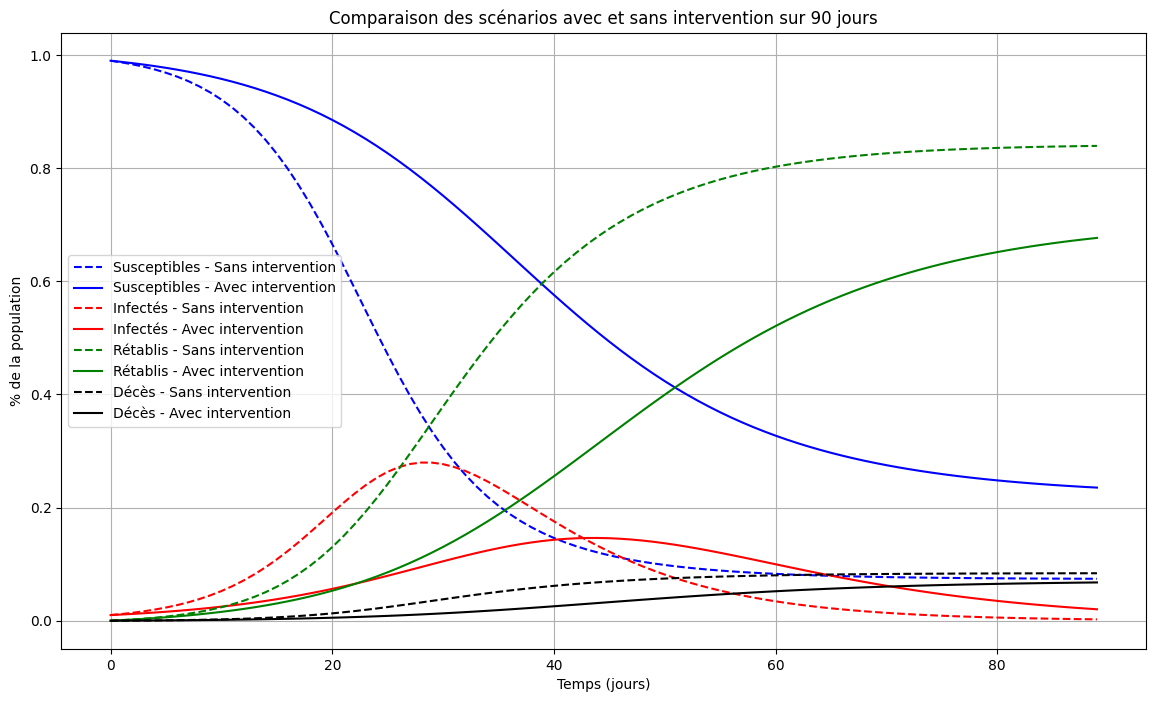

In [25]:
import matplotlib.pyplot as plt

# Valeurs initiales
best_params = (0.3, 0.1, 0.01)  # exemple de valeurs initiales pour β, γ et δ
S0 = 0.99  # 99% de la population initialement susceptible
I0 = 0.01  # 1% de la population initialement infectée
R0 = 0.0  # 0% de la population initialement rétablie
D0 = 0.0  # 0% de la population initialement décédée
dt = 1  # intervalle de temps en jours

# Simuler pour 90 jours
T = 90

# Calculer R0 avec les meilleurs paramètres
R0_base = best_params[0] / (best_params[1] + best_params[2])
print("Nombre de reproduction de base (R0) :", R0_base)

# Fonction de simulation SIRD
def simulate_sird(params, S0, I0, R0, D0, dt, T):
    beta, gamma, delta = params
    t = range(T)
    S = [S0]
    I = [I0]
    R = [R0]
    D = [D0]
    for _ in t[1:]:
        S_new = S[-1] - beta * S[-1] * I[-1] * dt
        I_new = I[-1] + (beta * S[-1] * I[-1] - gamma * I[-1] - delta * I[-1]) * dt
        R_new = R[-1] + gamma * I[-1] * dt
        D_new = D[-1] + delta * I[-1] * dt
        S.append(S_new)
        I.append(I_new)
        R.append(R_new)
        D.append(D_new)
    return t, S, I, R, D

# Simuler sans intervention
t_no_intervention, S_no_intervention, I_no_intervention, R_no_intervention, D_no_intervention = simulate_sird(best_params, S0, I0, R0, D0, dt, T)

# Introduire une intervention (réduction de 30% de β)
reduced_beta = best_params[0] * 0.7
reduced_params = (reduced_beta, best_params[1], best_params[2])

# Simuler avec intervention
t_intervention, S_intervention, I_intervention, R_intervention, D_intervention = simulate_sird(reduced_params, S0, I0, R0, D0, dt, T)

# Tracer les scénarios avec et sans intervention dans un seul graphique
plt.figure(figsize=(14, 8))

# Susceptibles
plt.plot(t_no_intervention, S_no_intervention, label='Susceptibles - Sans intervention', linestyle='--', color='blue')
plt.plot(t_intervention, S_intervention, label='Susceptibles - Avec intervention', linestyle='-', color='blue')

# Infectés
plt.plot(t_no_intervention, I_no_intervention, label='Infectés - Sans intervention', linestyle='--', color='red')
plt.plot(t_intervention, I_intervention, label='Infectés - Avec intervention', linestyle='-', color='red')

# Rétablis
plt.plot(t_no_intervention, R_no_intervention, label='Rétablis - Sans intervention', linestyle='--', color='green')
plt.plot(t_intervention, R_intervention, label='Rétablis - Avec intervention', linestyle='-', color='green')

# Décès
plt.plot(t_no_intervention, D_no_intervention, label='Décès - Sans intervention', linestyle='--', color='black')
plt.plot(t_intervention, D_intervention, label='Décès - Avec intervention', linestyle='-', color='black')

plt.xlabel('Temps (jours)')
plt.ylabel('% de la population')
plt.title('Comparaison des scénarios avec et sans intervention sur 90 jours')
plt.legend()
plt.grid(True)
plt.show()


3.